### Problem Statement

'''
 The bank provides financial services/products such as savings accounts, current accounts, debit cards, etc. to its customers. In order to increase its 
overall revenue, the bank conducts various marketing campaigns for its financial products such as credit cards, term deposits, loans, etc. These campaigns are intended for the bank’s existing customers. However, the marketing campaigns need to be cost-efficient so that the bank not only increases their overall revenues but also the total profit.The bank conducted a telemarketing campaign for one of its financial products ‘TermDeposits’ to help foster long-term relationships with existing customers. The dataset contains information about all the customers who were contacted during a particular year to open term deposit accounts.
'''

##### the goal is to analyse the patterns and provide inferences/solutions for the future marketing campaign

In [4]:
#IMPORTING THE NECESSARY LIBRARIES AND WARNINGS
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [5]:
# LOADING THE DATASET
df=pd.read_csv("application_data.csv")
df.head() #display first five rows

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   ...  FLAG_DOCUMENT_18 FLAG_DOCUMENT_19 FLAG_DOCUMENT_20 FLAG_DOCUMENT_21  \
0  ...                 0                0                0                0   
1  ...                 0                0                0                0   
2  ...                 0                0                0                0   
3  ...                 0                0                0                0   
4  ...                 0                0                0                0   

  AMT_REQ_CREDIT_BUREAU_HOUR AMT_REQ_CREDIT_BUREAU_DAY  \
0                        0.0                       0.0   
1                        0.0                       0.0   
2                        0.0                       0.0   
3                        NaN                       NaN   
4                        0.0                       0.0   

   AMT_REQ_CREDIT_BUREAU_WEEK  AMT_REQ_CREDIT_BUREAU_MON  \
0                         0.0                        0.0   
1                         0.0                        0.0   
2                         0.0                        0.0   
3                         NaN                        NaN   
4                         0.0                        0.0   

   AMT_REQ_CREDIT_BUREAU_QRT  AMT_REQ_CREDIT_BUREAU_YEAR  
0                        0.0                         1.0  
1                        0.0                         0.0  
2                        0.0                         0.0  
3                        NaN                         NaN  
4                        0.0                         0.0  

[5 rows x 122 columns]

In [6]:
pd.set_option("display.max_columns",None) #TO SEE ALL THE COLUMNS
df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_TYPE_SUITE NAME_INCOME_TYPE  \
0         351000.0   Unaccompanied          Working   
1        1129500.0          Family    State servant   
2         135000.0   Unaccompanied          Working   
3         297000.0   Unaccompanied          Working   
4         513000.0   Unaccompanied          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2  Secondary / secondary special  Single / not married  House / apartment   
3  Secondary / secondary special        Civil marriage  House / apartment   
4  Secondary / secondary special  Single / not married  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_BIRTH  DAYS_EMPLOYED  DAYS_REGISTRATION  \
0                    0.018801       -9461           -637            -3648.0   
1                    0.003541      -16765          -1188            -1186.0   
2                    0.010032      -19046           -225            -4260.0   
3                    0.008019      -19005          -3039            -9833.0   
4                    0.028663      -19932          -3038            -4311.0   

   DAYS_ID_PUBLISH  OWN_CAR_AGE  FLAG_MOBIL  FLAG_EMP_PHONE  FLAG_WORK_PHONE  \
0            -2120          NaN           1               1                0   
1             -291          NaN           1               1                0   
2            -2531         26.0           1               1                1   
3            -2437          NaN           1               1                0   
4            -3458          NaN           1               1                0   

   FLAG_CONT_MOBILE  FLAG_PHONE  FLAG_EMAIL OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0                 1           1           0        Laborers              1.0   
1                 1           1           0      Core staff              2.0   
2                 1           1           0        Laborers              1.0   
3                 1           0           0        Laborers              2.0   
4                 1           0           0      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

  WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                  WEDNESDAY                       10   
1                     MONDAY                       11   
2                     MONDAY                        9   
3                  WEDNESDAY                       17   
4                   THURSDAY                       11   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                        

In [7]:
#TO FIND OUT TH NUMBER OF ROWs AND COLUMNS IN THE DATASET ----DATA UNDERSTANDING
df.shape


(307511, 122)

In [8]:
# TO GET THE INFORMATION ABOUT THE DATASET INCLUDING DATATYPES AND MISSING VALUES
df.info(all)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 122 columns):
 #    Column                        Dtype  
---   ------                        -----  
 0    SK_ID_CURR                    int64  
 1    TARGET                        int64  
 2    NAME_CONTRACT_TYPE            object 
 3    CODE_GENDER                   object 
 4    FLAG_OWN_CAR                  object 
 5    FLAG_OWN_REALTY               object 
 6    CNT_CHILDREN                  int64  
 7    AMT_INCOME_TOTAL              float64
 8    AMT_CREDIT                    float64
 9    AMT_ANNUITY                   float64
 10   AMT_GOODS_PRICE               float64
 11   NAME_TYPE_SUITE               object 
 12   NAME_INCOME_TYPE              object 
 13   NAME_EDUCATION_TYPE           object 
 14   NAME_FAMILY_STATUS            object 
 15   NAME_HOUSING_TYPE             object 
 16   REGION_POPULATION_RELATIVE    float64
 17   DAYS_BIRTH                    int64  
 18   DA

##### there are multiple types of data types in the dataset

In [10]:
# TO GET STATISTICAL SUMMARY FOR NUMERICAL COLUMNS
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE     DAYS_BIRTH  DAYS_EMPLOYED  \
count               307511.000000  307511.000000  307511.000000   
mean                     0.020868  -16036.995067   63815.045904   
std                      0.013831    4363.988632  141275.766519   
min                      0.000290  -25229.000000  -17912.000000   
25%                      0.010006  -19682.000000   -2760.000000   
50%                      0.018850  -15750.000000   -1213.000000   
75%                      0.028663  -12413.000000    -289.000000   
max                      0.072508   -7489.000000  365243.000000   

       DAYS_REGISTRATION  DAYS_ID_PUBLISH    OWN_CAR_AGE     FLAG_MOBIL  \
count      307511.000000    307511.000000  104582.000000  307511.000000   
mean        -4986.120328     -2994.202373      12.061091       0.999997   
std          3522.886321      1509.450419      11.944812       0.001803   
min        -24672.000000     -7197.000000       0.000000       0.000000   
25%         -7479.500000     -4299.000000       5.000000       1.000000   
50%         -4504.000000     -3254.000000       9.000000       1.000000   
75%         -2010.000000     -1720.000000      15.000000       1.000000   
max             0.000000         0.000000      91.000000       1.000000   

       FLAG_EMP_PHONE  FLAG_WORK_PHONE  FLAG_CONT_MOBILE     FLAG_PHONE  \
count   307511.000000    307511.000000     307511.000000  307511.000000   
mean         0.819889         0.199368          0.998133       0.281066   
std          0.384280         0.399526          0.043164       0.449521   
min          0.000000         0.000000          0.000000       0.000000   
25%          1.000000         0.000000          1.000000       0.000000   
50%          1.000000         0.000000          1.000000       0.000000   
75%          1.000000         0.000000          1.000000       1.000000   
max          1.000000         1.000000          1.000000       1.000000   

          FLAG_EMAIL  CNT_FAM_MEMBERS  REGION_RATING_CLIENT  \
count  307511.000000    307509.000000         307511.000000   
mean        0.056720         2.152665              2.052463   
std         0.231307         0.910682              0.509034   
min         0.000000         1.000000              1.000000   
25%         0.000000         2.000000              2.000000   
50%         0.000000         2.000000              2.000000   
75%         0.000000         3.000000              2.000000   
max         1.000000        20.000000              3.000000   

       REGION_RATING_CLIENT_W_CITY  HOUR_APPR_PROCESS_START  \
count                307511.000000            307511.000000   
mean                      2.031521                12.063419   
std                       0.502737                 3.265832   
min                       1.000000                 0.000000   
25%                       

In [11]:
# for categorical columns
df.describe(include='object')

NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR FLAG_OWN_REALTY  \
count              307511      307511       307511          307511   
unique                  2           3            2               2   
top            Cash loans           F            N               Y   
freq               278232      202448       202924          213312   

       NAME_TYPE_SUITE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
count           306219           307511                         307511   
unique               7                8                              5   
top      Unaccompanied          Working  Secondary / secondary special   
freq            248526           158774                         218391   

       NAME_FAMILY_STATUS  NAME_HOUSING_TYPE OCCUPATION_TYPE  \
count              307511             307511          211120   
unique                  6                  6              18   
top               Married  House / apartment        Laborers   
freq               196432             272868           55186   

       WEEKDAY_APPR_PROCESS_START       ORGANIZATION_TYPE FONDKAPREMONT_MODE  \
count                      307511                  307511              97216   
unique                          7                      58                  4   
top                       TUESDAY  Business Entity Type 3   reg oper account   
freq                        53901                   67992              73830   

        HOUSETYPE_MODE WALLSMATERIAL_MODE EMERGENCYSTATE_MODE  
count           153214             151170              161756  
unique               3                  7                   2  
top     block of flats              Panel                  No  
freq            150503              66040              159428

In [12]:
#automation of segmentation
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY',
       ...
       'FLAG_DOCUMENT_18', 'FLAG_DOCUMENT_19', 'FLAG_DOCUMENT_20',
       'FLAG_DOCUMENT_21', 'AMT_REQ_CREDIT_BUREAU_HOUR',
       'AMT_REQ_CREDIT_BUREAU_DAY', 'AMT_REQ_CREDIT_BUREAU_WEEK',
       'AMT_REQ_CREDIT_BUREAU_MON', 'AMT_REQ_CREDIT_BUREAU_QRT',
       'AMT_REQ_CREDIT_BUREAU_YEAR'],
      dtype='object', length=122)

In [13]:
df1=round(df.isnull().sum()*100)/len(df)
df1

SK_ID_CURR                     0.000000
TARGET                         0.000000
NAME_CONTRACT_TYPE             0.000000
CODE_GENDER                    0.000000
FLAG_OWN_CAR                   0.000000
                                ...    
AMT_REQ_CREDIT_BUREAU_DAY     13.501631
AMT_REQ_CREDIT_BUREAU_WEEK    13.501631
AMT_REQ_CREDIT_BUREAU_MON     13.501631
AMT_REQ_CREDIT_BUREAU_QRT     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR    13.501631
Length: 122, dtype: float64

In [14]:
#USED SORT FUNCTION TO FIND OUT THE COLUMNS HAVING PERCENTAGE MORE THAN 40%
df1.sort_values(ascending = False)


COMMONAREA_MEDI             69.872297
COMMONAREA_AVG              69.872297
COMMONAREA_MODE             69.872297
NONLIVINGAPARTMENTS_MODE    69.432963
NONLIVINGAPARTMENTS_AVG     69.432963
                              ...    
NAME_HOUSING_TYPE            0.000000
NAME_FAMILY_STATUS           0.000000
NAME_EDUCATION_TYPE          0.000000
NAME_INCOME_TYPE             0.000000
SK_ID_CURR                   0.000000
Length: 122, dtype: float64

In [15]:
# CALCULATING HOW MANY COLUMNS HAVE MORE THAN 40% NULL VALUES AND CREATING A LIST
df2 = df1[df1.values >=40.00].index.tolist()
df2


['OWN_CAR_AGE',
 'EXT_SOURCE_1',
 'APARTMENTS_AVG',
 'BASEMENTAREA_AVG',
 'YEARS_BEGINEXPLUATATION_AVG',
 'YEARS_BUILD_AVG',
 'COMMONAREA_AVG',
 'ELEVATORS_AVG',
 'ENTRANCES_AVG',
 'FLOORSMAX_AVG',
 'FLOORSMIN_AVG',
 'LANDAREA_AVG',
 'LIVINGAPARTMENTS_AVG',
 'LIVINGAREA_AVG',
 'NONLIVINGAPARTMENTS_AVG',
 'NONLIVINGAREA_AVG',
 'APARTMENTS_MODE',
 'BASEMENTAREA_MODE',
 'YEARS_BEGINEXPLUATATION_MODE',
 'YEARS_BUILD_MODE',
 'COMMONAREA_MODE',
 'ELEVATORS_MODE',
 'ENTRANCES_MODE',
 'FLOORSMAX_MODE',
 'FLOORSMIN_MODE',
 'LANDAREA_MODE',
 'LIVINGAPARTMENTS_MODE',
 'LIVINGAREA_MODE',
 'NONLIVINGAPARTMENTS_MODE',
 'NONLIVINGAREA_MODE',
 'APARTMENTS_MEDI',
 'BASEMENTAREA_MEDI',
 'YEARS_BEGINEXPLUATATION_MEDI',
 'YEARS_BUILD_MEDI',
 'COMMONAREA_MEDI',
 'ELEVATORS_MEDI',
 'ENTRANCES_MEDI',
 'FLOORSMAX_MEDI',
 'FLOORSMIN_MEDI',
 'LANDAREA_MEDI',
 'LIVINGAPARTMENTS_MEDI',
 'LIVINGAREA_MEDI',
 'NONLIVINGAPARTMENTS_MEDI',
 'NONLIVINGAREA_MEDI',
 'FONDKAPREMONT_MODE',
 'HOUSETYPE_MODE',
 'TOTALAREA_MOD

In [16]:
len(df2) # there are totAL 49 COLUMNS THAT NEED TO BE REMOVED

49

In [17]:
# REMOVING COLUMNS HAVING MORE THAN 40% NULL VALUES
df.drop(df2, axis =1, inplace =True) # axis= 1 for columns and inplace = true means to modify the original dataset
df.shape
#initially I had 122 columns now I am only left with 73

(307511, 73)

In [18]:
#making sure that no columns contains null values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 73 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  int64  
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_TYPE_SUITE              306219 non-null  object 
 12  NAME_INCOME_TYPE             307511 non-null  object 
 13 

In [19]:
df_cat=df.select_dtypes('object').columns
df_cat
print('TOTAL SIZE OF CATEGORICAL COLUMNS', len(df.select_dtypes('object').columns))

TOTAL SIZE OF CATEGORICAL COLUMNS 12


In [20]:
df_num=df.select_dtypes('number').columns
df_num
print('TOTAL SIZE OF NUMERICAL COLUMNS', len(df.select_dtypes('number').columns))

TOTAL SIZE OF NUMERICAL COLUMNS 61


In [21]:
df.columns

Index(['SK_ID_CURR', 'TARGET', 'NAME_CONTRACT_TYPE', 'CODE_GENDER',
       'FLAG_OWN_CAR', 'FLAG_OWN_REALTY', 'CNT_CHILDREN', 'AMT_INCOME_TOTAL',
       'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE', 'NAME_TYPE_SUITE',
       'NAME_INCOME_TYPE', 'NAME_EDUCATION_TYPE', 'NAME_FAMILY_STATUS',
       'NAME_HOUSING_TYPE', 'REGION_POPULATION_RELATIVE', 'DAYS_BIRTH',
       'DAYS_EMPLOYED', 'DAYS_REGISTRATION', 'DAYS_ID_PUBLISH', 'FLAG_MOBIL',
       'FLAG_EMP_PHONE', 'FLAG_WORK_PHONE', 'FLAG_CONT_MOBILE', 'FLAG_PHONE',
       'FLAG_EMAIL', 'OCCUPATION_TYPE', 'CNT_FAM_MEMBERS',
       'REGION_RATING_CLIENT', 'REGION_RATING_CLIENT_W_CITY',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'REG_REGION_NOT_LIVE_REGION', 'REG_REGION_NOT_WORK_REGION',
       'LIVE_REGION_NOT_WORK_REGION', 'REG_CITY_NOT_LIVE_CITY',
       'REG_CITY_NOT_WORK_CITY', 'LIVE_CITY_NOT_WORK_CITY',
       'ORGANIZATION_TYPE', 'EXT_SOURCE_2', 'EXT_SOURCE_3',
       'OBS_30_CNT_SOCIAL_CIRCLE', 'DEF_30_C

In [22]:
# columns which are not required
columns_not_required= ['DAYS_REGISTRATION','FLAG_MOBIL','FLAG_EMP_PHONE','FLAG_WORK_PHONE','FLAG_CONT_MOBILE','FLAG_PHONE','FLAG_EMAIL','WEEKDAY_APPR_PROCESS_START','HOUR_APPR_PROCESS_START','LIVE_REGION_NOT_WORK_REGION','REG_CITY_NOT_LIVE_CITY','REG_CITY_NOT_WORK_CITY','LIVE_CITY_NOT_WORK_CITY','DAYS_LAST_PHONE_CHANGE', 'OBS_30_CNT_SOCIAL_CIRCLE','DEF_30_CNT_SOCIAL_CIRCLE','OBS_60_CNT_SOCIAL_CIRCLE','DEF_60_CNT_SOCIAL_CIRCLE','NAME_TYPE_SUITE']
columns_not_required

['DAYS_REGISTRATION',
 'FLAG_MOBIL',
 'FLAG_EMP_PHONE',
 'FLAG_WORK_PHONE',
 'FLAG_CONT_MOBILE',
 'FLAG_PHONE',
 'FLAG_EMAIL',
 'WEEKDAY_APPR_PROCESS_START',
 'HOUR_APPR_PROCESS_START',
 'LIVE_REGION_NOT_WORK_REGION',
 'REG_CITY_NOT_LIVE_CITY',
 'REG_CITY_NOT_WORK_CITY',
 'LIVE_CITY_NOT_WORK_CITY',
 'DAYS_LAST_PHONE_CHANGE',
 'OBS_30_CNT_SOCIAL_CIRCLE',
 'DEF_30_CNT_SOCIAL_CIRCLE',
 'OBS_60_CNT_SOCIAL_CIRCLE',
 'DEF_60_CNT_SOCIAL_CIRCLE',
 'NAME_TYPE_SUITE']

In [23]:
len(columns_not_required)

19

In [24]:
df=df.drop(columns_not_required, axis = 1)

In [25]:
df.shape

(307511, 54)

#### HANDLING REMAINING MISSING VALUES

In [27]:
# WORK ON THE REMAINING MISSING VALUES
df3=df.isnull().mean()*100
df3

SK_ID_CURR                      0.000000
TARGET                          0.000000
NAME_CONTRACT_TYPE              0.000000
CODE_GENDER                     0.000000
FLAG_OWN_CAR                    0.000000
FLAG_OWN_REALTY                 0.000000
CNT_CHILDREN                    0.000000
AMT_INCOME_TOTAL                0.000000
AMT_CREDIT                      0.000000
AMT_ANNUITY                     0.003902
AMT_GOODS_PRICE                 0.090403
NAME_INCOME_TYPE                0.000000
NAME_EDUCATION_TYPE             0.000000
NAME_FAMILY_STATUS              0.000000
NAME_HOUSING_TYPE               0.000000
REGION_POPULATION_RELATIVE      0.000000
DAYS_BIRTH                      0.000000
DAYS_EMPLOYED                   0.000000
DAYS_ID_PUBLISH                 0.000000
OCCUPATION_TYPE                31.345545
CNT_FAM_MEMBERS                 0.000650
REGION_RATING_CLIENT            0.000000
REGION_RATING_CLIENT_W_CITY     0.000000
REG_REGION_NOT_LIVE_REGION      0.000000
REG_REGION_NOT_W

In [28]:
df3.sort_values(ascending=False) # each column has missing value less than 40%

OCCUPATION_TYPE                31.345545
EXT_SOURCE_3                   19.825307
AMT_REQ_CREDIT_BUREAU_QRT      13.501631
AMT_REQ_CREDIT_BUREAU_MON      13.501631
AMT_REQ_CREDIT_BUREAU_WEEK     13.501631
AMT_REQ_CREDIT_BUREAU_DAY      13.501631
AMT_REQ_CREDIT_BUREAU_HOUR     13.501631
AMT_REQ_CREDIT_BUREAU_YEAR     13.501631
EXT_SOURCE_2                    0.214626
AMT_GOODS_PRICE                 0.090403
AMT_ANNUITY                     0.003902
CNT_FAM_MEMBERS                 0.000650
FLAG_DOCUMENT_17                0.000000
FLAG_DOCUMENT_9                 0.000000
FLAG_DOCUMENT_10                0.000000
FLAG_DOCUMENT_11                0.000000
FLAG_DOCUMENT_12                0.000000
FLAG_DOCUMENT_13                0.000000
FLAG_DOCUMENT_14                0.000000
FLAG_DOCUMENT_15                0.000000
FLAG_DOCUMENT_16                0.000000
AMT_CREDIT                      0.000000
FLAG_DOCUMENT_7                 0.000000
FLAG_DOCUMENT_18                0.000000
FLAG_DOCUMENT_19

In [29]:
####filling missing values
df.EXT_SOURCE_3.describe()  #dtype= float64


count    246546.000000
mean          0.510853
std           0.194844
min           0.000527
25%           0.370650
50%           0.535276
75%           0.669057
max           0.896010
Name: EXT_SOURCE_3, dtype: float64

In [30]:
df.EXT_SOURCE_3.isnull().mode()

0    False
Name: EXT_SOURCE_3, dtype: bool

In [31]:
# replacing the missing values for this column
EXT_SOURCE_3_mean= df.EXT_SOURCE_3.mean()
EXT_SOURCE_3_mean

0.5108529061799658

In [32]:
df.EXT_SOURCE_3= df.EXT_SOURCE_3.fillna(EXT_SOURCE_3_mean)
df.EXT_SOURCE_3.isnull().sum()

0

In [33]:
df.EXT_SOURCE_3.isnull().sum()

0

In [34]:
df.AMT_REQ_CREDIT_BUREAU_QRT.describe() #dtype=float64


count    265992.000000
mean          0.265474
std           0.794056
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max         261.000000
Name: AMT_REQ_CREDIT_BUREAU_QRT, dtype: float64

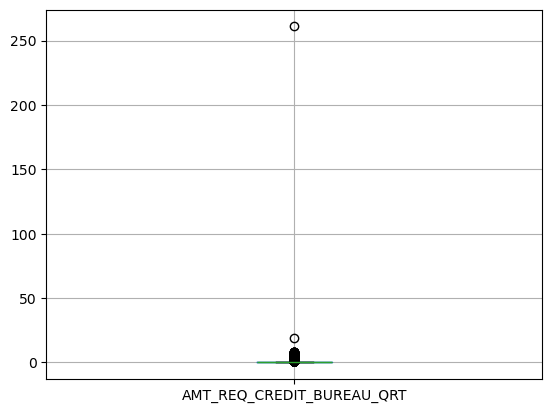

In [35]:
#doing the same for AMT_REQ_CREDIT_BUREAU_QRT
df.boxplot(column=['AMT_REQ_CREDIT_BUREAU_QRT'])
plt.show()

In [36]:
AMT_REQ_CREDIT_BUREAU_QRT_mean=df.AMT_REQ_CREDIT_BUREAU_QRT.mean()
AMT_REQ_CREDIT_BUREAU_QRT_mean

0.26547414959848414

In [37]:
AMT_REQ_CREDIT_BUREAU_QRT= df.AMT_REQ_CREDIT_BUREAU_QRT.fillna(AMT_REQ_CREDIT_BUREAU_QRT_mean)


In [38]:
AMT_REQ_CREDIT_BUREAU_QRT.isnull().sum()

0

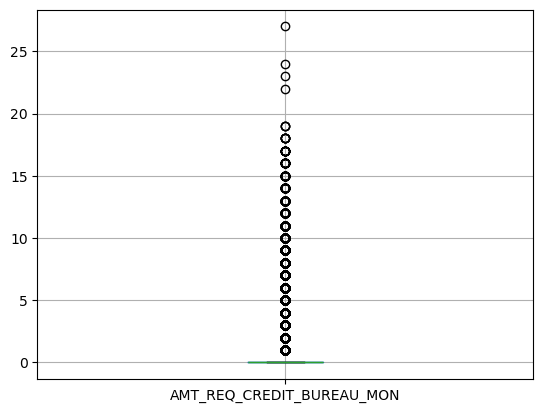

In [39]:
#similarly it can be done for other columns
df.boxplot(column=['AMT_REQ_CREDIT_BUREAU_MON'])
plt.show()

In [40]:
df.AMT_REQ_CREDIT_BUREAU_MON.describe()

count    265992.000000
mean          0.267395
std           0.916002
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max          27.000000
Name: AMT_REQ_CREDIT_BUREAU_MON, dtype: float64

In [41]:
AMT_REQ_CREDIT_BUREAU_MON_median= df.AMT_REQ_CREDIT_BUREAU_MON.median()
AMT_REQ_CREDIT_BUREAU_MON_median

0.0

In [42]:
AMT_REQ_CREDIT_BUREAU_MON=df.AMT_REQ_CREDIT_BUREAU_MON.fillna(AMT_REQ_CREDIT_BUREAU_MON_median)

#SIMILARLY FOR COLUMNS HAVING SAME %AGE OF MISSING VALUES

In [43]:
AMT_REQ_CREDIT_BUREAU_MON.isnull().sum()

0

In [44]:
#df.OCCUPATION_TYPE.describe() #dtype=object
df.OCCUPATION_TYPE.value_counts()

OCCUPATION_TYPE
Laborers                 55186
Sales staff              32102
Core staff               27570
Managers                 21371
Drivers                  18603
High skill tech staff    11380
Accountants               9813
Medicine staff            8537
Security staff            6721
Cooking staff             5946
Cleaning staff            4653
Private service staff     2652
Low-skill Laborers        2093
Waiters/barmen staff      1348
Secretaries               1305
Realty agents              751
HR staff                   563
IT staff                   526
Name: count, dtype: int64

In [45]:
y=df.OCCUPATION_TYPE.mode()[0]
y

'Laborers'

In [46]:
df.OCCUPATION_TYPE=df.OCCUPATION_TYPE.fillna(y)
df.OCCUPATION_TYPE

0            Laborers
1          Core staff
2            Laborers
3            Laborers
4          Core staff
             ...     
307506    Sales staff
307507       Laborers
307508       Managers
307509       Laborers
307510       Laborers
Name: OCCUPATION_TYPE, Length: 307511, dtype: object

In [47]:
df.OCCUPATION_TYPE.fillna(y,inplace=True)


In [48]:
df.OCCUPATION_TYPE.isnull().sum()

0

In [49]:
df.AMT_REQ_CREDIT_BUREAU_HOUR.describe()

count    265992.000000
mean          0.006402
std           0.083849
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           4.000000
Name: AMT_REQ_CREDIT_BUREAU_HOUR, dtype: float64

In [50]:
AMT_REQ_CREDIT_BUREAU_HOUR_median= df.AMT_REQ_CREDIT_BUREAU_HOUR.median()
AMT_REQ_CREDIT_BUREAU_HOUR_median

0.0

In [51]:
AMT_REQ_CREDIT_BUREAU_HOUR=df.AMT_REQ_CREDIT_BUREAU_HOUR.fillna(AMT_REQ_CREDIT_BUREAU_HOUR_median)
AMT_REQ_CREDIT_BUREAU_HOUR.isnull().sum()

0

In [52]:
df.AMT_REQ_CREDIT_BUREAU_DAY.describe()

count    265992.000000
mean          0.007000
std           0.110757
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           9.000000
Name: AMT_REQ_CREDIT_BUREAU_DAY, dtype: float64

In [53]:
AMT_REQ_CREDIT_BUREAU_DAY_median= df.AMT_REQ_CREDIT_BUREAU_DAY.median()
AMT_REQ_CREDIT_BUREAU_DAY_median

0.0

In [54]:
AMT_REQ_CREDIT_BUREAU_DAY=df.AMT_REQ_CREDIT_BUREAU_DAY.fillna(AMT_REQ_CREDIT_BUREAU_DAY_median)
AMT_REQ_CREDIT_BUREAU_DAY.isnull().sum()

0

In [55]:
df.AMT_REQ_CREDIT_BUREAU_WEEK.describe()

count    265992.000000
mean          0.034362
std           0.204685
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           8.000000
Name: AMT_REQ_CREDIT_BUREAU_WEEK, dtype: float64

In [56]:
AMT_REQ_CREDIT_BUREAU_WEEK_median= df.AMT_REQ_CREDIT_BUREAU_WEEK.median()
AMT_REQ_CREDIT_BUREAU_WEEK_median

0.0

In [57]:
AMT_REQ_CREDIT_BUREAU_WEEK=df.AMT_REQ_CREDIT_BUREAU_WEEK.fillna(AMT_REQ_CREDIT_BUREAU_DAY_median)
AMT_REQ_CREDIT_BUREAU_WEEK.isnull().sum()

0

In [58]:
df.AMT_REQ_CREDIT_BUREAU_YEAR.describe()

count    265992.000000
mean          1.899974
std           1.869295
min           0.000000
25%           0.000000
50%           1.000000
75%           3.000000
max          25.000000
Name: AMT_REQ_CREDIT_BUREAU_YEAR, dtype: float64

In [59]:
AMT_REQ_CREDIT_BUREAU_YEAR_median= df.AMT_REQ_CREDIT_BUREAU_YEAR.median()
AMT_REQ_CREDIT_BUREAU_YEAR_median

1.0

In [60]:
AMT_REQ_CREDIT_BUREAU_YEAR=df.AMT_REQ_CREDIT_BUREAU_YEAR.fillna(AMT_REQ_CREDIT_BUREAU_YEAR_median)
AMT_REQ_CREDIT_BUREAU_YEAR.isnull().sum()

0

#### HANDLING ERRORS IN COLUMNs.

In [62]:

days_column= df[["DAYS_BIRTH","DAYS_EMPLOYED","DAYS_ID_PUBLISH"]]
days_column

DAYS_BIRTH  DAYS_EMPLOYED  DAYS_ID_PUBLISH
0            -9461           -637            -2120
1           -16765          -1188             -291
2           -19046           -225            -2531
3           -19005          -3039            -2437
4           -19932          -3038            -3458
...            ...            ...              ...
307506       -9327           -236            -1982
307507      -20775         365243            -4090
307508      -14966          -7921            -5150
307509      -11961          -4786             -931
307510      -16856          -1262             -410

[307511 rows x 3 columns]

### HERE DAYS_BIRTH AND DAYS_EMPLOYED ARE IN NEGATIVE WHICH CANNOT BE SO

In [64]:
df.DAYS_BIRTH=df.DAYS_BIRTH.abs()
df.DAYS_BIRTH

0          9461
1         16765
2         19046
3         19005
4         19932
          ...  
307506     9327
307507    20775
307508    14966
307509    11961
307510    16856
Name: DAYS_BIRTH, Length: 307511, dtype: int64

In [65]:
df.DAYS_EMPLOYED= df.DAYS_EMPLOYED.abs()
df.DAYS_EMPLOYED

0            637
1           1188
2            225
3           3039
4           3038
           ...  
307506       236
307507    365243
307508      7921
307509      4786
307510      1262
Name: DAYS_EMPLOYED, Length: 307511, dtype: int64

In [66]:
df.DAYS_ID_PUBLISH=df.DAYS_ID_PUBLISH.abs()
df.DAYS_ID_PUBLISH

0         2120
1          291
2         2531
3         2437
4         3458
          ... 
307506    1982
307507    4090
307508    5150
307509     931
307510     410
Name: DAYS_ID_PUBLISH, Length: 307511, dtype: int64

In [67]:
df['Age']=round(df.DAYS_BIRTH/365).astype('int')
df.Age

0         26
1         46
2         52
3         52
4         55
          ..
307506    26
307507    57
307508    41
307509    33
307510    46
Name: Age, Length: 307511, dtype: int32

In [68]:
df.drop(['DAYS_BIRTH'], axis= 1, inplace= True) #removing DAYS_BIRTH
df.head()
#A NEW COLUMN AGE IS ADDED AT THE END

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0      100002       1         Cash loans           M            N   
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0               Y             0          202500.0    406597.5      24700.5   
1               N             0          270000.0   1293502.5      35698.5   
2               Y             0           67500.0    135000.0       6750.0   
3               Y             0          135000.0    312682.5      29686.5   
4               Y             0          121500.0    513000.0      21865.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0         351000.0          Working  Secondary / secondary special   
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0  Single / not married  House / apartment                    0.018801   
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0            637             2120        Laborers              1.0   
1           1188              291      Core staff              2.0   
2            225             2531        Laborers              1.0   
3           3039             2437        Laborers              2.0   
4           3038             3458      Core staff              1.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                     2                            2   
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0  Business Entity Type 3      0.262949      0.139376                0   
1                  School      0.622246      0.510853                0   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                0   
4                Religion      0.322738      0.510853                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   
1                0                0                0                 0   
2                0    

In [69]:
df.describe()

SK_ID_CURR         TARGET   CNT_CHILDREN  AMT_INCOME_TOTAL  \
count  307511.000000  307511.000000  307511.000000      3.075110e+05   
mean   278180.518577       0.080729       0.417052      1.687979e+05   
std    102790.175348       0.272419       0.722121      2.371231e+05   
min    100002.000000       0.000000       0.000000      2.565000e+04   
25%    189145.500000       0.000000       0.000000      1.125000e+05   
50%    278202.000000       0.000000       0.000000      1.471500e+05   
75%    367142.500000       0.000000       1.000000      2.025000e+05   
max    456255.000000       1.000000      19.000000      1.170000e+08   

         AMT_CREDIT    AMT_ANNUITY  AMT_GOODS_PRICE  \
count  3.075110e+05  307499.000000     3.072330e+05   
mean   5.990260e+05   27108.573909     5.383962e+05   
std    4.024908e+05   14493.737315     3.694465e+05   
min    4.500000e+04    1615.500000     4.050000e+04   
25%    2.700000e+05   16524.000000     2.385000e+05   
50%    5.135310e+05   24903.000000     4.500000e+05   
75%    8.086500e+05   34596.000000     6.795000e+05   
max    4.050000e+06  258025.500000     4.050000e+06   

       REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_ID_PUBLISH  \
count               307511.000000  307511.000000    307511.000000   
mean                     0.020868   67724.742149      2994.202373   
std                      0.013831  139443.751806      1509.450419   
min                      0.000290       0.000000         0.000000   
25%                      0.010006     933.000000      1720.000000   
50%                      0.018850    2219.000000      3254.000000   
75%                      0.028663    5707.000000      4299.000000   
max                      0.072508  365243.000000      7197.000000   

       CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
count    307509.000000         307511.000000                307511.000000   
mean          2.152665              2.052463                     2.031521   
std           0.910682              0.509034                     0.502737   
min           1.000000              1.000000                     1.000000   
25%           2.000000              2.000000                     2.000000   
50%           2.000000              2.000000                     2.000000   
75%           3.000000              2.000000                     2.000000   
max          20.000000              3.000000                     3.000000   

       REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  EXT_SOURCE_2  \
count               307511.000000               307511.000000  3.068510e+05   
mean                     0.015144                    0.050769  5.143927e-01   
std                      0.122126                    0.219526  1.910602e-01   
min                      0.000000                    0.000000  8.173617e-08   
25%                      0.000000                    0.000000  3.924574e-01   
50%                      0.000000                    0.000000  5.659614e-01   
75%                      0.000000                    0.000000  6.636171e-01   
max                      1.000000                    1.000000  8.549997e-01   

        EXT_SOURCE_3  FLAG_DOCUMENT_2  FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  \
count  307511.000000    307511.000000    307511.000000    307511.000000   
mean        0.510853         0.000042         0.710023         0.000081   
std         0.174464         0.006502         0.453752         0.009016   
min         0.000527         0.000000         0.000000         0.000000   
25%         0.417100         0.000000         0.000000         0.000000   
50%         0.510853         0.000000         1.000000         0.000000   
75%         0.636376         0.000000         1.000000         0.000000   
max         0.896010         1.000000         1.000000         1.000000   

       FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  \
count    307511.000000    307511.000000    307511.000000    307511.000000   
mean   

#### columns which look suspicious.

* MOst poeple have minimum zero children; howver, 19 could be an outlier
*  AMT_REQ_CREDIT_BUREAU_HOUR: most people have no credit inquiries in an hour, but 4 inquiries in a single hour is unusually high and could be an outlier
* AMT_REQ_CREDIT_BUREAU_DAY: most people have no credit inquiries in a day, but 9 inquiries in one day is unusually high and could be an outlier
* AMT_REQ_CREDIT_BUREAU_WEEK on average, there are no credit inquiries in a week for most people. However, having a maximum of 8 inquiries in one week could be an outlier
* AMT_REQ_CREDIT_BUREAU_MON -- Most people have 0 inquiries, but 27 inquiries in a month is unusually high and could be an outlier.
* AMT_REQ_CREDIT_BUREAU_QRT---Again, 271 credit checks in a quarter is very high and likely an outlier.
* AMT_REQ_CREDIT_BUREAU_YEAR: 25 inquiries in a year might be high, but it’s not as extreme as the others. It could still be an outlier depending on the typical range.

# Handling Outliers

In [73]:
df.CNT_CHILDREN.describe() #19 can be an outlier here

count    307511.000000
mean          0.417052
std           0.722121
min           0.000000
25%           0.000000
50%           0.000000
75%           1.000000
max          19.000000
Name: CNT_CHILDREN, dtype: float64

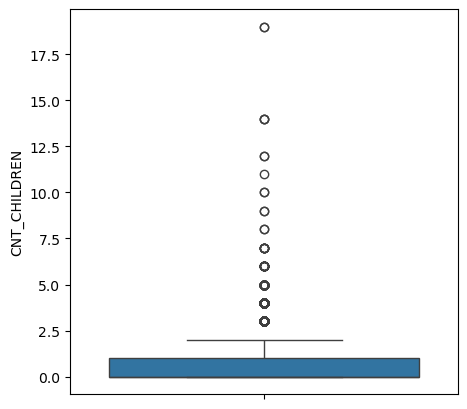

In [74]:
plt.figure(figsize=(5,5))
sns.boxplot(df.CNT_CHILDREN)
plt.show()

In [75]:
Q1=df["CNT_CHILDREN"].describe()["25%"]
Q3=df["CNT_CHILDREN"].describe()["75%"]
IQR= Q3-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['CNT_CHILDREN'] >= UPPER_BOUND)]
UPPER_BOUND= Q3+1.5*IQR
df["CNT_CHILDREN"]=np.where(df["CNT_CHILDREN"]>UPPER_BOUND,UPPER_BOUND,df["CNT_CHILDREN"])

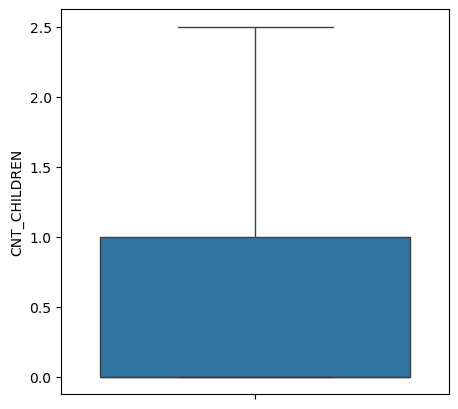

In [76]:
plt.figure(figsize=(5,5))
sns.boxplot(df.CNT_CHILDREN)
plt.show()

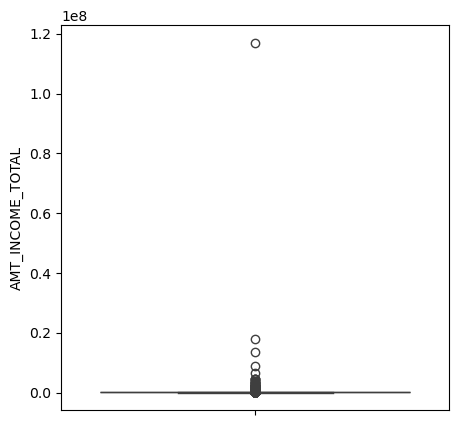

In [77]:
plt.figure(figsize=(5,5))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

In [78]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_INCOME_TOTAL"].describe()["25%"]
Q3=df["AMT_INCOME_TOTAL"].describe()["75%"]
IQR= Q3-Q1
LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q3+1.5*IQR
df_no_outliers = df[(df['AMT_INCOME_TOTAL'] >= UPPER_BOUND)]
UPPER_BOUND= Q3+1.5*IQR
df["AMT_INCOME_TOTAL"]=np.where(df["AMT_INCOME_TOTAL"]>UPPER_BOUND,UPPER_BOUND,df["AMT_INCOME_TOTAL"])

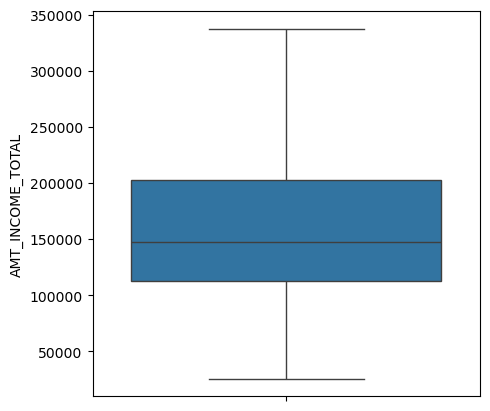

In [79]:
plt.figure(figsize=(5,5))
sns.boxplot(df.AMT_INCOME_TOTAL)
plt.show()

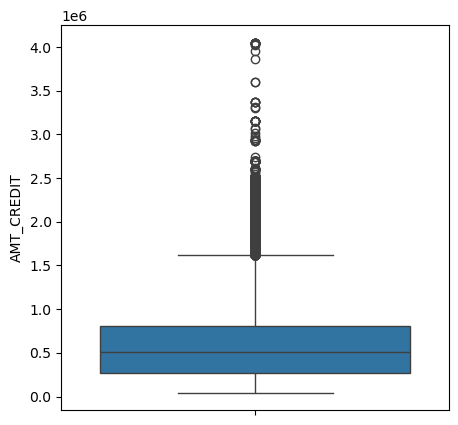

In [80]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_CREDIT)
plt.show()

In [81]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_CREDIT"].describe()["25%"]
Q2=df["AMT_CREDIT"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_CREDIT"]=np.where(df["AMT_CREDIT"]>UPPER_BOUND,UPPER_BOUND,df["AMT_CREDIT"])
#df["AMT_CREDIT"]=np.where(df["AMT_CREDIT"]>LOWER_BOUND,LOWER_BOUND,df["AMT_CREDIT"])

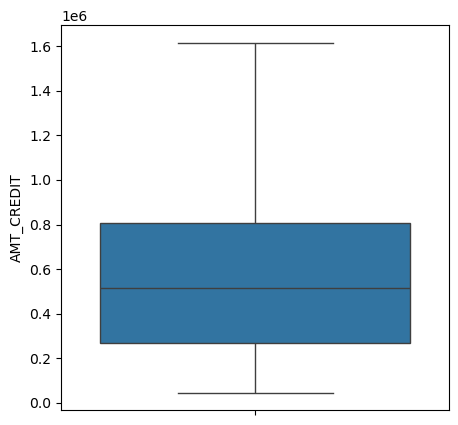

In [82]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_CREDIT)
plt.show()

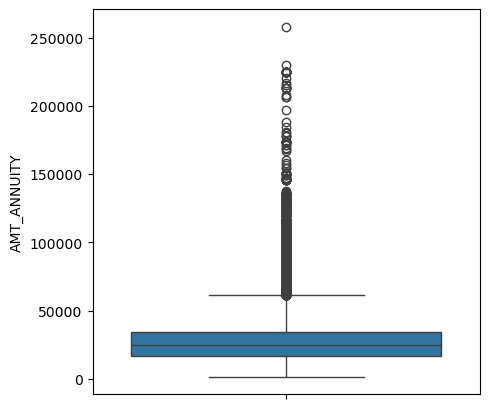

In [83]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_ANNUITY)
plt.show()

In [84]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_ANNUITY"].describe()["25%"]
Q2=df["AMT_ANNUITY"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_ANNUITY"]=np.where(df["AMT_ANNUITY"]>UPPER_BOUND,UPPER_BOUND,df["AMT_ANNUITY"])


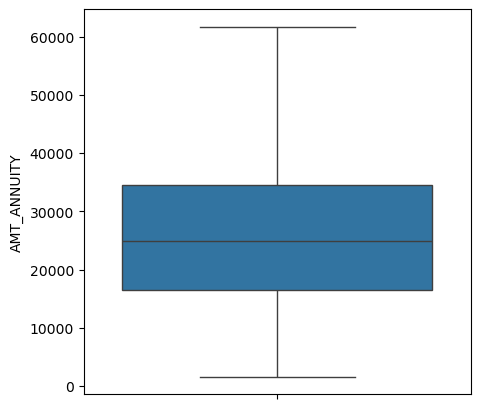

In [85]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_ANNUITY)
plt.show()

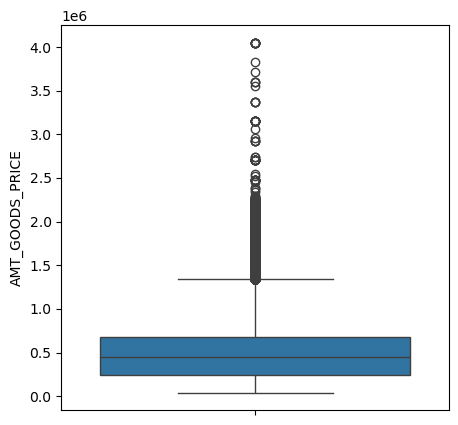

In [86]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

In [87]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_GOODS_PRICE"].describe()["25%"]
Q2=df["AMT_GOODS_PRICE"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_GOODS_PRICE"]=np.where(df["AMT_GOODS_PRICE"]>UPPER_BOUND,UPPER_BOUND,df["AMT_GOODS_PRICE"])
#df["AMT_GOODS_PRICET"]=np.where(df["AMT_GOODS_PRICE"]>LOWER_BOUND,LOWER_BOUND,df["AMT_CREDIT"])

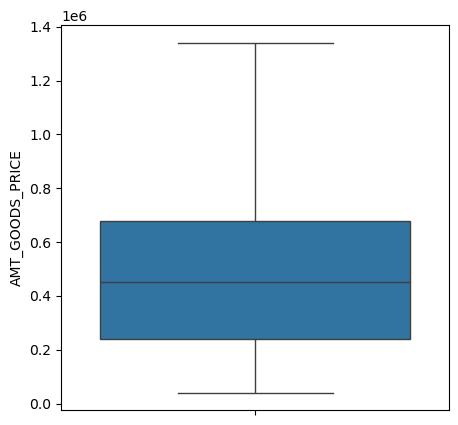

In [88]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_GOODS_PRICE)
plt.show()

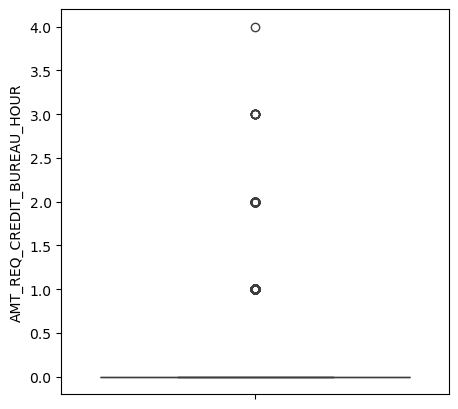

In [89]:
plt.figure(figsize=[5,5])
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_HOUR)
plt.show()

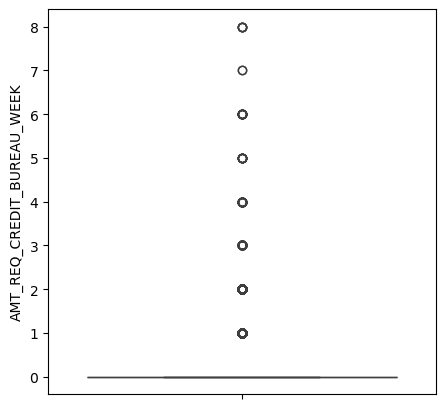

In [90]:
plt.figure(figsize=[5,5])

sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_WEEK)
plt.show()

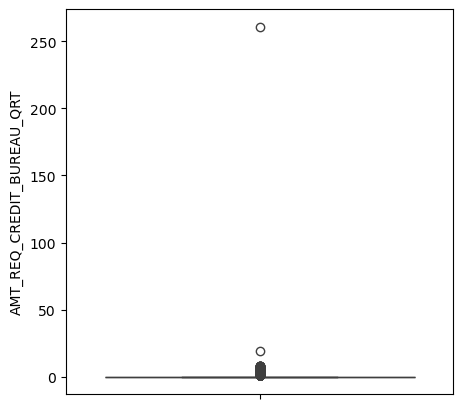

In [91]:
plt.figure(figsize=[5,5])

sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

In [92]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_REQ_CREDIT_BUREAU_QRT"].describe()["25%"]
Q2=df["AMT_REQ_CREDIT_BUREAU_QRT"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_REQ_CREDIT_BUREAU_QRT"]=np.where(df["AMT_REQ_CREDIT_BUREAU_QRT"]>UPPER_BOUND,UPPER_BOUND,df["AMT_REQ_CREDIT_BUREAU_QRT"])


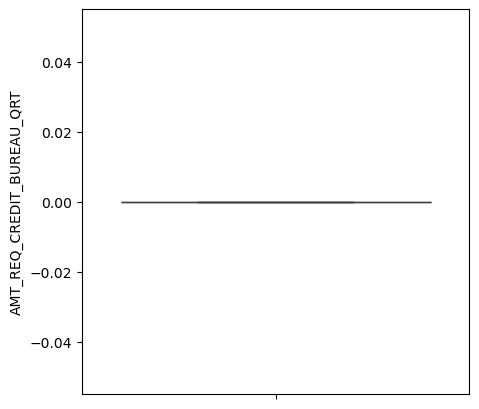

In [93]:
plt.figure(figsize=[5,5])

sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_QRT)
plt.show()

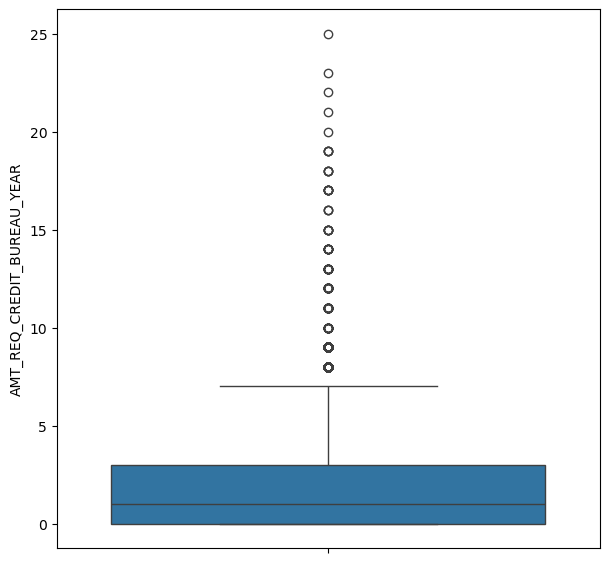

In [94]:
plt.figure(figsize=[7,7])
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

In [95]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()["25%"]
Q2=df["AMT_REQ_CREDIT_BUREAU_YEAR"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_REQ_CREDIT_BUREAU_YEAR"]=np.where(df["AMT_REQ_CREDIT_BUREAU_YEAR"]>UPPER_BOUND,UPPER_BOUND,df["AMT_REQ_CREDIT_BUREAU_YEAR"])


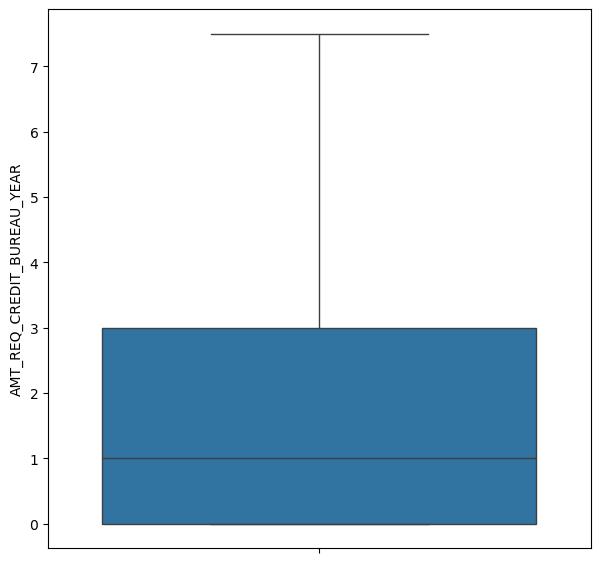

In [96]:
plt.figure(figsize=[7,7])
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_YEAR)
plt.show()

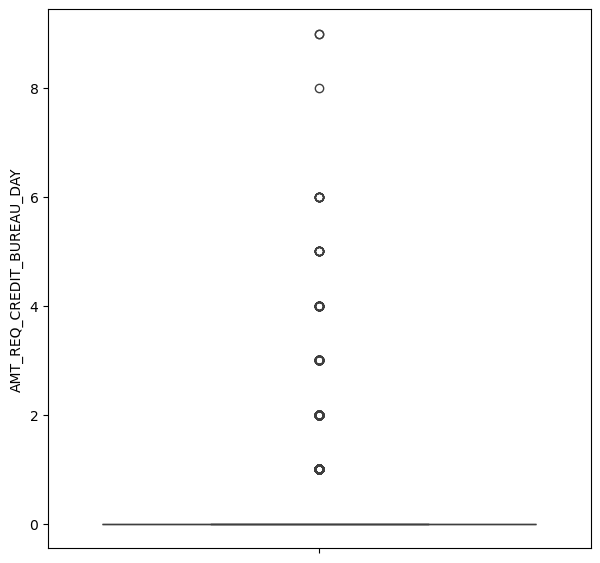

In [97]:
plt.figure(figsize=[7,7])
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

In [98]:
#STATISTICAL METHOD TO REMOVE OUTLIER
Q1=df["AMT_REQ_CREDIT_BUREAU_DAY"].describe()["25%"]
Q2=df["AMT_REQ_CREDIT_BUREAU_DAY"].describe()["75%"]
IQR= Q2-Q1
#LOWER_BOUND=Q1-1.5*IQR
UPPER_BOUND= Q2+1.5*IQR
df["AMT_REQ_CREDIT_BUREAU_DAY"]=np.where(df["AMT_REQ_CREDIT_BUREAU_DAY"]>UPPER_BOUND,UPPER_BOUND,df["AMT_REQ_CREDIT_BUREAU_DAY"])
#df["AMT_GOODS_PRICET"]=np.where(df["AMT_GOODS_PRICE"]>LOWER_BOUND,LOWER_BOUND,df["AMT_CREDIT"])

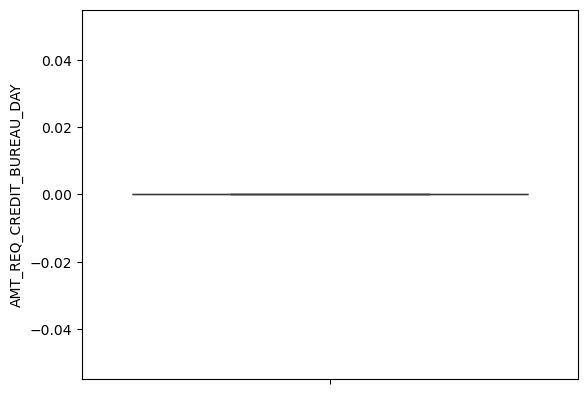

In [99]:
sns.boxplot(df.AMT_REQ_CREDIT_BUREAU_DAY)
plt.show()

In [100]:
#calculate the number of males and females
df.CODE_GENDER.value_counts()

CODE_GENDER
F      202448
M      105059
XNA         4
Name: count, dtype: int64

In [101]:
df.CODE_GENDER= df.CODE_GENDER.replace("XNA","F")
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

#### Data imbalance--finding the ratio of non defaulters and defaulters
'''
Data imbalance occurs when one class or category in a dataset is much more frequent than others. 
'''

In [103]:
#PLOTING more than one type of plot to analyse the different aspects due to data imbalance. 
#Doing this analysis for the ‘Target variable’ in the dataset (clients with payment difficulties and all other cases). 


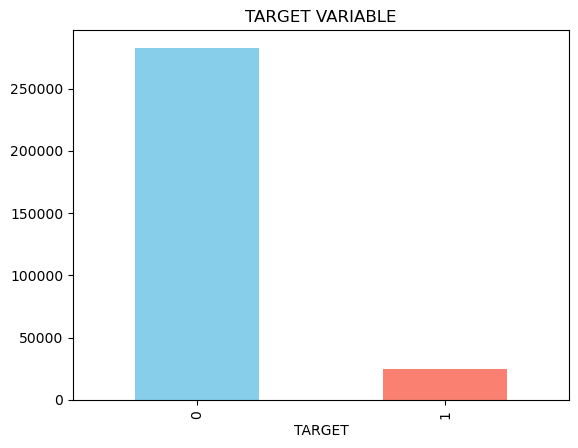

In [104]:
df.TARGET.value_counts().plot(kind = 'bar',color=['skyblue', 'salmon']) 
#without value_counts there would be no numeric data to plot
plt.title('TARGET VARIABLE')
plt.show()

In [105]:
df.TARGET.value_counts(normalize=True)*100


TARGET
0    91.927118
1     8.072882
Name: proportion, dtype: float64

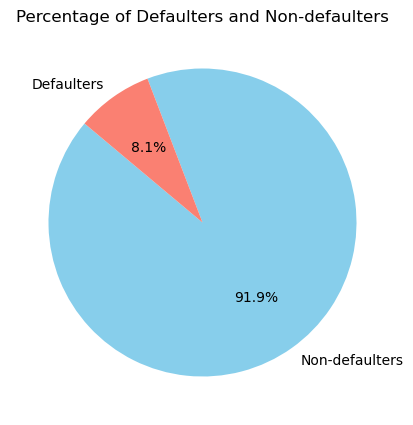

In [106]:
percentages = [91.927118, 8.072882]
labels = ['Non-defaulters', 'Defaulters'] #1 mean defaulters and 0 mean non defaulters
plt.figure(figsize=(5,5))  
plt.pie(percentages, labels=labels, autopct='%1.1f%%', startangle=140, colors=['skyblue', 'salmon'])
plt.title('Percentage of Defaulters and Non-defaulters')
plt.show()


In [107]:
# there are 91%  non defaulter and 8% are defaulters

# finding the data imbalance for male and female 

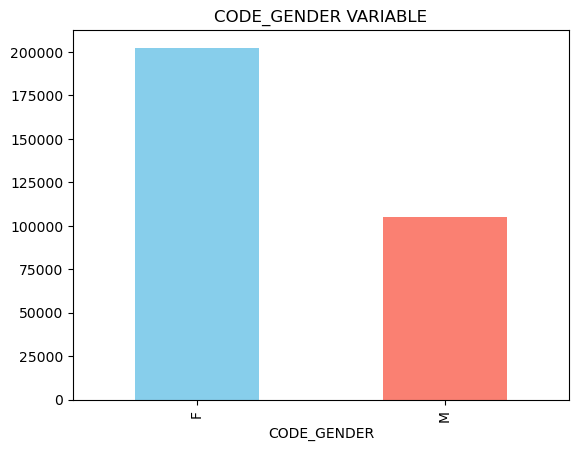

CODE_GENDER
F    65.835694
M    34.164306
Name: proportion, dtype: float64

In [109]:
df.CODE_GENDER.value_counts().plot(kind = 'bar', color=['skyblue', 'salmon'])
plt.title('CODE_GENDER VARIABLE')
plt.show()
df.CODE_GENDER.value_counts(normalize = True)*100

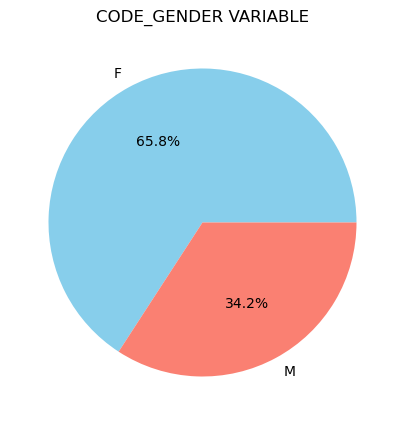

In [110]:
#plotting pie chart
gender_counts = df.CODE_GENDER.value_counts(normalize=True) * 100
plt.figure(figsize=(7,5))
gender_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('CODE_GENDER VARIABLE')
plt.ylabel('')  # to remove the ylabel
plt.show()

### data imbalance for contract type i.e cash loans and revoloving loans 

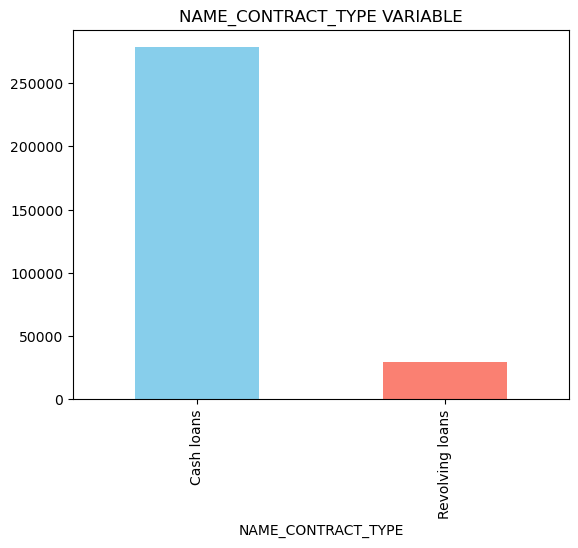

NAME_CONTRACT_TYPE
Cash loans         90.478715
Revolving loans     9.521285
Name: proportion, dtype: float64

In [112]:
df.NAME_CONTRACT_TYPE.value_counts().plot(kind = 'bar',color=['skyblue', 'salmon'])
plt.title('NAME_CONTRACT_TYPE VARIABLE')
plt.show()
df.NAME_CONTRACT_TYPE.value_counts(normalize = True)*100

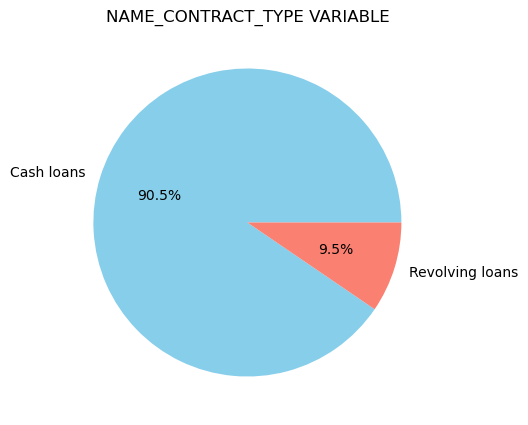

In [113]:
contract_type_counts = df.NAME_CONTRACT_TYPE.value_counts(normalize=True) * 100
# Plotting the pie chart
plt.figure(figsize=(5,5))
contract_type_counts.plot(kind='pie', autopct='%1.1f%%', colors=['skyblue', 'salmon'])
plt.title('NAME_CONTRACT_TYPE VARIABLE')
plt.ylabel('')  # to remove the ylabel
plt.show()

clearly there are more cash loans than revolving loans

In [115]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

### univariate analysis for categorical columns

##### CODE_GENDER

In [118]:
df.CODE_GENDER

0         M
1         F
2         M
3         F
4         M
         ..
307506    M
307507    F
307508    F
307509    F
307510    F
Name: CODE_GENDER, Length: 307511, dtype: object

In [119]:
df.CODE_GENDER.describe()

count     307511
unique         2
top            F
freq      202452
Name: CODE_GENDER, dtype: object

In [120]:
df.CODE_GENDER.value_counts()

CODE_GENDER
F    202452
M    105059
Name: count, dtype: int64

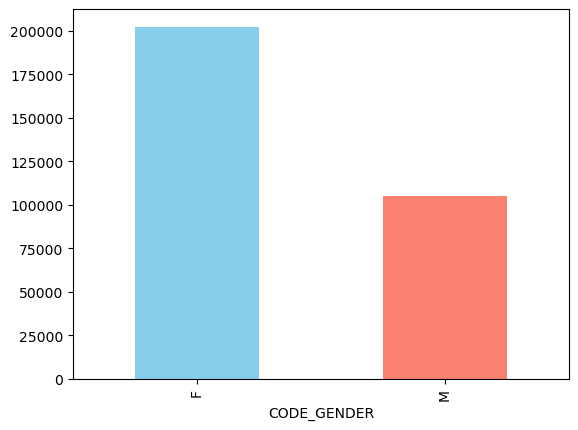

In [121]:
df.CODE_GENDER.value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.show()

In [122]:
target_value_1 = df[(df.TARGET == 1)]
target_value_1.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0       100002       1         Cash loans           M            N   
26      100031       1         Cash loans           F            N   
40      100047       1         Cash loans           M            N   
42      100049       1         Cash loans           F            N   
81      100096       1         Cash loans           F            N   

   FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
0                Y           0.0          202500.0    406597.5      24700.5   
26               Y           0.0          112500.0    979992.0      27076.5   
40               Y           0.0          202500.0   1193580.0      35028.0   
42               N           0.0          135000.0    288873.0      16258.5   
81               Y           0.0           81000.0    252000.0      14593.5   

    AMT_GOODS_PRICE      NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
0          351000.0               Working  Secondary / secondary special   
26         702000.0               Working  Secondary / secondary special   
40         855000.0  Commercial associate  Secondary / secondary special   
42         238500.0               Working  Secondary / secondary special   
81         252000.0             Pensioner  Secondary / secondary special   

      NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
0   Single / not married  House / apartment                    0.018801   
26                 Widow  House / apartment                    0.018029   
40               Married  House / apartment                    0.025164   
42        Civil marriage  House / apartment                    0.007305   
81               Married  House / apartment                    0.028663   

    DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
0             637             2120        Laborers              1.0   
26           2628             1827   Cooking staff              1.0   
40           1262             1029        Laborers              2.0   
42           3597             4409     Sales staff              2.0   
81         365243             4199        Laborers              2.0   

    REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0                      2                            2   
26                     3                            2   
40                     2                            2   
42                     3                            3   
81                     2                            2   

    REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                            0                           0   
26                           0                           0   
40                           0                           0   
42                           0                           0   
81                           0                           0   

         ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0   Business Entity Type 3      0.262949      0.139376                0   
26  Business Entity Type 3      0.548477      0.190706                0   
40  Business Entity Type 3      0.306841      0.320163                0   
42           Self-employed      0.674203      0.399676                0   
81                     XNA      0.023952      0.720944                0   

    FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                 1                0                0                0   
26                1                0                0                0   
40                1                0                0                0   
42                1                0                0                0   
81                0                0                0                1   

    FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                 0                0                0                 0   
26         

In [123]:
target_value_0 = df[(df.TARGET == 0)]
target_value_0.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
1      100003       0         Cash loans           F            N   
2      100004       0    Revolving loans           M            Y   
3      100006       0         Cash loans           F            N   
4      100007       0         Cash loans           M            N   
5      100008       0         Cash loans           M            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  \
1               N           0.0          270000.0   1293502.5      35698.5   
2               Y           0.0           67500.0    135000.0       6750.0   
3               Y           0.0          135000.0    312682.5      29686.5   
4               Y           0.0          121500.0    513000.0      21865.5   
5               Y           0.0           99000.0    490495.5      27517.5   

   AMT_GOODS_PRICE NAME_INCOME_TYPE            NAME_EDUCATION_TYPE  \
1        1129500.0    State servant               Higher education   
2         135000.0          Working  Secondary / secondary special   
3         297000.0          Working  Secondary / secondary special   
4         513000.0          Working  Secondary / secondary special   
5         454500.0    State servant  Secondary / secondary special   

     NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  REGION_POPULATION_RELATIVE  \
1               Married  House / apartment                    0.003541   
2  Single / not married  House / apartment                    0.010032   
3        Civil marriage  House / apartment                    0.008019   
4  Single / not married  House / apartment                    0.028663   
5               Married  House / apartment                    0.035792   

   DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  CNT_FAM_MEMBERS  \
1           1188              291      Core staff              2.0   
2            225             2531        Laborers              1.0   
3           3039             2437        Laborers              2.0   
4           3038             3458      Core staff              1.0   
5           1588              477        Laborers              2.0   

   REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
1                     1                            1   
2                     2                            2   
3                     2                            2   
4                     2                            2   
5                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   
5                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
1                  School      0.622246      0.510853                0   
2              Government      0.555912      0.729567                0   
3  Business Entity Type 3      0.650442      0.510853                0   
4                Religion      0.322738      0.510853                0   
5                   Other      0.354225      0.621226                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
1                1                0                0                0   
2                0                0                0                0   
3                1                0                0                0   
4                0                0                0                0   
5                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
1                0                0                0                 0   
2                0                0                0                 0   
3                0    

##### examining the distribution of income type separately within these two groups target=1 and target =0

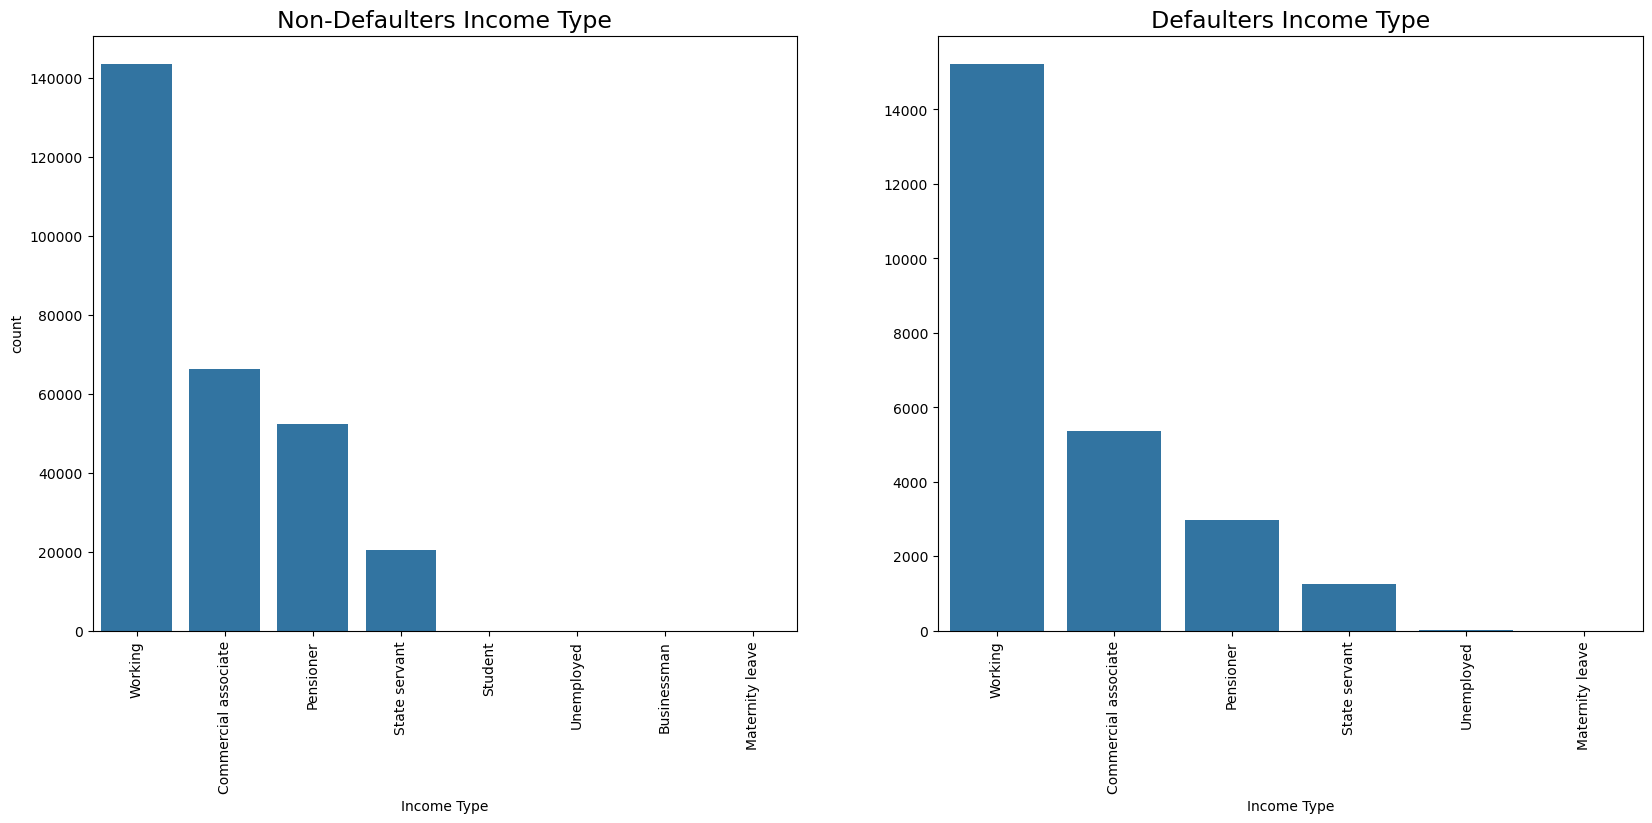

In [125]:
plt.figure(figsize=(20,17))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.NAME_INCOME_TYPE,order=target_value_0.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Income Type",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.NAME_INCOME_TYPE,order=target_value_1.NAME_INCOME_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Income Type', color = 'black', loc = 'center' )
plt.title("Defaulters Income Type", color ='black', fontsize = 17)
plt.ylabel('')
plt.show()


##### CONCLUSION
* Most of the defaulters and non defaulters are working, followed by commerical associate, pensioner, and state servant.

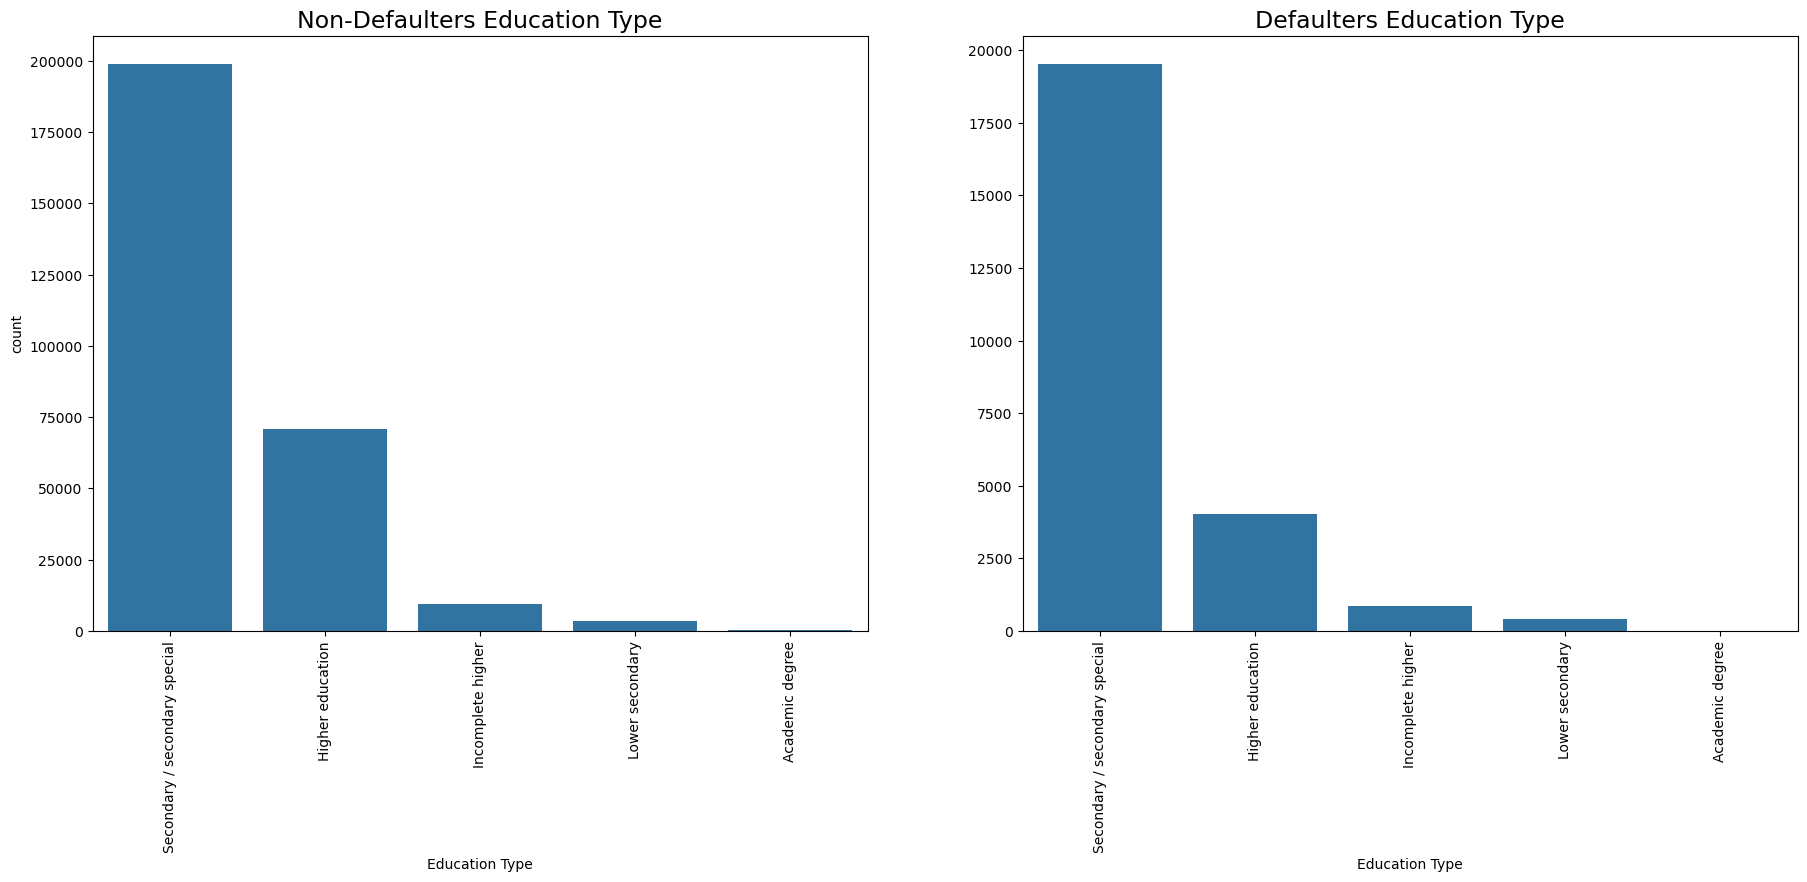

In [127]:
plt.figure(figsize=(22,17))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.NAME_EDUCATION_TYPE,order=target_value_0.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Education Type",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.NAME_EDUCATION_TYPE,order=target_value_1.NAME_EDUCATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Education Type', color = 'black', loc = 'center' )
plt.title("Defaulters Education Type", color ='black', fontsize = 17)
plt.ylabel('')
plt.show()


##### CONCLUSION
*  the highest qualification attained by both of them is secondary/secondary special, followed by higher education.
* The count of defaulters and non-defaulters who attained higher education, lower secondary didnot complete education is less as compared to other.

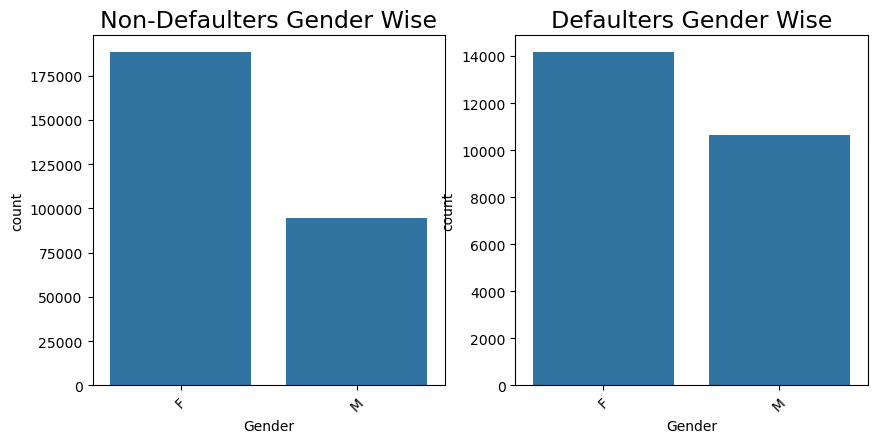

In [129]:
plt.figure(figsize=(10,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.CODE_GENDER,order=target_value_0.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Gender Wise",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.CODE_GENDER,order=target_value_1.CODE_GENDER.value_counts(normalize=True).index)
plt.xticks(rotation=45)
plt.xlabel(xlabel = 'Gender', color = 'black', loc = 'center' )
plt.title("Defaulters Gender Wise", color ='black', fontsize = 17)
plt.show()




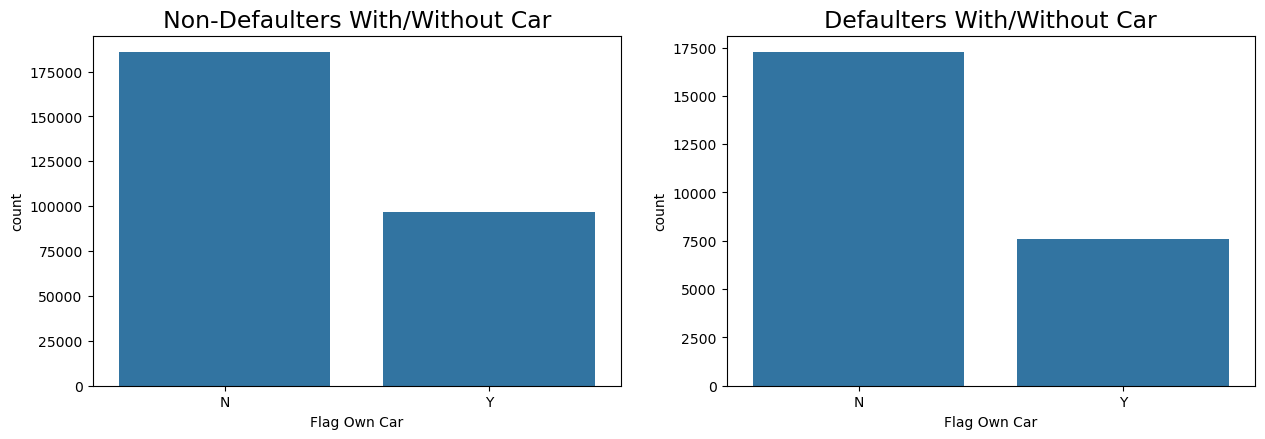

In [130]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.FLAG_OWN_CAR,order=target_value_0.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Flag Own Car', color = 'black', loc = 'center' )
plt.title("Non-Defaulters With/Without Car",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.FLAG_OWN_CAR,order=target_value_1.FLAG_OWN_CAR.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Flag Own Car', color = 'black', loc = 'center' )
plt.title("Defaulters With/Without Car", color ='black', fontsize = 17)
plt.show()

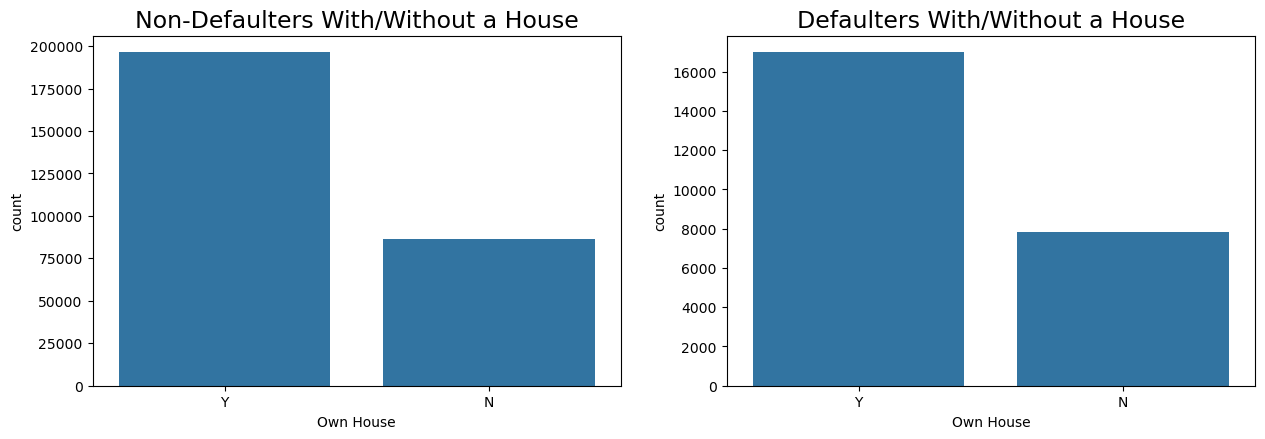

In [131]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.FLAG_OWN_REALTY,order=target_value_0.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Own House', color = 'black', loc = 'center' )
plt.title("Non-Defaulters With/Without a House",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.FLAG_OWN_REALTY,order=target_value_1.FLAG_OWN_REALTY.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Own House', color = 'black', loc = 'center' )
plt.title("Defaulters With/Without a House", color ='black', fontsize = 17)
plt.show()

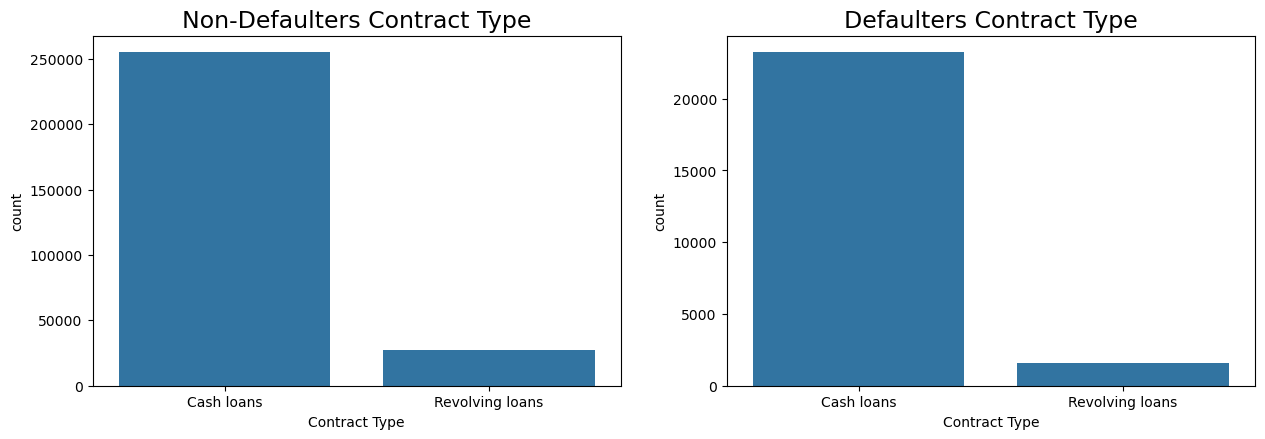

In [132]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.NAME_CONTRACT_TYPE,order=target_value_0.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Contract Type', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Contract Type",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.NAME_CONTRACT_TYPE,order=target_value_1.NAME_CONTRACT_TYPE.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Contract Type', color = 'black', loc = 'center' )
plt.title("Defaulters Contract Type", color ='black', fontsize = 17)
plt.show()

both of them chose cash loans.

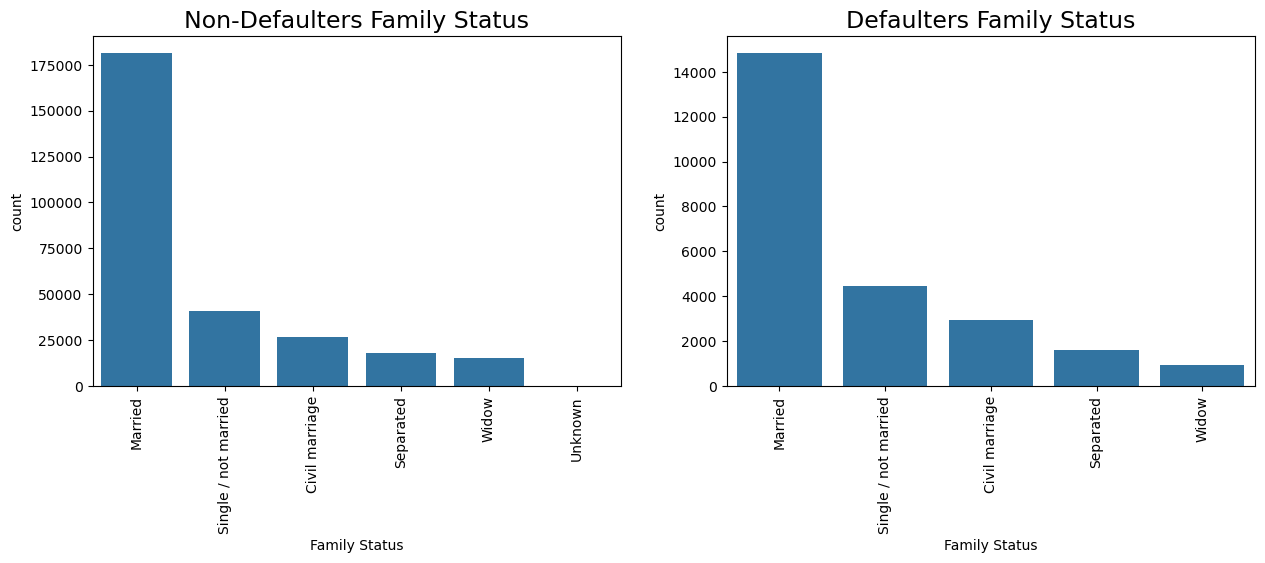

In [134]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.NAME_FAMILY_STATUS,order=target_value_0.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Family Status', color = 'black', loc = 'center' )
plt.xticks(rotation=90)
plt.title("Non-Defaulters Family Status",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.NAME_FAMILY_STATUS,order=target_value_1.NAME_FAMILY_STATUS.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Family Status', color = 'black', loc = 'center' )
plt.xticks(rotation=90)
plt.title("Defaulters Family Status", color ='black', fontsize = 17)
plt.show()


##### CONCLUSION
* the highest count of defaulters and non-defaulters is married, followed by single/not married.
* While the count of people who had civil marraige, are seperated, widow is lesser.

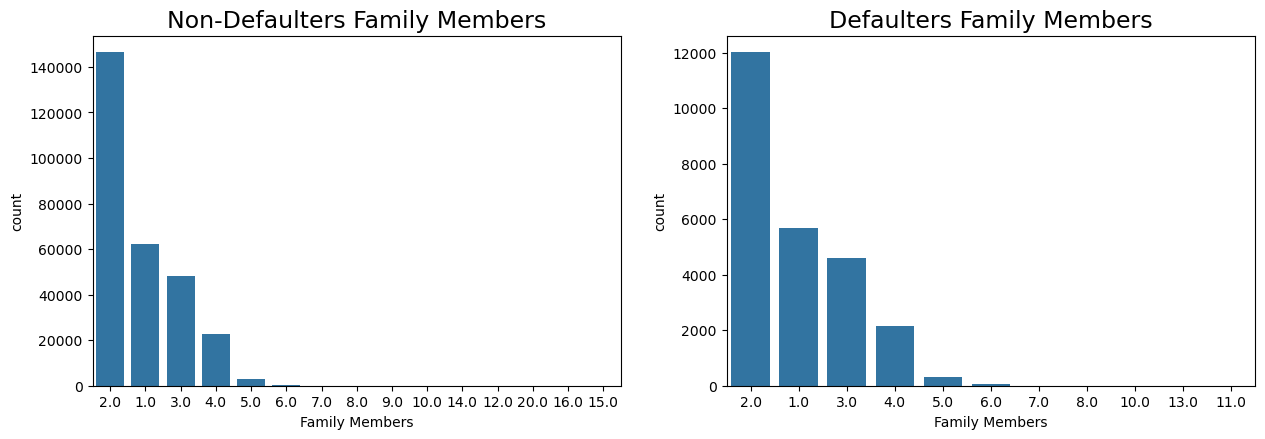

In [136]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.CNT_FAM_MEMBERS,order=target_value_0.CNT_FAM_MEMBERS.value_counts(normalize=True).index)

plt.xlabel(xlabel = 'Family Members', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Family Members",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.CNT_FAM_MEMBERS,order=target_value_1.CNT_FAM_MEMBERS.value_counts(normalize=True).index)
plt.xlabel(xlabel = 'Family Members', color = 'black', loc = 'center' )
plt.title("Defaulters Family Members", color ='black', fontsize = 17)
plt.show()

In [137]:
# both defaulers and non-defaulters have maximum of 2 members in their family.

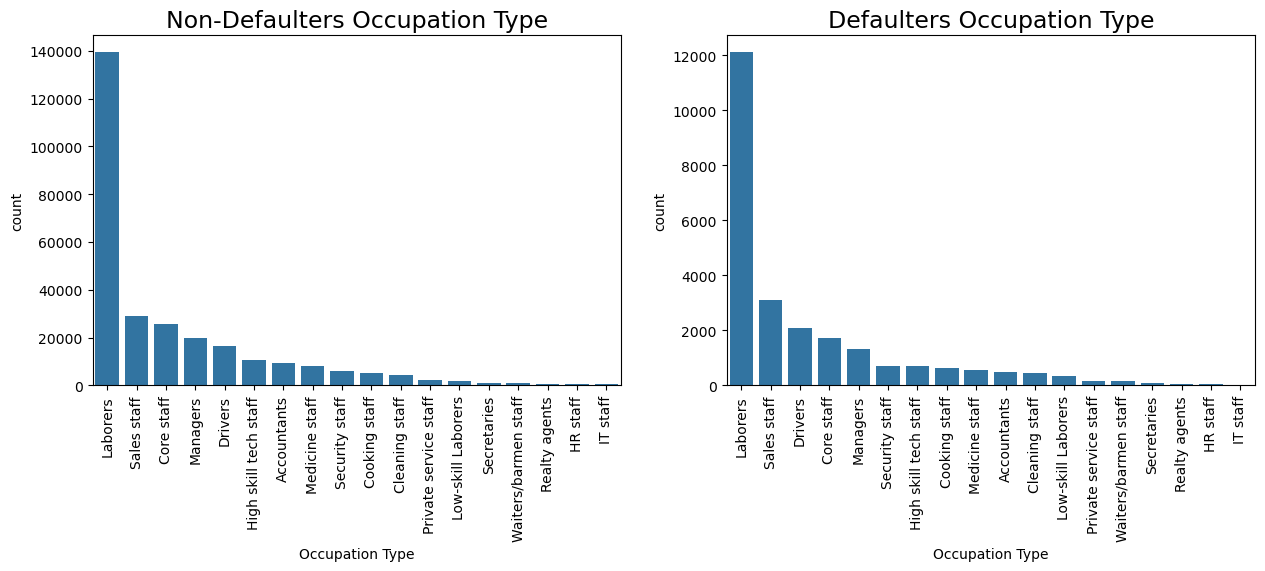

In [138]:
#OCCUPATION_TYPE
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.OCCUPATION_TYPE,order=target_value_0.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Occupation Type', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Occupation Type",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.OCCUPATION_TYPE,order=target_value_1.OCCUPATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Occupation Type', color = 'black', loc = 'center' )
plt.title("Defaulters Occupation Type", color ='black', fontsize = 17)
plt.show()

In [139]:
## most of them are laborers.

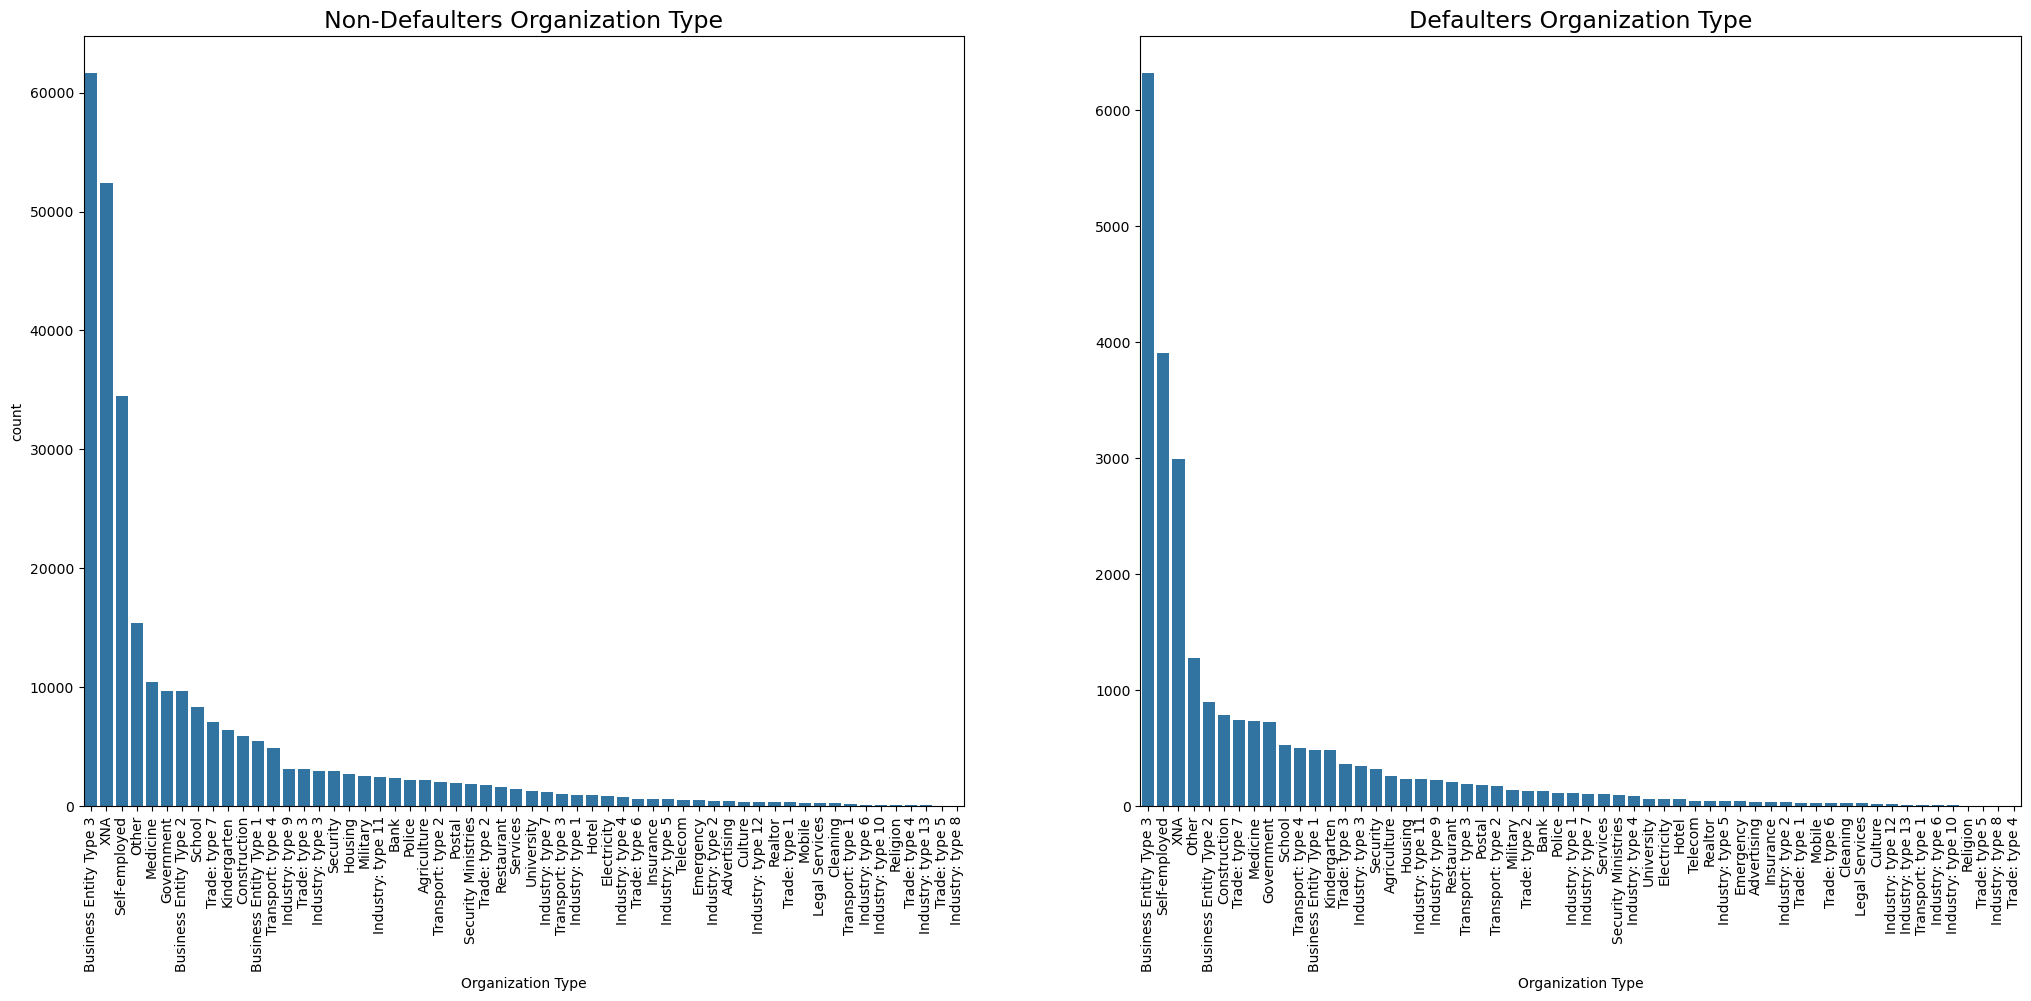

In [140]:
plt.figure(figsize=[25,22])
plt.subplot(2,2,1)
sns.countplot(x=target_value_0.ORGANIZATION_TYPE,order=target_value_0.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Organization Type', color = 'black', loc = 'center' )
plt.title("Non-Defaulters Organization Type",color ='black', fontsize = 17)

plt.subplot(2,2,2)
sns.countplot(x=target_value_1.ORGANIZATION_TYPE,order=target_value_1.ORGANIZATION_TYPE.value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel(xlabel = 'Organization Type', color = 'black', loc = 'center' )
plt.title("Defaulters Organization Type", color ='black', fontsize = 17)
plt.ylabel('')
plt.show()

In [141]:
#both work in business entity type 3

In [142]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 307511 entries, 0 to 307510
Data columns (total 54 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   307511 non-null  int64  
 1   TARGET                       307511 non-null  int64  
 2   NAME_CONTRACT_TYPE           307511 non-null  object 
 3   CODE_GENDER                  307511 non-null  object 
 4   FLAG_OWN_CAR                 307511 non-null  object 
 5   FLAG_OWN_REALTY              307511 non-null  object 
 6   CNT_CHILDREN                 307511 non-null  float64
 7   AMT_INCOME_TOTAL             307511 non-null  float64
 8   AMT_CREDIT                   307511 non-null  float64
 9   AMT_ANNUITY                  307499 non-null  float64
 10  AMT_GOODS_PRICE              307233 non-null  float64
 11  NAME_INCOME_TYPE             307511 non-null  object 
 12  NAME_EDUCATION_TYPE          307511 non-null  object 
 13 

In [143]:
df['AMT_INCOME_TOTAL'].astype('int')

0         202500
1         270000
2          67500
3         135000
4         121500
           ...  
307506    157500
307507     72000
307508    153000
307509    171000
307510    157500
Name: AMT_INCOME_TOTAL, Length: 307511, dtype: int32

#### Bivariate Analysis

In [145]:
selected_columns = target_value_0[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age']]
selected_columns

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  Age
1               270000.0   1293502.5      35698.5        1129500.0   46
2                67500.0    135000.0       6750.0         135000.0   52
3               135000.0    312682.5      29686.5         297000.0   52
4               121500.0    513000.0      21865.5         513000.0   55
5                99000.0    490495.5      27517.5         454500.0   46
...                  ...         ...          ...              ...  ...
307505          112500.0    225000.0      22050.0         225000.0   67
307506          157500.0    254700.0      27558.0         225000.0   26
307507           72000.0    269550.0      12001.5         225000.0   57
307508          153000.0    677664.0      29979.0         585000.0   41
307510          157500.0    675000.0      49117.5         675000.0   46

[282686 rows x 5 columns]

In [146]:
selected_columns2 = target_value_1[['AMT_INCOME_TOTAL','AMT_CREDIT','AMT_ANNUITY','AMT_GOODS_PRICE','Age']]
selected_columns2

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  Age
0               202500.0    406597.5      24700.5         351000.0   26
26              112500.0    979992.0      27076.5         702000.0   51
40              202500.0   1193580.0      35028.0         855000.0   48
42              135000.0    288873.0      16258.5         238500.0   37
81               81000.0    252000.0      14593.5         252000.0   68
...                  ...         ...          ...              ...  ...
307448          207000.0    450000.0      32746.5         450000.0   27
307475          144000.0   1303200.0      46809.0        1125000.0   37
307481          225000.0    297000.0      19975.5         297000.0   57
307489          225000.0    521280.0      23089.5         450000.0   45
307509          171000.0    370107.0      20205.0         319500.0   33

[24825 rows x 5 columns]

In [147]:
correlation_matrix=selected_columns.corr()
correlation_matrix

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.414309     0.492933         0.417680   
AMT_CREDIT                0.414309    1.000000     0.794822         0.985841   
AMT_ANNUITY               0.492933    0.794822     1.000000         0.797647   
AMT_GOODS_PRICE           0.417680    0.985841     0.797647         1.000000   
Age                      -0.086253    0.049419    -0.014661         0.047632   

                       Age  
AMT_INCOME_TOTAL -0.086253  
AMT_CREDIT        0.049419  
AMT_ANNUITY      -0.014661  
AMT_GOODS_PRICE   0.047632  
Age               1.000000

In [148]:
correlation_matrix2=selected_columns2.corr()
correlation_matrix2

AMT_INCOME_TOTAL  AMT_CREDIT  AMT_ANNUITY  AMT_GOODS_PRICE  \
AMT_INCOME_TOTAL          1.000000    0.356199     0.436918         0.357775   
AMT_CREDIT                0.356199    1.000000     0.760123         0.982183   
AMT_ANNUITY               0.436918    0.760123     1.000000         0.760733   
AMT_GOODS_PRICE           0.357775    0.982183     0.760733         1.000000   
Age                      -0.002713    0.137770     0.013313         0.139150   

                       Age  
AMT_INCOME_TOTAL -0.002713  
AMT_CREDIT        0.137770  
AMT_ANNUITY       0.013313  
AMT_GOODS_PRICE   0.139150  
Age               1.000000

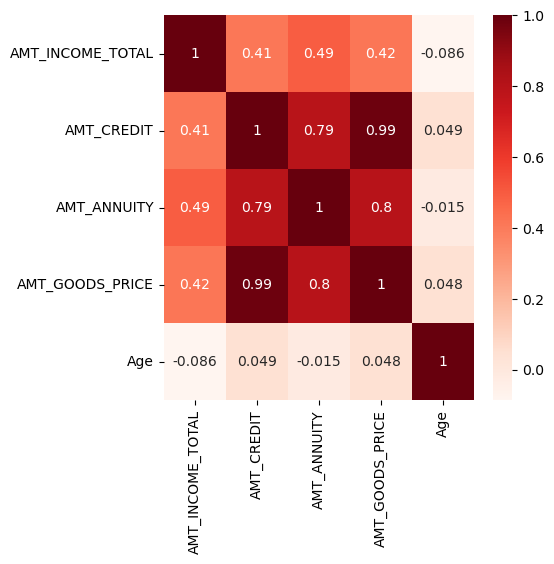

In [149]:
plt.figure(figsize=[5,5])
sns.heatmap(correlation_matrix, annot=True, cmap='Reds')
plt.show()

##### from the above heatmap, it can be concluded that
* AMT_ANNUITY and AMT_GOODS_PRICE have a strong positive correlation of 0.80, indicating that higher annuity amounts are somewhat related to the price of goods.
* AMT_CREDIT and AMT_GOODS_PRICE have a very strong positive correlation of 0.99. This implies that the total credit amount is almost directly tied to the goods price, meaning they tend to increase or decrease together.
* AMT_INCOME_TOTAL and Age have a very weak negative correlation of -0.09, implying there is no significant trend between age and income.

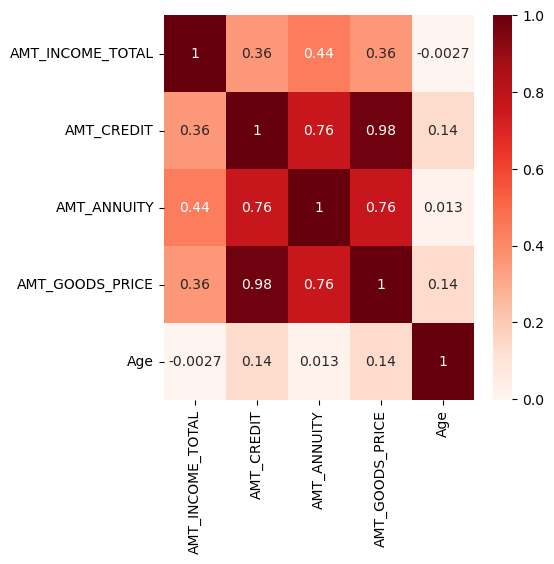

In [151]:
plt.figure(figsize=[5,5])
sns.heatmap(correlation_matrix2, annot=True, cmap='Reds')
plt.show()

#### CONCLUSION
* AMT_CREDIT and AMT_GOODS_PRICE have a very strong positive correlation of 0.98. This indicates that the amount of credit provided is almost directly tied to the price of the goods, meaning they tend to increase together.
* AMT_ANNUITY and AMT_GOODS_PRICE have a moderate positive correlation of 0.76, suggesting that higher annuity amounts tend to be associated with higher goods prices.
* AMT_INCOME_TOTAL and Age have a very weak negative correlation of -0.003, meaning there’s almost no relationship between income and age.

#### PAIRPLOT

<Figure size 1200x1200 with 0 Axes>

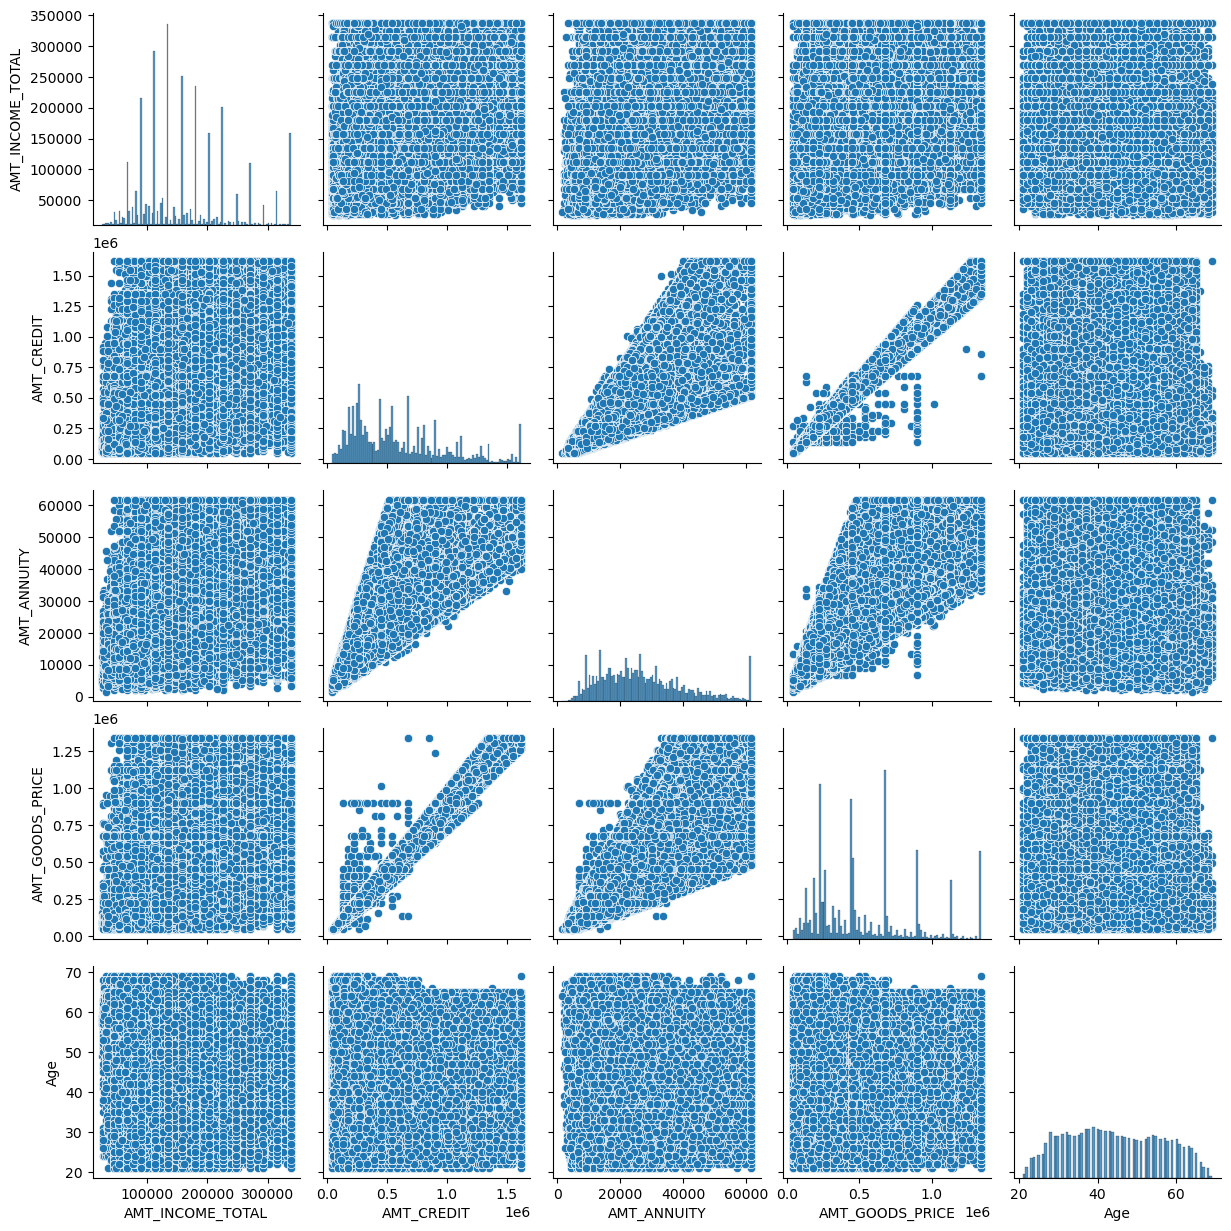

In [154]:
plt.figure(figsize=[12,12])
sns.pairplot(target_value_0[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

#### same inferences can be drawn

<Figure size 1200x1200 with 0 Axes>

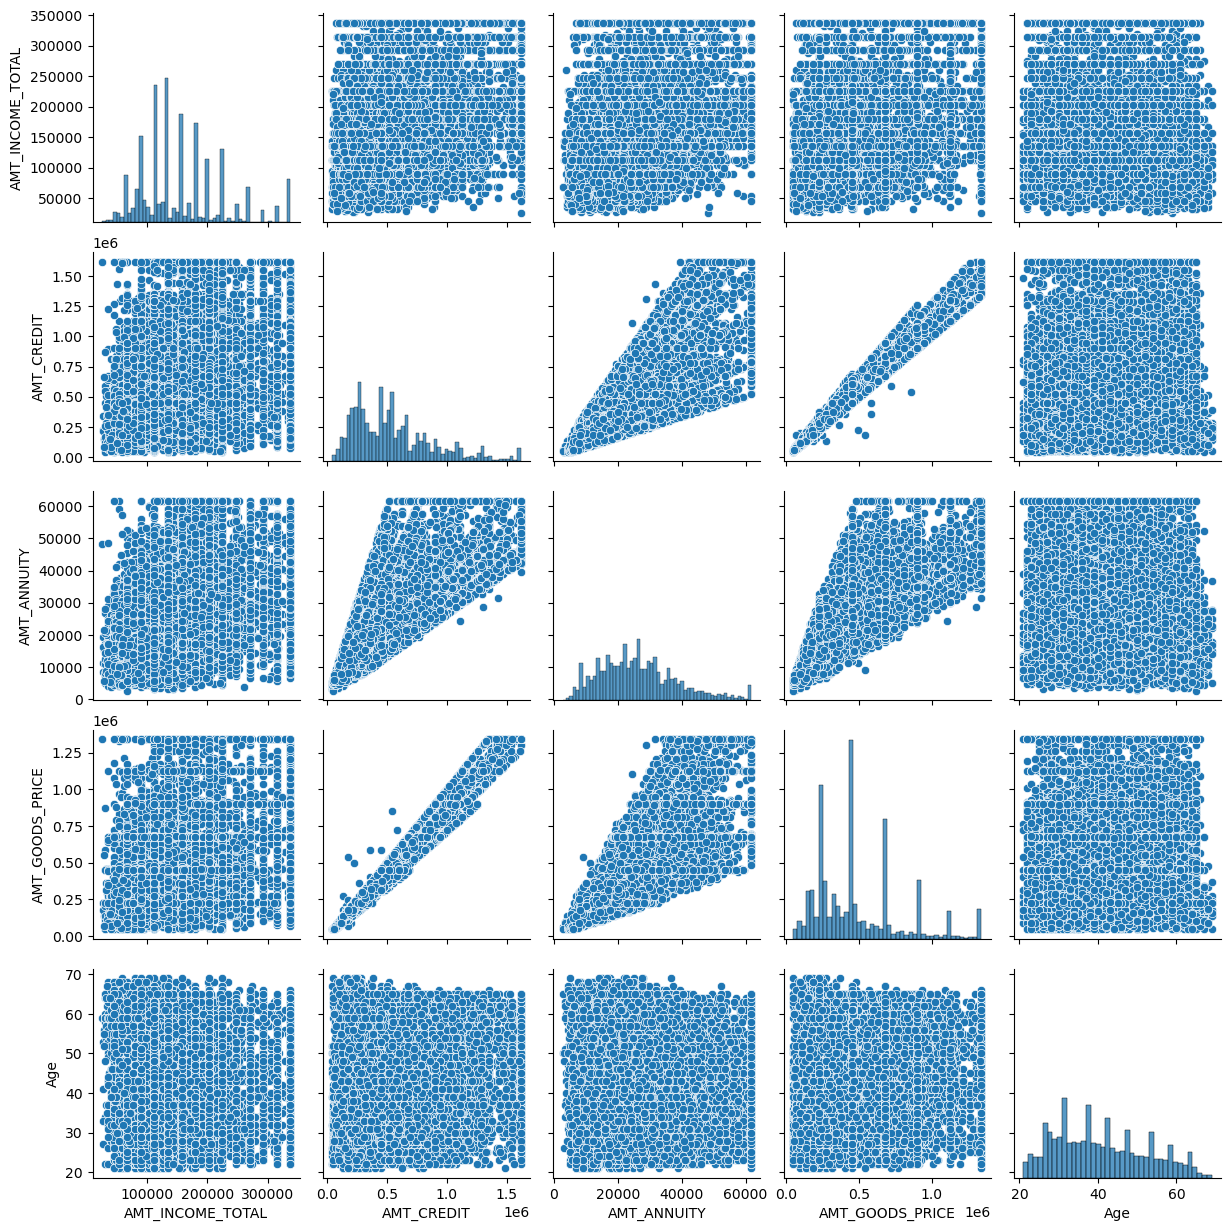

In [156]:
plt.figure(figsize=[12,12])
sns.pairplot(target_value_1[['AMT_INCOME_TOTAL', 'AMT_CREDIT', 'AMT_ANNUITY', 'AMT_GOODS_PRICE','Age']])
plt.show()

#### Multivariate Analysis

In [158]:
pivot_df=df.pivot_table(values = 'TARGET', index = 'NAME_CONTRACT_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df  #calculates the average of the TARGET variable grouped by contract type and gender.

CODE_GENDER                F         M
NAME_CONTRACT_TYPE                    
Cash loans          0.071811  0.105772
Revolving loans     0.053073  0.058274

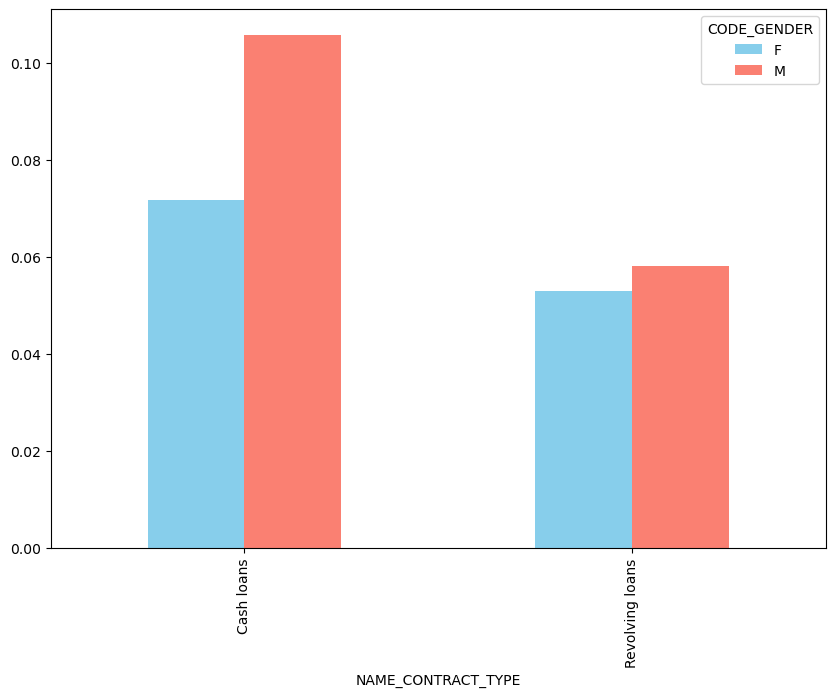

In [159]:
pivot_df.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

##### It shows that males tend to have a slightly higher default rate compared to females for both loan types.

In [161]:
pivot_df2=df.pivot_table(values = 'TARGET', index = 'NAME_INCOME_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df2

CODE_GENDER                  F         M
NAME_INCOME_TYPE                        
Businessman           0.000000  0.000000
Commercial associate  0.066667  0.088275
Maternity leave       0.500000  0.000000
Pensioner             0.049557  0.073161
State servant         0.053418  0.068753
Student               0.000000  0.000000
Unemployed            0.352941  0.400000
Working               0.083733  0.114857

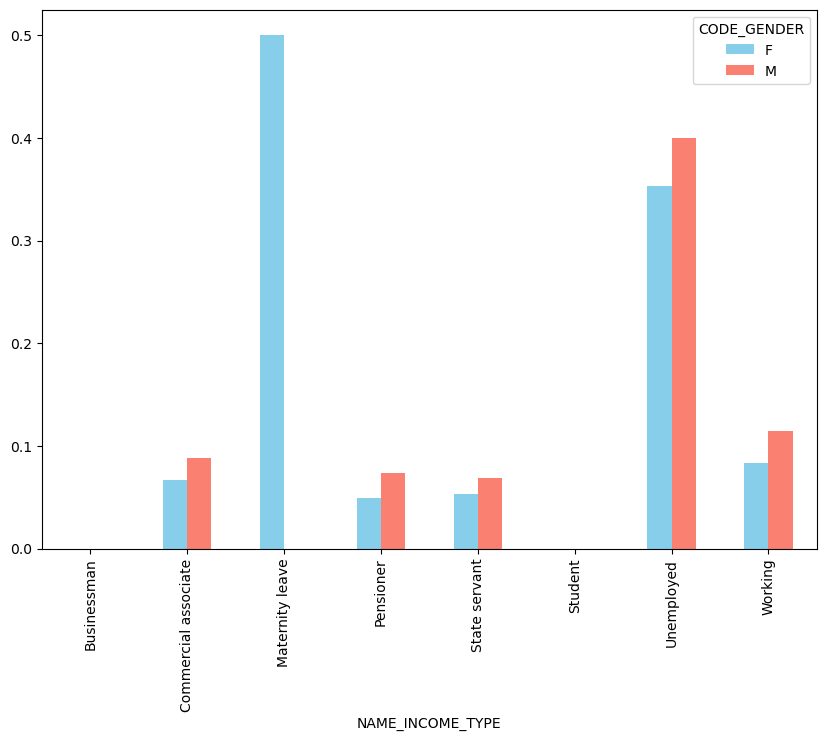

In [162]:
pivot_df2.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

#### CONCLUSION
* Businessman: No defaults for both females and males.
* Commercial associate:Females have a 6.67% default rate, Whereas Males have an 8.83% default rate.
* Maternity leave: Females have a 50% default rate, whereas Males have no defaults.
* Pensioner:Females have a 4.96% default rate, while Males have a 7.32% default rate.
* State servant:Females have a 5.34% default rate, whereas Males have a 6.88% default rate.
* Student: No defaults for both females and males.
* Unemployed:Females have a 35.29% default rate, whereas Males have a 40% default rate.
* Working:Females have an 8.37% default rate, whereas Males have an 11.49% default rate.

In [164]:
pivot_df3=df.pivot_table(values = 'TARGET', index = 'NAME_EDUCATION_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df3

CODE_GENDER                           F         M
NAME_EDUCATION_TYPE                              
Academic degree                0.030000  0.000000
Higher education               0.048479  0.063932
Incomplete higher              0.080204  0.092161
Lower secondary                0.092601  0.134884
Secondary / secondary special  0.076749  0.113622

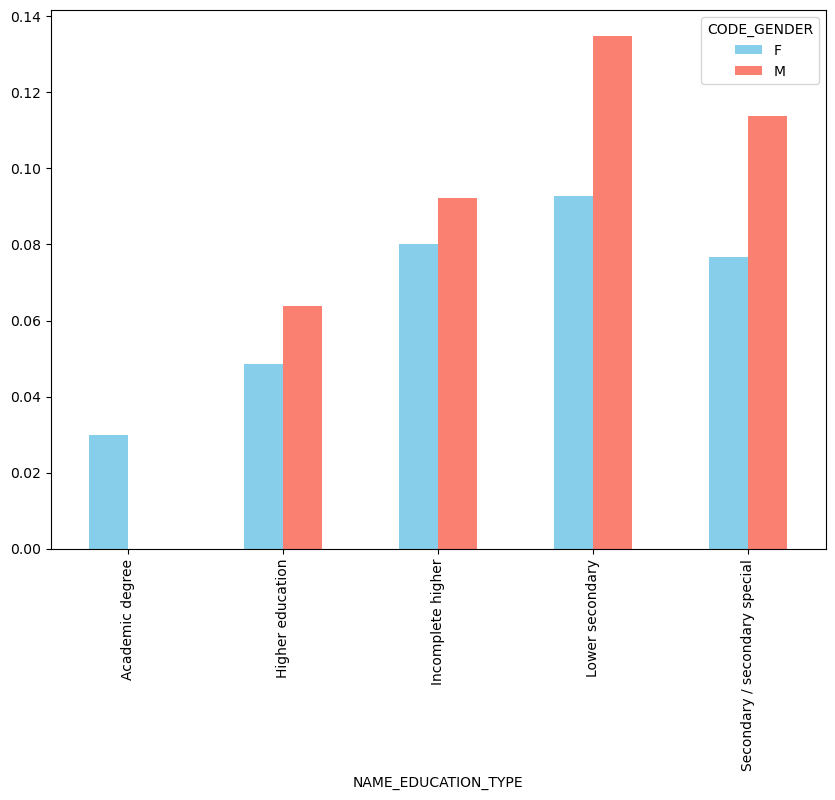

In [165]:
pivot_df3.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

##### CONCLUSION
* Academic degree: Females have no defaults, while males have a low default rate of 3%.
* Higher education: Males have a slightly higher default rate (6.39%) than females (4.85%).
* Incomplete higher: Males have a slightly higher default rate (9.22%) than females (8.02%).
* Lower secondary: Males have a noticeably higher default rate (13.49%) than females (9.26%).
* Secondary / secondary special: Males also have a higher default rate (11.36%) than females (7.67%).

In [167]:
pivot_df4=df.pivot_table(values = 'TARGET', index = 'NAME_FAMILY_STATUS', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df4

CODE_GENDER                  F         M
NAME_FAMILY_STATUS                      
Civil marriage        0.084401  0.134148
Married               0.067980  0.088208
Separated             0.067589  0.133442
Single / not married  0.077666  0.132681
Unknown               0.000000  0.000000
Widow                 0.054517  0.121111

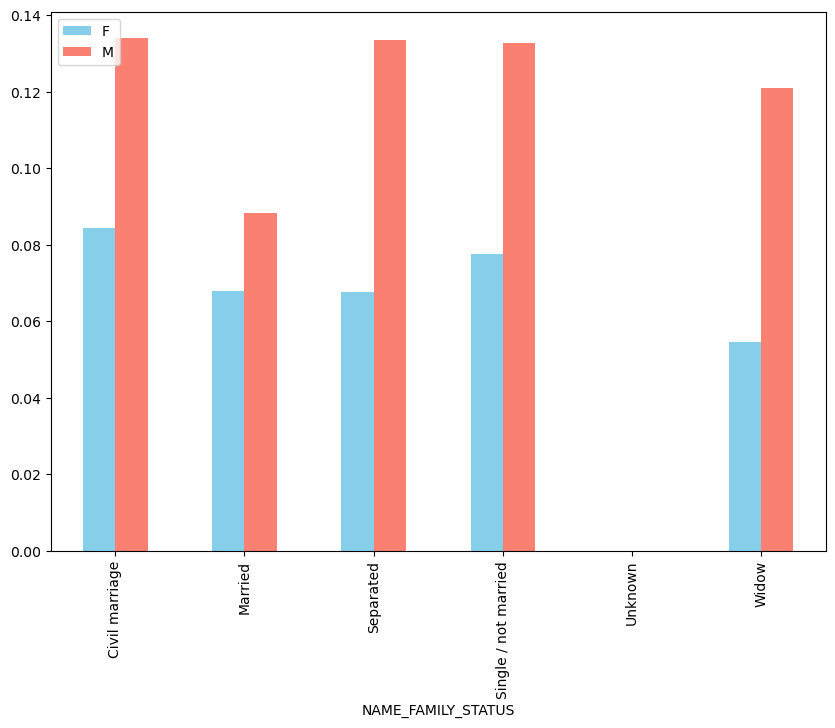

In [168]:
pivot_df4.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.legend(loc='upper left')
plt.show()


#### CONCLUSION:
* Civil marriage: Males have a higher default rate (13.41%) than females (8.44%).
* Married: Males have a higher default rate (8.82%) than females (6.80%).
* Separated: Males have a higher default rate (13.34%) than females (6.76%).
* Single / not married: Males have a higher default rate (13.27%) than females (7.77%).
* Unknown: No defaults for both genders.
* Widow: Males have a higher default rate (12.11%) than females (5.45%).

In [170]:
pivot_df5=df.pivot_table(values = 'TARGET', index = 'NAME_HOUSING_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df5

CODE_GENDER                 F         M
NAME_HOUSING_TYPE                      
Co-op apartment      0.072700  0.089286
House / apartment    0.067612  0.098540
Municipal apartment  0.074295  0.111816
Office apartment     0.067189  0.063653
Rented apartment     0.114892  0.133613
With parents         0.104563  0.131676

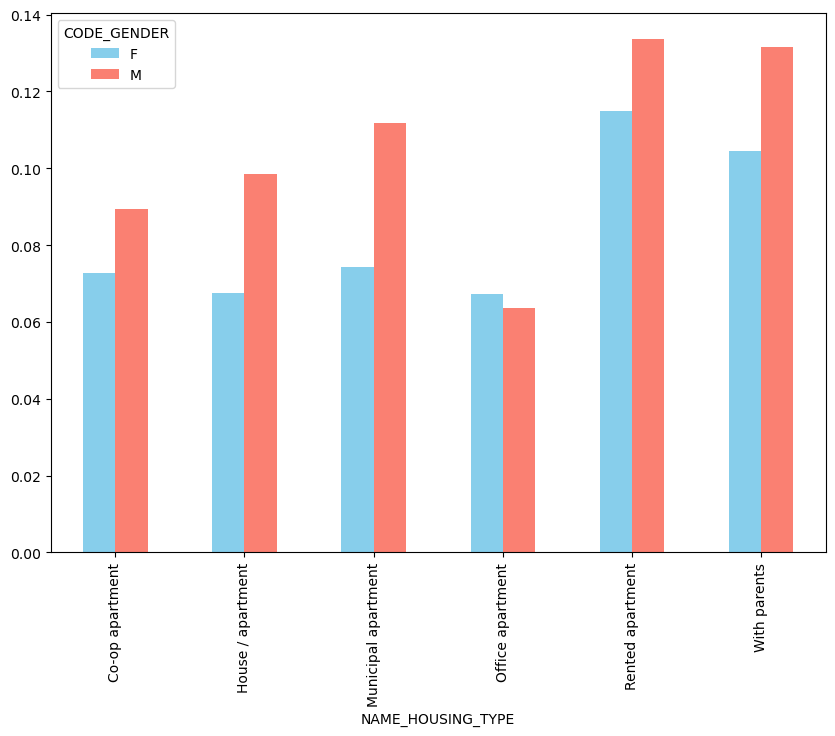

In [171]:
pivot_df5.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

#### CONCLUSIONS
* Co-op apartment: Males have a slightly higher default rate (8.93%) than females (7.27%).
* House / apartment: Males have a slightly higher default rate (9.85%) than females (6.76%).
* Municipal apartment: Males have a higher default rate (11.18%) than females (7.43%).
* Office apartment: Males have a lower default rate (6.37%) compared to females (6.72%).
* Rented apartment: Males have a higher default rate (13.36%) than females (11.49%).
* With parents: Males have a higher default rate (13.17%) than females (10.46%).T AS COMPARED TO OTHERS

In [173]:
pivot_df6=df.pivot_table(values = 'TARGET', index = 'CNT_FAM_MEMBERS', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df6

CODE_GENDER             F         M
CNT_FAM_MEMBERS                    
1.0              0.065287  0.130677
2.0              0.066192  0.094632
3.0              0.079874  0.099442
4.0              0.086003  0.087210
5.0              0.096061  0.090974
6.0              0.140496  0.126506
7.0              0.102041  0.031250
8.0              0.444444  0.181818
9.0              0.000000  0.000000
10.0             0.500000  0.000000
11.0                  NaN  1.000000
12.0             0.000000       NaN
13.0                  NaN  1.000000
14.0             0.000000       NaN
15.0                  NaN  0.000000
16.0             0.000000       NaN
20.0             0.000000       NaN

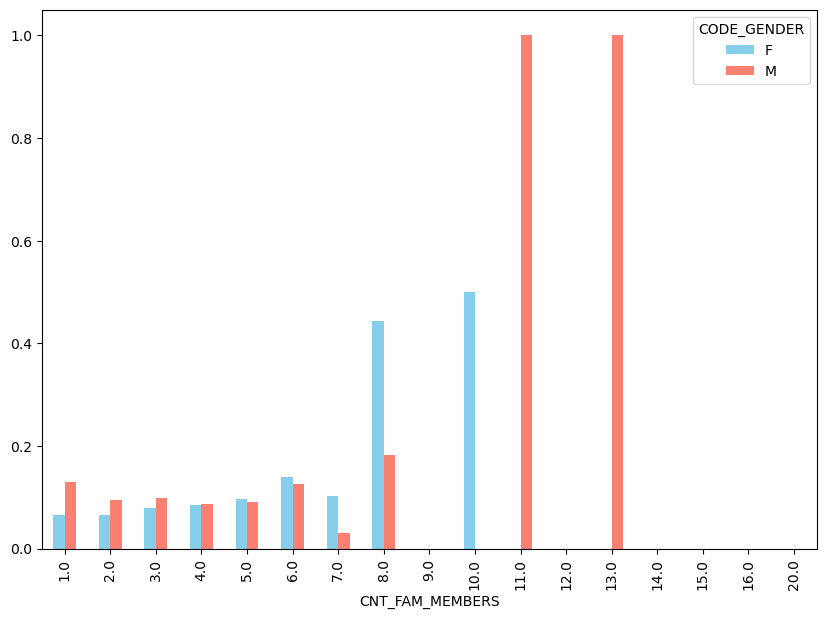

In [174]:
pivot_df6.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

#### CONCLUSION
* For 1-6 family members, the default rate tends to be slightly higher for females than for males, but the difference is small.
* Family size 7: Females have a higher default rate (10.2%), while males have a very low default rate (3.13%).
* Family size 8: Females have a very high default rate (44.44%) compared to males (18.18%).
* Family size 9: Both genders have no defaults.
* Family size 10: Females have a very high default rate (50%) while males have no defaults.
* Family sizes 11, 13, and 16: Males have default rates of 100% for sizes 11 and 13 (with missing values for females), suggesting extreme cases.
*Larger family sizes: For family sizes of 12, 14, and 15, there are missing values (NaN) for either females or males, indicating either no data or no defaults.

In [176]:
pivot_df7=df.pivot_table(values = 'TARGET', index = 'OCCUPATION_TYPE', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df7

CODE_GENDER                   F         M
OCCUPATION_TYPE                          
Accountants            0.047959  0.059859
Cleaning staff         0.095039  0.109145
Cooking staff          0.103064  0.117647
Core staff             0.059682  0.075674
Drivers                0.084324  0.114775
HR staff               0.062977  0.076923
High skill tech staff  0.063265  0.058561
IT staff               0.063291  0.065217
Laborers               0.065042  0.105880
Low-skill Laborers     0.152648  0.174944
Managers               0.055119  0.070464
Medicine staff         0.066048  0.100000
Private service staff  0.065800  0.070175
Realty agents          0.069666  0.177419
Sales staff            0.096559  0.094542
Secretaries            0.067362  0.137931
Security staff         0.096663  0.112108
Waiters/barmen staff   0.115059  0.096386

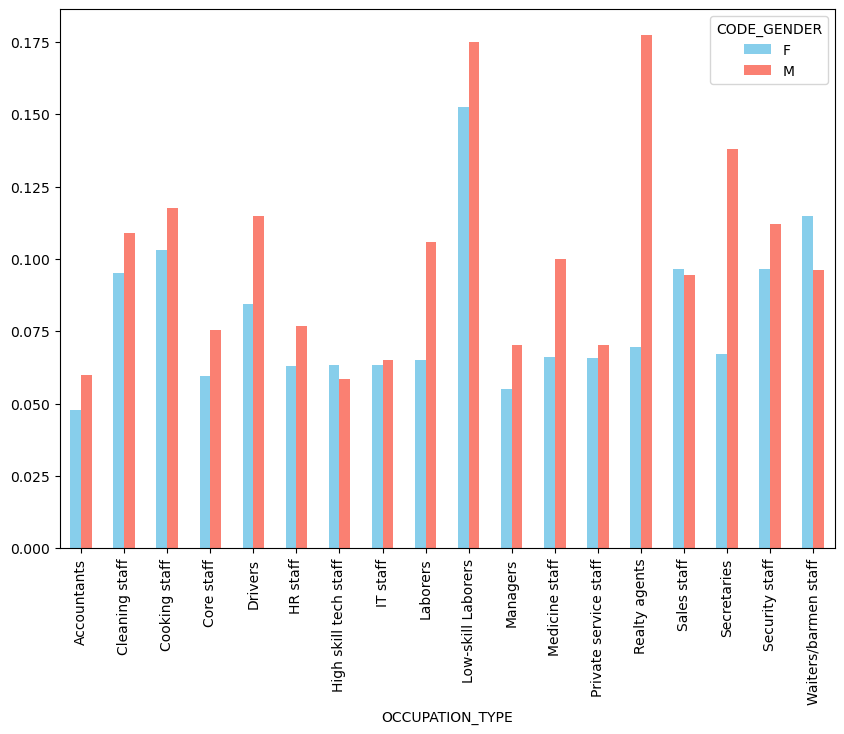

In [177]:
pivot_df7.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

#### CONCLUSION
* Low-skill Laborers have the highest default rates for both genders, with females at 15.26% and males at 17.49%.
* Waiters/barmen staff have relatively high default rates, with females at 11.51% and males at 9.64%.
* Cleaning staff, Cooking staff, and Laborers also show higher default rates, particularly for females.
* Managers, Accountants, and IT staff have lower default rates compared to other occupations.

In [179]:
df['Age'] = df['Age'].apply(lambda x: '21-30' if 21 <= x <= 30 else '31-40' if 31 <= x <= 40 else '41-50' if 41 <= x <= 50 else '51-60' if 51 <= x <= 60 else'61-70' if 61 <= x <= 70 else'Other')

In [180]:
pivot_df8=df.pivot_table(values = 'TARGET', index = 'Age', columns = 'CODE_GENDER',aggfunc = 'mean')
pivot_df8

CODE_GENDER         F         M
Age                            
21-30        0.106323  0.125232
31-40        0.085562  0.108125
41-50        0.065745  0.094430
51-60        0.050601  0.086753
61-70        0.045244  0.063863

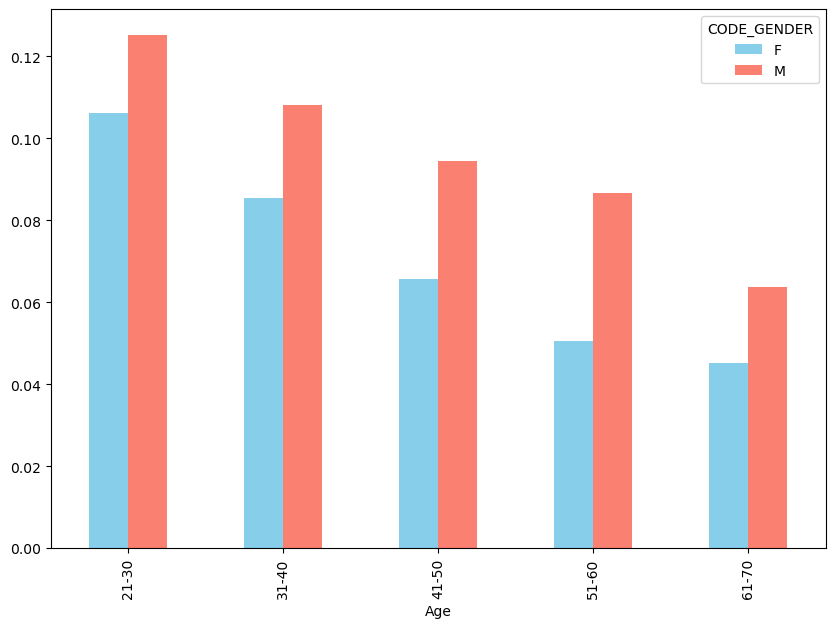

In [181]:
pivot_df8.plot(kind='bar',figsize=(10,7), color=['skyblue','salmon'])
plt.show()

##### CONCLUSION
* 21-30 age group: Males have a slightly higher default rate (12.52%) compared to females (10.63%).
* 31-40 age group: Males have a higher default rate (10.81%) than females (8.56%).
* 41-50 age group: Males have a higher default rate (9.44%) than females (6.57%).
* 51-60 age group: Males have a higher default rate (8.68%) than females (5.06%).
* 61-70 age group: Males have a higher default rate (6.39%) than females (4.52%).

In [183]:
previous_df= pd.read_csv("previous_application.csv")
previous_df.head()

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  AMT_APPLICATION  \
0     2030495      271877     Consumer loans     1730.430          17145.0   
1     2802425      108129         Cash loans    25188.615         607500.0   
2     2523466      122040         Cash loans    15060.735         112500.0   
3     2819243      176158         Cash loans    47041.335         450000.0   
4     1784265      202054         Cash loans    31924.395         337500.0   

   AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE WEEKDAY_APPR_PROCESS_START  \
0     17145.0               0.0          17145.0                   SATURDAY   
1    679671.0               NaN         607500.0                   THURSDAY   
2    136444.5               NaN         112500.0                    TUESDAY   
3    470790.0               NaN         450000.0                     MONDAY   
4    404055.0               NaN         337500.0                   THURSDAY   

   HOUR_APPR_PROCESS_START FLAG_LAST_APPL_PER_CONTRACT  \
0                       15                           Y   
1                       11                           Y   
2                       11                           Y   
3                        7                           Y   
4                        9                           Y   

   NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  \
0                       1                0.0               0.182832   
1                       1                NaN                    NaN   
2                       1                NaN                    NaN   
3                       1                NaN                    NaN   
4                       1                NaN                    NaN   

   RATE_INTEREST_PRIVILEGED NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                  0.867336                    XAP             Approved   
1                       NaN                    XNA             Approved   
2                       NaN                    XNA             Approved   
3                       NaN                    XNA             Approved   
4                       NaN                Repairs              Refused   

   DAYS_DECISION      NAME_PAYMENT_TYPE CODE_REJECT_REASON  NAME_TYPE_SUITE  \
0            -73  Cash through the bank                XAP              NaN   
1           -164                    XNA                XAP    Unaccompanied   
2           -301  Cash through the bank                XAP  Spouse, partner   
3           -512  Cash through the bank                XAP              NaN   
4           -781  Cash through the bank                 HC              NaN   

  NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO NAME_PRODUCT_TYPE  \
0         Repeater              Mobile            POS               XNA   
1         Repeater                 XNA           Cash            x-sell   
2         Repeater                 XNA           Cash            x-sell   
3         Repeater                 XNA           Cash            x-sell   
4         Repeater                 XNA           Cash           walk-in   

              CHANNEL_TYPE  SELLERPLACE_AREA NAME_SELLER_INDUSTRY  \
0             Country-wide                35         Connectivity   
1           Contact center                -1                  XNA   
2  Credit and cash offices                -1                  XNA   
3  Credit and cash offices                -1                  XNA   
4  Credit and cash offices                -1                  XNA   

   CNT_PAYMENT NAME_YIELD_GROUP       PRODUCT_COMBINATION  DAYS_FIRST_DRAWING  \
0         12.0           middle  POS mobile with interest            365243.0   
1         36.0       low_action          Cash X-Sell: low            365243.0   
2         12.0             high         Cash X-Sell: high            365243.0   
3         12.0           middle       Cash X-Sell: middle            365243.0   
4         24.0             high         Cash Street: high                 NaN   

   D

In [184]:
previous_df.shape

(1670214, 37)

In [185]:
previous_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1670214 entries, 0 to 1670213
Data columns (total 37 columns):
 #   Column                       Non-Null Count    Dtype  
---  ------                       --------------    -----  
 0   SK_ID_PREV                   1670214 non-null  int64  
 1   SK_ID_CURR                   1670214 non-null  int64  
 2   NAME_CONTRACT_TYPE           1670214 non-null  object 
 3   AMT_ANNUITY                  1297979 non-null  float64
 4   AMT_APPLICATION              1670214 non-null  float64
 5   AMT_CREDIT                   1670213 non-null  float64
 6   AMT_DOWN_PAYMENT             774370 non-null   float64
 7   AMT_GOODS_PRICE              1284699 non-null  float64
 8   WEEKDAY_APPR_PROCESS_START   1670214 non-null  object 
 9   HOUR_APPR_PROCESS_START      1670214 non-null  int64  
 10  FLAG_LAST_APPL_PER_CONTRACT  1670214 non-null  object 
 11  NFLAG_LAST_APPL_IN_DAY       1670214 non-null  int64  
 12  RATE_DOWN_PAYMENT            774370 non-nu

In [186]:
previous_df.describe()

SK_ID_PREV    SK_ID_CURR   AMT_ANNUITY  AMT_APPLICATION  \
count  1.670214e+06  1.670214e+06  1.297979e+06     1.670214e+06   
mean   1.923089e+06  2.783572e+05  1.595512e+04     1.752339e+05   
std    5.325980e+05  1.028148e+05  1.478214e+04     2.927798e+05   
min    1.000001e+06  1.000010e+05  0.000000e+00     0.000000e+00   
25%    1.461857e+06  1.893290e+05  6.321780e+03     1.872000e+04   
50%    1.923110e+06  2.787145e+05  1.125000e+04     7.104600e+04   
75%    2.384280e+06  3.675140e+05  2.065842e+04     1.803600e+05   
max    2.845382e+06  4.562550e+05  4.180581e+05     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  1.670213e+06      7.743700e+05     1.284699e+06   
mean   1.961140e+05      6.697402e+03     2.278473e+05   
std    3.185746e+05      2.092150e+04     3.153966e+05   
min    0.000000e+00     -9.000000e-01     0.000000e+00   
25%    2.416050e+04      0.000000e+00     5.084100e+04   
50%    8.054100e+04      1.638000e+03     1.123200e+05   
75%    2.164185e+05      7.740000e+03     2.340000e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count             1.670214e+06            1.670214e+06      774370.000000   
mean              1.248418e+01            9.964675e-01           0.079637   
std               3.334028e+00            5.932963e-02           0.107823   
min               0.000000e+00            0.000000e+00          -0.000015   
25%               1.000000e+01            1.000000e+00           0.000000   
50%               1.200000e+01            1.000000e+00           0.051605   
75%               1.500000e+01            1.000000e+00           0.108909   
max               2.300000e+01            1.000000e+00           1.000000   

       RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  DAYS_DECISION  \
count            5951.000000               5951.000000   1.670214e+06   
mean                0.188357                  0.773503  -8.806797e+02   
std                 0.087671                  0.100879   7.790997e+02   
min                 0.034781                  0.373150  -2.922000e+03   
25%                 0.160716                  0.715645  -1.300000e+03   
50%                 0.189122                  0.835095  -5.810000e+02   
75%                 0.193330                  0.852537  -2.800000e+02   
max                 1.000000                  1.000000  -1.000000e+00   

       SELLERPLACE_AREA   CNT_PAYMENT  DAYS_FIRST_DRAWING  DAYS_FIRST_DUE  \
count      1.670214e+06  1.297984e+06       997149.000000   997149.000000   
mean       3.139511e+02  1.605408e+01       342209.855039    13826.269337   
std        7.127443e+03  1.456729e+01        88916.115834    72444.869708   
min       -1.000000e+00  0.000000e+00        -2922.000000    -2892.000000   
25%       -1.000000e+00  6.000000e+00       365243.000000    -1628.000000   
50%        3.000000e+00  1.200000e+01       365243.000000     -831.000000   
75%        8.200000e+01  2.400000e+01       365243.000000     -411.000000   
max        4.000000e+06  8.400000e+01       365243.000000   365243.000000   

       DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  DAYS_TERMINATION  \
count              997149.000000  997149.000000     997149.000000   
mean                33767.774054   76582.403064      81992.343838   
std                106857.034789  149647.415123     153303.516729   
min                 -2801.000000   -2889.000000      -2874.000000   
25%                 -1242.000000   -1314.000000      -1270.000000   
50%                  -361.000000    -537.000000       -499.000000   
75%                   129.000000     -74.000000        -44.000000   
max                365243.000000  365243.000000     365243.000000   

       NFLAG_INSURED_ON_APPROVAL  
count              997149.000000  
mean                    0.332570  
std                     0.471134  
min                     0.000000  
25%                     0.0000

In [187]:
previous_df.describe(include=['object'])

NAME_CONTRACT_TYPE WEEKDAY_APPR_PROCESS_START  \
count             1670214                    1670214   
unique                  4                          7   
top            Cash loans                    TUESDAY   
freq               747553                     255118   

       FLAG_LAST_APPL_PER_CONTRACT NAME_CASH_LOAN_PURPOSE  \
count                      1670214                1670214   
unique                           2                     25   
top                              Y                    XAP   
freq                       1661739                 922661   

       NAME_CONTRACT_STATUS      NAME_PAYMENT_TYPE CODE_REJECT_REASON  \
count               1670214                1670214            1670214   
unique                    4                      4                  9   
top                Approved  Cash through the bank                XAP   
freq                1036781                1033552            1353093   

       NAME_TYPE_SUITE NAME_CLIENT_TYPE NAME_GOODS_CATEGORY NAME_PORTFOLIO  \
count           849809          1670214             1670214        1670214   
unique               7                4                  28              5   
top      Unaccompanied         Repeater                 XNA            POS   
freq            508970          1231261              950809         691011   

       NAME_PRODUCT_TYPE             CHANNEL_TYPE NAME_SELLER_INDUSTRY  \
count            1670214                  1670214              1670214   
unique                 3                        8                   11   
top                  XNA  Credit and cash offices                  XNA   
freq             1063666                   719968               855720   

       NAME_YIELD_GROUP PRODUCT_COMBINATION  
count           1670214             1669868  
unique                5                  17  
top                 XNA                Cash  
freq             517215              285990

In [188]:
previous_df.isnull().sum()

SK_ID_PREV                           0
SK_ID_CURR                           0
NAME_CONTRACT_TYPE                   0
AMT_ANNUITY                     372235
AMT_APPLICATION                      0
AMT_CREDIT                           1
AMT_DOWN_PAYMENT                895844
AMT_GOODS_PRICE                 385515
WEEKDAY_APPR_PROCESS_START           0
HOUR_APPR_PROCESS_START              0
FLAG_LAST_APPL_PER_CONTRACT          0
NFLAG_LAST_APPL_IN_DAY               0
RATE_DOWN_PAYMENT               895844
RATE_INTEREST_PRIMARY          1664263
RATE_INTEREST_PRIVILEGED       1664263
NAME_CASH_LOAN_PURPOSE               0
NAME_CONTRACT_STATUS                 0
DAYS_DECISION                        0
NAME_PAYMENT_TYPE                    0
CODE_REJECT_REASON                   0
NAME_TYPE_SUITE                 820405
NAME_CLIENT_TYPE                     0
NAME_GOODS_CATEGORY                  0
NAME_PORTFOLIO                       0
NAME_PRODUCT_TYPE                    0
CHANNEL_TYPE             

In [189]:
#calculating percentage
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
RATE_INTEREST_PRIMARY          99.643698
RATE_INTEREST_PRIVILEGED       99.643698
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYP

In [190]:
previous_df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        1036781
Canceled         316319
Refused          290678
Unused offer      26436
Name: count, dtype: int64

#### checking missing values

In [192]:
previous_df[previous_df['AMT_DOWN_PAYMENT'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
5           1383531      199383         Cash loans    23703.930   
...             ...         ...                ...          ...   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670208     1556789      209732         Cash loans    22299.390   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
5               315000.0    340573.5               NaN         315000.0   
...                  ...         ...               ...              ...   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670208         315000.0    436216.5               NaN         315000.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
5                         SATURDAY                        8   
...                            ...                      ...   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670208                   THURSDAY                       17   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
5                                 Y                       1   
...                             ...                     ...   
1670204                           Y                       1   
1670205                           Y                       1   
1670208                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
5                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670204                NaN                    NaN                       NaN   
1670205                NaN                    NaN                       NaN   
1670208                NaN                    NaN                       NaN   

In [193]:
previous_df[previous_df['RATE_DOWN_PAYMENT'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
5           1383531      199383         Cash loans    23703.930   
...             ...         ...                ...          ...   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670208     1556789      209732         Cash loans    22299.390   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
5               315000.0    340573.5               NaN         315000.0   
...                  ...         ...               ...              ...   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670208         315000.0    436216.5               NaN         315000.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
5                         SATURDAY                        8   
...                            ...                      ...   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670208                   THURSDAY                       17   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
5                                 Y                       1   
...                             ...                     ...   
1670204                           Y                       1   
1670205                           Y                       1   
1670208                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
5                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670204                NaN                    NaN                       NaN   
1670205                NaN                    NaN                       NaN   
1670208                NaN                    NaN                       NaN   

In [194]:
#### AMT_DOWN_PAYMENT  AND RATE_DOWN_PAYMENT ARE missing NOT at random.

In [195]:
previous_df[previous_df['RATE_INTEREST_PRIMARY'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
5           1383531      199383         Cash loans    23703.930   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
5               315000.0    340573.5               NaN         315000.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
5                         SATURDAY                        8   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
5                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
5                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

In [196]:
previous_df[previous_df['RATE_INTEREST_PRIVILEGED'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
1           2802425      108129         Cash loans    25188.615   
2           2523466      122040         Cash loans    15060.735   
3           2819243      176158         Cash loans    47041.335   
4           1784265      202054         Cash loans    31924.395   
5           1383531      199383         Cash loans    23703.930   
...             ...         ...                ...          ...   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   
1670212     2785582      400317         Cash loans    18821.520   
1670213     2418762      261212         Cash loans    16431.300   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
1               607500.0    679671.0               NaN         607500.0   
2               112500.0    136444.5               NaN         112500.0   
3               450000.0    470790.0               NaN         450000.0   
4               337500.0    404055.0               NaN         337500.0   
5               315000.0    340573.5               NaN         315000.0   
...                  ...         ...               ...              ...   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   
1670212         180000.0    191880.0               NaN         180000.0   
1670213         360000.0    360000.0               NaN         360000.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
1                         THURSDAY                       11   
2                          TUESDAY                       11   
3                           MONDAY                        7   
4                         THURSDAY                        9   
5                         SATURDAY                        8   
...                            ...                      ...   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   
1670212                  WEDNESDAY                        9   
1670213                     SUNDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
1                                 Y                       1   
2                                 Y                       1   
3                                 Y                       1   
4                                 Y                       1   
5                                 Y                       1   
...                             ...                     ...   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   
1670212                           Y                       1   
1670213                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
1                      NaN                    NaN                       NaN   
2                      NaN                    NaN                       NaN   
3                      NaN                    NaN                       NaN   
4                      NaN                    NaN                       NaN   
5                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670209           0.000000                    NaN                       NaN   
1670210           0.340554                    NaN                       NaN   
1670211           0.101401                    NaN                       NaN   

In [197]:
previous_df[previous_df['DAYS_FIRST_DRAWING'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [198]:
previous_df[previous_df['DAYS_FIRST_DUE'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [199]:
previous_df[previous_df['DAYS_LAST_DUE_1ST_VERSION'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [200]:
previous_df[previous_df['DAYS_LAST_DUE'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [201]:
previous_df[previous_df['DAYS_TERMINATION'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [202]:
previous_df[previous_df['NFLAG_INSURED_ON_APPROVAL'].isna()]

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
4           1784265      202054         Cash loans    31924.395   
6           2315218      175704         Cash loans          NaN   
7           1656711      296299         Cash loans          NaN   
8           2367563      342292         Cash loans          NaN   
9           2579447      334349         Cash loans          NaN   
...             ...         ...                ...          ...   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670204     1407146      198989         Cash loans    36598.095   
1670205     2815130      338803         Cash loans    14584.050   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
4               337500.0    404055.0               NaN         337500.0   
6                    0.0         0.0               NaN              NaN   
7                    0.0         0.0               NaN              NaN   
8                    0.0         0.0               NaN              NaN   
9                    0.0         0.0               NaN              NaN   
...                  ...         ...               ...              ...   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670204         450000.0    570073.5               NaN         450000.0   
1670205         135000.0    182956.5               NaN         135000.0   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
4                         THURSDAY                        9   
6                          TUESDAY                       11   
7                           MONDAY                        7   
8                           MONDAY                       15   
9                         SATURDAY                       15   
...                            ...                      ...   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670204                   THURSDAY                       12   
1670205                   SATURDAY                       10   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
4                                 Y                       1   
6                                 Y                       1   
7                                 Y                       1   
8                                 Y                       1   
9                                 Y                       1   
...                             ...                     ...   
1670197                           Y                       1   
1670203                           Y                       1   
1670204                           Y                       1   
1670205                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT  RATE_INTEREST_PRIMARY  RATE_INTEREST_PRIVILEGED  \
4                      NaN                    NaN                       NaN   
6                      NaN                    NaN                       NaN   
7                      NaN                    NaN                       NaN   
8                      NaN                    NaN                       NaN   
9                      NaN                    NaN                       NaN   
...                    ...                    ...                       ...   
1670197                0.0                    NaN                       NaN   
1670203                0.0                    NaN                       NaN   
1670204                NaN                    NaN                       NaN   

In [203]:
previous_df['RATE_INTEREST_PRIMARY'].describe()

count    5951.000000
mean        0.188357
std         0.087671
min         0.034781
25%         0.160716
50%         0.189122
75%         0.193330
max         1.000000
Name: RATE_INTEREST_PRIMARY, dtype: float64

In [204]:
previous_df['RATE_INTEREST_PRIMARY'].mode()

0    0.189136
Name: RATE_INTEREST_PRIMARY, dtype: float64

In [205]:
previous_df['RATE_INTEREST_PRIMARY'].median()

0.1891221806641732

In [206]:
previous_df['RATE_INTEREST_PRIMARY'].mean()

0.18835688954982058

##### When mean = median = mode, it usually indicates that the data is normally distributed

In [208]:
previous_df.drop(columns=['RATE_INTEREST_PRIMARY','RATE_INTEREST_PRIVILEGED'],axis=1,inplace=True)
#### dropping this column beacuse after dropping missing values, the remaining 0.4% values will not be useful .

In [209]:
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                    22.286665
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000060
AMT_DOWN_PAYMENT               53.636480
AMT_GOODS_PRICE                23.081773
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT              53.636480
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                49.119754
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA

In [210]:
previous_df['RATE_DOWN_PAYMENT'].describe()

count    774370.000000
mean          0.079637
std           0.107823
min          -0.000015
25%           0.000000
50%           0.051605
75%           0.108909
max           1.000000
Name: RATE_DOWN_PAYMENT, dtype: float64

In [211]:
previous_df['RATE_DOWN_PAYMENT'].mode()

0    0.0
Name: RATE_DOWN_PAYMENT, dtype: float64

In [212]:
previous_df['AMT_DOWN_PAYMENT'].describe()

count    7.743700e+05
mean     6.697402e+03
std      2.092150e+04
min     -9.000000e-01
25%      0.000000e+00
50%      1.638000e+03
75%      7.740000e+03
max      3.060045e+06
Name: AMT_DOWN_PAYMENT, dtype: float64

In [213]:
previous_df['AMT_DOWN_PAYMENT'].mode()

0    0.0
Name: AMT_DOWN_PAYMENT, dtype: float64

In [214]:
previous_df.dropna(subset=['RATE_DOWN_PAYMENT','AMT_DOWN_PAYMENT'],inplace=True)

In [215]:
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     4.311763
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT                0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT               0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                35.688753
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA

In [216]:
previous_df[previous_df['NAME_TYPE_SUITE'].isna()]


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
14          2273188      270658     Consumer loans     9644.220   
27          1676258      433469         Cash loans    22242.825   
30          2138466      170289     Consumer loans     3286.485   
31          2191093      182450     Consumer loans     9789.255   
...             ...         ...                ...          ...   
1670196     1662123      398290     Consumer loans          NaN   
1670197     1854636      184353     Consumer loans    15708.150   
1670198     1540903      212968     Consumer loans     2088.495   
1670200     1024416      331038         Cash loans     7576.920   
1670209     2300464      352015     Consumer loans    14704.290   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
14               26550.0     27252.0               0.0          26550.0   
27              247500.0    268083.0               0.0         247500.0   
30               32562.0     32562.0               0.0          32562.0   
31              100485.0    100485.0               0.0         100485.0   
...                  ...         ...               ...              ...   
1670196          57910.5     57910.5               0.0          57910.5   
1670197         153220.5    153220.5               0.0         153220.5   
1670198          22869.0     20578.5            2290.5          22869.0   
1670200          99000.0    112068.0               0.0          99000.0   
1670209         267295.5    311400.0               0.0         267295.5   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
14                        SATURDAY                       10   
27                        THURSDAY                       14   
30                          FRIDAY                       12   
31                       WEDNESDAY                        9   
...                            ...                      ...   
1670196                   SATURDAY                        9   
1670197                   SATURDAY                       12   
1670198                     SUNDAY                       16   
1670200                     FRIDAY                       14   
1670209                  WEDNESDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
14                                Y                       1   
27                                Y                       1   
30                                Y                       1   
31                                Y                       1   
...                             ...                     ...   
1670196                           Y                       1   
1670197                           Y                       1   
1670198                           Y                       1   
1670200                           Y                       1   
1670209                           Y                       1   

         RATE_DOWN_PAYMENT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
0                 0.000000                    XAP             Approved   
14                0.000000                    XAP             Approved   
27                0.000000                    XNA             Approved   
30                0.000000                    XAP             Approved   
31                0.000000                    XAP             Approved   
...                    ...                    ...                  ...   
1670196           0.000000                    XAP         Unused offer   
1670197           0.000000                    XAP              Refused   
1670198           0.109081                    XAP             Approved   
1670200           0.000000                    XNA

In [217]:
previous_df['NAME_TYPE_SUITE'].describe()

count            498007
unique                7
top       Unaccompanied
freq             230095
Name: NAME_TYPE_SUITE, dtype: object

In [218]:
name_type_suit_mean=previous_df['NAME_TYPE_SUITE'].mode()[0]
name_type_suit_mean

'Unaccompanied'

In [219]:
previous_df['NAME_TYPE_SUITE'].fillna(name_type_suit_mean, inplace=True)

In [220]:
# previous_df.drop(columns='NAME_TYPE_SUITE', axis=1, inplace=True)

In [221]:
previous_df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        662381
Refused          87352
Unused offer     23994
Canceled           643
Name: count, dtype: int64

In [222]:
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     4.311763
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT                0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT               0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA

In [223]:
previous_df[previous_df['DAYS_FIRST_DRAWING'].isna()]


SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
36          2766278      178375     Consumer loans     7511.085   
41          1366380      247572     Consumer loans          NaN   
54          1399859      197343     Consumer loans     4818.780   
74          1385097      369423     Consumer loans     2652.705   
98          1457539      307992     Consumer loans          NaN   
...             ...         ...                ...          ...   
1669963     1759823      213646         Cash loans    17389.800   
1670196     1662123      398290     Consumer loans          NaN   
1670197     1854636      184353     Consumer loans    15708.150   
1670203     2844282      383898     Consumer loans          NaN   
1670207     1662353      443544         Cash loans    12607.875   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
36               32490.0     38380.5               0.0          32490.0   
41               17950.5     17950.5               0.0          17950.5   
54              106398.0    106398.0               0.0         106398.0   
74               19611.0     14170.5            6111.0          19611.0   
98              113215.5    113215.5               0.0         113215.5   
...                  ...         ...               ...              ...   
1669963          90000.0     90000.0               0.0          90000.0   
1670196          57910.5     57910.5               0.0          57910.5   
1670197         153220.5    153220.5               0.0         153220.5   
1670203          14791.5     14791.5               0.0          14791.5   
1670207         112500.0    112500.0               0.0         112500.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
36                          MONDAY                        5   
41                          MONDAY                       19   
54                        SATURDAY                       14   
74                          FRIDAY                       12   
98                          SUNDAY                       12   
...                            ...                      ...   
1669963                     MONDAY                       12   
1670196                   SATURDAY                        9   
1670197                   SATURDAY                       12   
1670203                    TUESDAY                       13   
1670207                     MONDAY                       10   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
36                                Y                       1   
41                                Y                       1   
54                                Y                       1   
74                                Y                       1   
98                                Y                       1   
...                             ...                     ...   
1669963                           Y                       1   
1670196                           Y                       1   
1670197                           Y                       1   
1670203                           Y                       1   
1670207                           Y                       1   

         RATE_DOWN_PAYMENT NAME_CASH_LOAN_PURPOSE NAME_CONTRACT_STATUS  \
36                0.000000                    XAP              Refused   
41                0.000000                    XAP         Unused offer   
54                0.000000                    XAP              Refused   
74                0.328153                    XAP             Approved   
98                0.000000                    XAP         Unused offer   
...                    ...                    ...                  ...   
1669963           0.000000                    XNA              Refused   
1670196           0.000000                    XAP         Unused offer   
1670197           0.000000                    XAP              Refused   
1670203           0.000000                    XAP

In [224]:
previous_df.DAYS_FIRST_DRAWING.describe()

count    648968.000000
mean     364799.328153
std       12749.055056
min       -2854.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

#### The minimum value of -2854 suggests an anomaly, as it indicates disbursement occurred 2,854 days before the application date, which is highly unusual and might be an error or outlier.

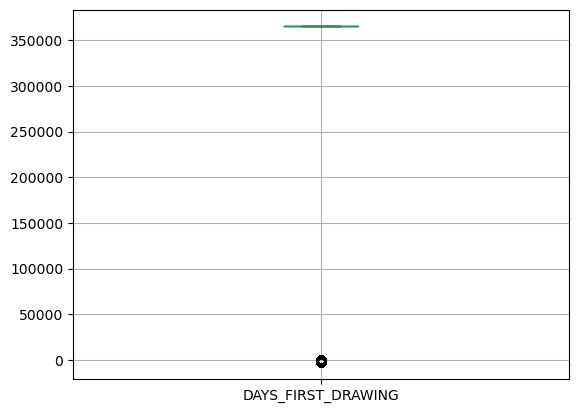

In [226]:
previous_df.boxplot(column=['DAYS_FIRST_DRAWING'])
plt.show()

In [227]:
days_mean=previous_df.DAYS_FIRST_DRAWING.mean()

In [228]:
previous_df['DAYS_FIRST_DRAWING']= previous_df['DAYS_FIRST_DRAWING'].fillna(days_mean)

In [229]:
previous_df.DAYS_FIRST_DRAWING.describe()

count    774370.000000
mean     364799.328153
std       11671.194966
min       -2854.000000
25%      365243.000000
50%      365243.000000
75%      365243.000000
max      365243.000000
Name: DAYS_FIRST_DRAWING, dtype: float64

In [230]:
# Replace negative values with the mean (or median)
previous_df['DAYS_FIRST_DRAWING'] = previous_df['DAYS_FIRST_DRAWING'].apply(lambda x: x if x >= 0 else previous_df['DAYS_FIRST_DRAWING'].mean())

In [231]:
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                      0.000000
SK_ID_CURR                      0.000000
NAME_CONTRACT_TYPE              0.000000
AMT_ANNUITY                     4.311763
AMT_APPLICATION                 0.000000
AMT_CREDIT                      0.000000
AMT_DOWN_PAYMENT                0.000000
AMT_GOODS_PRICE                 0.000000
WEEKDAY_APPR_PROCESS_START      0.000000
HOUR_APPR_PROCESS_START         0.000000
FLAG_LAST_APPL_PER_CONTRACT     0.000000
NFLAG_LAST_APPL_IN_DAY          0.000000
RATE_DOWN_PAYMENT               0.000000
NAME_CASH_LOAN_PURPOSE          0.000000
NAME_CONTRACT_STATUS            0.000000
DAYS_DECISION                   0.000000
NAME_PAYMENT_TYPE               0.000000
CODE_REJECT_REASON              0.000000
NAME_TYPE_SUITE                 0.000000
NAME_CLIENT_TYPE                0.000000
NAME_GOODS_CATEGORY             0.000000
NAME_PORTFOLIO                  0.000000
NAME_PRODUCT_TYPE               0.000000
CHANNEL_TYPE                    0.000000
SELLERPLACE_AREA

In [232]:
previous_df['DAYS_FIRST_DUE'].describe()

count    648968.000000
mean       2635.238190
std       37692.465247
min       -2892.000000
25%       -1992.000000
50%       -1146.000000
75%        -516.000000
max      365243.000000
Name: DAYS_FIRST_DUE, dtype: float64

In [233]:
negative_values = previous_df[previous_df['DAYS_FIRST_DUE']<0]
negative_values

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
13          1397919      321676     Consumer loans     7654.860   
14          2273188      270658     Consumer loans     9644.220   
15          1232483      151612     Consumer loans    21307.455   
16          2163253      154602     Consumer loans     4187.340   
...             ...         ...                ...          ...   
1670202     2205099      157707     Consumer loans     4334.355   
1670206     2459206      238591         Cash loans    19401.435   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
13               53779.5     57564.0               0.0          53779.5   
14               26550.0     27252.0               0.0          26550.0   
15              126490.5    119853.0           12649.5         126490.5   
16               26955.0     27297.0            1350.0          26955.0   
...                  ...         ...               ...              ...   
1670202          22207.5     23854.5               0.0          22207.5   
1670206         180000.0    243936.0               0.0         180000.0   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
13                          SUNDAY                       15   
14                        SATURDAY                       10   
15                         TUESDAY                        7   
16                        SATURDAY                       12   
...                            ...                      ...   
1670202                   THURSDAY                       10   
1670206                    TUESDAY                       13   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
13                                Y                       1   
14                                Y                       1   
15                                Y                       1   
16                                Y                       1   
...                             ...                     ...   
1670202                           Y                       1   
1670206                           Y                       1   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   

         RATE_DOWN_PAYMENT            NAME_CASH_LOAN_PURPOSE  \
0                 0.000000                               XAP   
13                0.000000                               XAP   
14                0.000000                               XAP   
15                0.103971                               XAP   
16                0.051324                               XAP   
...                    ...                               ...   
1670202           0.000000                               XAP   
1670206           0.000000  Purchase of electronic equipment   
1670209           0.000000                               XAP   
1670210           0.340554                               XAP   
1670211           0.101401                               XAP   

        NAME_CONTRAC

In [234]:
previous_df['DAYS_FIRST_DUE'].isna().sum()

125402

In [235]:
days_mean = previous_df['DAYS_FIRST_DUE'][previous_df['DAYS_FIRST_DUE'] >= 0].mean()
previous_df['DAYS_FIRST_DUE'] = previous_df['DAYS_FIRST_DUE'].apply(lambda x: x if x >= 0 else days_mean)

In [236]:
values = previous_df[previous_df['DAYS_LAST_DUE']<0]
values

SK_ID_PREV  SK_ID_CURR NAME_CONTRACT_TYPE  AMT_ANNUITY  \
0           2030495      271877     Consumer loans     1730.430   
13          1397919      321676     Consumer loans     7654.860   
14          2273188      270658     Consumer loans     9644.220   
15          1232483      151612     Consumer loans    21307.455   
16          2163253      154602     Consumer loans     4187.340   
...             ...         ...                ...          ...   
1670202     2205099      157707     Consumer loans     4334.355   
1670206     2459206      238591         Cash loans    19401.435   
1670209     2300464      352015     Consumer loans    14704.290   
1670210     2357031      334635     Consumer loans     6622.020   
1670211     2659632      249544     Consumer loans    11520.855   

         AMT_APPLICATION  AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
0                17145.0     17145.0               0.0          17145.0   
13               53779.5     57564.0               0.0          53779.5   
14               26550.0     27252.0               0.0          26550.0   
15              126490.5    119853.0           12649.5         126490.5   
16               26955.0     27297.0            1350.0          26955.0   
...                  ...         ...               ...              ...   
1670202          22207.5     23854.5               0.0          22207.5   
1670206         180000.0    243936.0               0.0         180000.0   
1670209         267295.5    311400.0               0.0         267295.5   
1670210          87750.0     64291.5           29250.0          87750.0   
1670211         105237.0    102523.5           10525.5         105237.0   

        WEEKDAY_APPR_PROCESS_START  HOUR_APPR_PROCESS_START  \
0                         SATURDAY                       15   
13                          SUNDAY                       15   
14                        SATURDAY                       10   
15                         TUESDAY                        7   
16                        SATURDAY                       12   
...                            ...                      ...   
1670202                   THURSDAY                       10   
1670206                    TUESDAY                       13   
1670209                  WEDNESDAY                       12   
1670210                    TUESDAY                       15   
1670211                     MONDAY                       12   

        FLAG_LAST_APPL_PER_CONTRACT  NFLAG_LAST_APPL_IN_DAY  \
0                                 Y                       1   
13                                Y                       1   
14                                Y                       1   
15                                Y                       1   
16                                Y                       1   
...                             ...                     ...   
1670202                           Y                       1   
1670206                           Y                       1   
1670209                           Y                       1   
1670210                           Y                       1   
1670211                           Y                       1   

         RATE_DOWN_PAYMENT            NAME_CASH_LOAN_PURPOSE  \
0                 0.000000                               XAP   
13                0.000000                               XAP   
14                0.000000                               XAP   
15                0.103971                               XAP   
16                0.051324                               XAP   
...                    ...                               ...   
1670202           0.000000                               XAP   
1670206           0.000000  Purchase of electronic equipment   
1670209           0.000000                               XAP   
1670210           0.340554                               XAP   
1670211           0.101401                               XAP   

        NAME_CONTRAC

In [237]:
last_mean = previous_df['DAYS_LAST_DUE'][previous_df['DAYS_LAST_DUE'] >= 0].mean()
previous_df['DAYS_LAST_DUE'] = previous_df['DAYS_LAST_DUE'].apply(lambda x: x if x >= 0 else last_mean)

In [238]:
previous_df['NAME_CONTRACT_STATUS'].value_counts()

NAME_CONTRACT_STATUS
Approved        662381
Refused          87352
Unused offer     23994
Canceled           643
Name: count, dtype: int64

In [239]:
previous_df['DAYS_LAST_DUE_1ST_VERSION'].describe()

count    648968.000000
mean       -451.401719
std       13640.283211
min       -2801.000000
25%       -1685.000000
50%        -841.000000
75%        -191.000000
max      365243.000000
Name: DAYS_LAST_DUE_1ST_VERSION, dtype: float64

In [240]:
previous_df['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

125402

In [241]:
median=previous_df['DAYS_LAST_DUE_1ST_VERSION'].median()
median

-841.0

In [242]:
previous_df['DAYS_LAST_DUE_1ST_VERSION'] = previous_df['DAYS_LAST_DUE_1ST_VERSION'].fillna(median)

In [243]:
previous_df['DAYS_LAST_DUE_1ST_VERSION'].isna().sum()

0

In [244]:
previous_df['DAYS_TERMINATION'].describe()

count    648968.000000
mean      41244.336494
std      117200.598296
min       -2874.000000
25%       -1690.000000
50%        -885.000000
75%        -271.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [245]:
previous_df['DAYS_TERMINATION'].isna().sum()

125402

In [246]:
med=previous_df['DAYS_TERMINATION'].median()
med

-885.0

In [247]:
previous_df['DAYS_TERMINATION'] = previous_df['DAYS_TERMINATION'].fillna(median)

In [248]:
previous_df['DAYS_TERMINATION'].isna().sum()

0

In [249]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].describe()

count    648968.000000
mean          0.191715
std           0.393650
min           0.000000
25%           0.000000
50%           0.000000
75%           0.000000
max           1.000000
Name: NFLAG_INSURED_ON_APPROVAL, dtype: float64

In [250]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].isna().sum()

125402

In [251]:
val= previous_df['NFLAG_INSURED_ON_APPROVAL'].median()
val

0.0

In [252]:
previous_df['NFLAG_INSURED_ON_APPROVAL']=previous_df['NFLAG_INSURED_ON_APPROVAL'].fillna(val)

In [253]:
previous_df['NFLAG_INSURED_ON_APPROVAL'].isna().sum()

0

In [254]:
previous_df['NAME_PRODUCT_TYPE'].describe()

count     774370
unique         3
top          XNA
freq      724765
Name: NAME_PRODUCT_TYPE, dtype: object

In [255]:
previous_df['NAME_PRODUCT_TYPE'].isna().sum()

0

In [256]:
previous_df.NAME_PRODUCT_TYPE= previous_df.NAME_PRODUCT_TYPE.replace('XNA', np.NaN)

In [257]:
mode=previous_df['NAME_PRODUCT_TYPE'].mode()[0]

In [258]:
previous_df['NAME_PRODUCT_TYPE']=previous_df['NAME_PRODUCT_TYPE'].fillna(mode)

In [259]:
previous_df['NAME_PRODUCT_TYPE'].isna().sum()

0

In [260]:
previous_df['NAME_PAYMENT_TYPE'].describe()

count                    774370
unique                        4
top       Cash through the bank
freq                     665976
Name: NAME_PAYMENT_TYPE, dtype: object

In [261]:
previous_df['NAME_PAYMENT_TYPE'] = previous_df['NAME_PAYMENT_TYPE'].replace('XNA', np.nan)

In [262]:
payment_mode=previous_df['NAME_PAYMENT_TYPE'].mode()[0]

In [263]:
previous_df['NAME_PAYMENT_TYPE']=previous_df['NAME_PAYMENT_TYPE'].fillna(payment_mode)

In [264]:
previous_df['CNT_PAYMENT'].describe()

count    740985.000000
mean         11.578811
std           6.309287
min           0.000000
25%           6.000000
50%          10.000000
75%          12.000000
max          72.000000
Name: CNT_PAYMENT, dtype: float64

In [265]:
payment_med=previous_df['CNT_PAYMENT'].median()

In [266]:
previous_df['CNT_PAYMENT']=previous_df['CNT_PAYMENT'].fillna(payment_med)

In [267]:
round(previous_df.isnull().sum()*100)/len(previous_df)

SK_ID_PREV                     0.000000
SK_ID_CURR                     0.000000
NAME_CONTRACT_TYPE             0.000000
AMT_ANNUITY                    4.311763
AMT_APPLICATION                0.000000
AMT_CREDIT                     0.000000
AMT_DOWN_PAYMENT               0.000000
AMT_GOODS_PRICE                0.000000
WEEKDAY_APPR_PROCESS_START     0.000000
HOUR_APPR_PROCESS_START        0.000000
FLAG_LAST_APPL_PER_CONTRACT    0.000000
NFLAG_LAST_APPL_IN_DAY         0.000000
RATE_DOWN_PAYMENT              0.000000
NAME_CASH_LOAN_PURPOSE         0.000000
NAME_CONTRACT_STATUS           0.000000
DAYS_DECISION                  0.000000
NAME_PAYMENT_TYPE              0.000000
CODE_REJECT_REASON             0.000000
NAME_TYPE_SUITE                0.000000
NAME_CLIENT_TYPE               0.000000
NAME_GOODS_CATEGORY            0.000000
NAME_PORTFOLIO                 0.000000
NAME_PRODUCT_TYPE              0.000000
CHANNEL_TYPE                   0.000000
SELLERPLACE_AREA               0.000000


#### inspecting outliers

In [269]:
previous_df.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  7.743700e+05  774370.000000  740981.000000     7.743700e+05   
mean   1.907153e+06  278342.258670   10465.275674     9.832965e+04   
std    5.350461e+05  102810.563371    8389.262733     1.048067e+05   
min    1.000001e+06  100001.000000     579.780000     0.000000e+00   
25%    1.439664e+06  189291.250000    5206.005000     3.982500e+04   
50%    1.898738e+06  278561.000000    8304.165000     7.194150e+04   
75%    2.370811e+06  367377.000000   13077.945000     1.226250e+05   
max    2.845382e+06  456255.000000  393868.665000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  7.743700e+05      7.743700e+05     7.743700e+05   
mean   9.700799e+04      6.697402e+03     9.832965e+04   
std    1.002636e+05      2.092150e+04     1.048067e+05   
min    3.456000e+03     -9.000000e-01     0.000000e+00   
25%    3.771000e+04      0.000000e+00     3.982500e+04   
50%    7.013250e+04      1.638000e+03     7.194150e+04   
75%    1.227634e+05      7.740000e+03     1.226250e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count            774370.000000           774370.000000      774370.000000   
mean                 12.969004                0.999638           0.079637   
std                   3.346324                0.019012           0.107823   
min                   0.000000                0.000000          -0.000015   
25%                  11.000000                1.000000           0.000000   
50%                  13.000000                1.000000           0.051605   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           1.000000   

       DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count  774370.000000      7.743700e+05  774370.000000       774370.000000   
mean    -1304.416381      6.225969e+02      11.510744       365170.701720   
std       840.037532      1.044257e+04       6.180110          163.858796   
min     -2922.000000     -1.000000e+00       0.000000       364799.328153   
25%     -2040.000000      3.000000e+01       6.000000       365243.000000   
50%     -1187.000000      7.600000e+01      10.000000       365243.000000   
75%      -544.000000      4.500000e+02      12.000000       365243.000000   
max        -1.000000      4.000000e+06      72.000000       365243.000000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count        774370.0              774370.000000       774370.0   
mean         365243.0                -514.493528       365243.0   
std               0.0               12487.899672            0.0   
min          365243.0               -2801.000000       365243.0   
25%          365243.0               -1514.000000       365243.0   
50%          365243.0                -841.000000       365243.0   
75%          365243.0                -291.000000       365243.0   
max          365243.0              365243.000000       365243.0   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     774370.000000              774370.000000  
mean       34429.008722                   0.160669  
std       108406.367182                   0.367225  
min        -2874.000000                   0.000000  
25%        -1525.000000                   0.000000  
50%         -841.000000                   0.000000  
75%         -367.000000                   0.000000  
max       365243.000000                   1.000000

In [270]:
previous_df[['DAYS_DECISION']]

DAYS_DECISION
0                  -73
13                -408
14                -726
15                -699
16               -1473
...                ...
1670206          -1833
1670207          -2514
1670209           -544
1670210          -1694
1670211          -1488

[774370 rows x 1 columns]

In [271]:
### the no of days taken to make previous application cannot be in negative

In [272]:
previous_df.columns

Index(['SK_ID_PREV', 'SK_ID_CURR', 'NAME_CONTRACT_TYPE', 'AMT_ANNUITY',
       'AMT_APPLICATION', 'AMT_CREDIT', 'AMT_DOWN_PAYMENT', 'AMT_GOODS_PRICE',
       'WEEKDAY_APPR_PROCESS_START', 'HOUR_APPR_PROCESS_START',
       'FLAG_LAST_APPL_PER_CONTRACT', 'NFLAG_LAST_APPL_IN_DAY',
       'RATE_DOWN_PAYMENT', 'NAME_CASH_LOAN_PURPOSE', 'NAME_CONTRACT_STATUS',
       'DAYS_DECISION', 'NAME_PAYMENT_TYPE', 'CODE_REJECT_REASON',
       'NAME_TYPE_SUITE', 'NAME_CLIENT_TYPE', 'NAME_GOODS_CATEGORY',
       'NAME_PORTFOLIO', 'NAME_PRODUCT_TYPE', 'CHANNEL_TYPE',
       'SELLERPLACE_AREA', 'NAME_SELLER_INDUSTRY', 'CNT_PAYMENT',
       'NAME_YIELD_GROUP', 'PRODUCT_COMBINATION', 'DAYS_FIRST_DRAWING',
       'DAYS_FIRST_DUE', 'DAYS_LAST_DUE_1ST_VERSION', 'DAYS_LAST_DUE',
       'DAYS_TERMINATION', 'NFLAG_INSURED_ON_APPROVAL'],
      dtype='object')

In [273]:
previous_df['DAYS_DECISION']=previous_df['DAYS_DECISION'].abs()

In [274]:
previous_df['DAYS_LAST_DUE_1ST_VERSION'] = previous_df['DAYS_LAST_DUE_1ST_VERSION'].abs()

In [275]:
previous_df['DAYS_LAST_DUE']=previous_df['DAYS_LAST_DUE'].abs()

In [276]:
previous_df['DAYS_FIRST_DUE']=previous_df['DAYS_FIRST_DUE'].abs()

In [277]:
previous_df.describe()

SK_ID_PREV     SK_ID_CURR    AMT_ANNUITY  AMT_APPLICATION  \
count  7.743700e+05  774370.000000  740981.000000     7.743700e+05   
mean   1.907153e+06  278342.258670   10465.275674     9.832965e+04   
std    5.350461e+05  102810.563371    8389.262733     1.048067e+05   
min    1.000001e+06  100001.000000     579.780000     0.000000e+00   
25%    1.439664e+06  189291.250000    5206.005000     3.982500e+04   
50%    1.898738e+06  278561.000000    8304.165000     7.194150e+04   
75%    2.370811e+06  367377.000000   13077.945000     1.226250e+05   
max    2.845382e+06  456255.000000  393868.665000     6.905160e+06   

         AMT_CREDIT  AMT_DOWN_PAYMENT  AMT_GOODS_PRICE  \
count  7.743700e+05      7.743700e+05     7.743700e+05   
mean   9.700799e+04      6.697402e+03     9.832965e+04   
std    1.002636e+05      2.092150e+04     1.048067e+05   
min    3.456000e+03     -9.000000e-01     0.000000e+00   
25%    3.771000e+04      0.000000e+00     3.982500e+04   
50%    7.013250e+04      1.638000e+03     7.194150e+04   
75%    1.227634e+05      7.740000e+03     1.226250e+05   
max    6.905160e+06      3.060045e+06     6.905160e+06   

       HOUR_APPR_PROCESS_START  NFLAG_LAST_APPL_IN_DAY  RATE_DOWN_PAYMENT  \
count            774370.000000           774370.000000      774370.000000   
mean                 12.969004                0.999638           0.079637   
std                   3.346324                0.019012           0.107823   
min                   0.000000                0.000000          -0.000015   
25%                  11.000000                1.000000           0.000000   
50%                  13.000000                1.000000           0.051605   
75%                  15.000000                1.000000           0.108909   
max                  23.000000                1.000000           1.000000   

       DAYS_DECISION  SELLERPLACE_AREA    CNT_PAYMENT  DAYS_FIRST_DRAWING  \
count  774370.000000      7.743700e+05  774370.000000       774370.000000   
mean     1304.416381      6.225969e+02      11.510744       365170.701720   
std       840.037532      1.044257e+04       6.180110          163.858796   
min         1.000000     -1.000000e+00       0.000000       364799.328153   
25%       544.000000      3.000000e+01       6.000000       365243.000000   
50%      1187.000000      7.600000e+01      10.000000       365243.000000   
75%      2040.000000      4.500000e+02      12.000000       365243.000000   
max      2922.000000      4.000000e+06      72.000000       365243.000000   

       DAYS_FIRST_DUE  DAYS_LAST_DUE_1ST_VERSION  DAYS_LAST_DUE  \
count        774370.0              774370.000000       774370.0   
mean         365243.0                1407.405743       365243.0   
std               0.0               12418.999504            0.0   
min          365243.0                   0.000000       365243.0   
25%          365243.0                 339.000000       365243.0   
50%          365243.0                 841.000000       365243.0   
75%          365243.0                1519.000000       365243.0   
max          365243.0              365243.000000       365243.0   

       DAYS_TERMINATION  NFLAG_INSURED_ON_APPROVAL  
count     774370.000000              774370.000000  
mean       34429.008722                   0.160669  
std       108406.367182                   0.367225  
min        -2874.000000                   0.000000  
25%        -1525.000000                   0.000000  
50%         -841.000000                   0.000000  
75%         -367.000000                   0.000000  
max       365243.000000                   1.000000

In [278]:
previous_df.isnull().sum()

SK_ID_PREV                         0
SK_ID_CURR                         0
NAME_CONTRACT_TYPE                 0
AMT_ANNUITY                    33389
AMT_APPLICATION                    0
AMT_CREDIT                         0
AMT_DOWN_PAYMENT                   0
AMT_GOODS_PRICE                    0
WEEKDAY_APPR_PROCESS_START         0
HOUR_APPR_PROCESS_START            0
FLAG_LAST_APPL_PER_CONTRACT        0
NFLAG_LAST_APPL_IN_DAY             0
RATE_DOWN_PAYMENT                  0
NAME_CASH_LOAN_PURPOSE             0
NAME_CONTRACT_STATUS               0
DAYS_DECISION                      0
NAME_PAYMENT_TYPE                  0
CODE_REJECT_REASON                 0
NAME_TYPE_SUITE                    0
NAME_CLIENT_TYPE                   0
NAME_GOODS_CATEGORY                0
NAME_PORTFOLIO                     0
NAME_PRODUCT_TYPE                  0
CHANNEL_TYPE                       0
SELLERPLACE_AREA                   0
NAME_SELLER_INDUSTRY               0
CNT_PAYMENT                        0
N

In [279]:
previous_df.DAYS_TERMINATION.describe()

count    774370.000000
mean      34429.008722
std      108406.367182
min       -2874.000000
25%       -1525.000000
50%        -841.000000
75%        -367.000000
max      365243.000000
Name: DAYS_TERMINATION, dtype: float64

In [280]:
previous_df['DAYS_TERMINATION']=previous_df['DAYS_TERMINATION'].abs()

In [281]:
previous_df.AMT_ANNUITY.describe()

count    740981.000000
mean      10465.275674
std        8389.262733
min         579.780000
25%        5206.005000
50%        8304.165000
75%       13077.945000
max      393868.665000
Name: AMT_ANNUITY, dtype: float64

In [282]:
previous_df.AMT_ANNUITY.mode()

0    10492.02
Name: AMT_ANNUITY, dtype: float64

In [283]:
previous_df['AMT_ANNUITY'].fillna(previous_df['AMT_ANNUITY'].mode()[0], inplace=True)

In [284]:
previous_df.isnull().sum()

SK_ID_PREV                     0
SK_ID_CURR                     0
NAME_CONTRACT_TYPE             0
AMT_ANNUITY                    0
AMT_APPLICATION                0
AMT_CREDIT                     0
AMT_DOWN_PAYMENT               0
AMT_GOODS_PRICE                0
WEEKDAY_APPR_PROCESS_START     0
HOUR_APPR_PROCESS_START        0
FLAG_LAST_APPL_PER_CONTRACT    0
NFLAG_LAST_APPL_IN_DAY         0
RATE_DOWN_PAYMENT              0
NAME_CASH_LOAN_PURPOSE         0
NAME_CONTRACT_STATUS           0
DAYS_DECISION                  0
NAME_PAYMENT_TYPE              0
CODE_REJECT_REASON             0
NAME_TYPE_SUITE                0
NAME_CLIENT_TYPE               0
NAME_GOODS_CATEGORY            0
NAME_PORTFOLIO                 0
NAME_PRODUCT_TYPE              0
CHANNEL_TYPE                   0
SELLERPLACE_AREA               0
NAME_SELLER_INDUSTRY           0
CNT_PAYMENT                    0
NAME_YIELD_GROUP               0
PRODUCT_COMBINATION            0
DAYS_FIRST_DRAWING             0
DAYS_FIRST

#### UNIVARIATE ANALYSIS

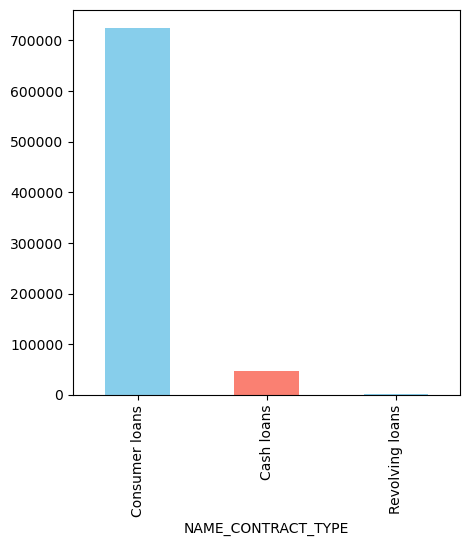

In [286]:
plt.figure(figsize=[5,5])
previous_df.NAME_CONTRACT_TYPE.value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.show()

In [287]:
#### PREVIOUSLY MOST PEOPLE APPLIED OFR CONSUMER LOANS AND NO ONE APPLIED FOR REVOLVING LOANS

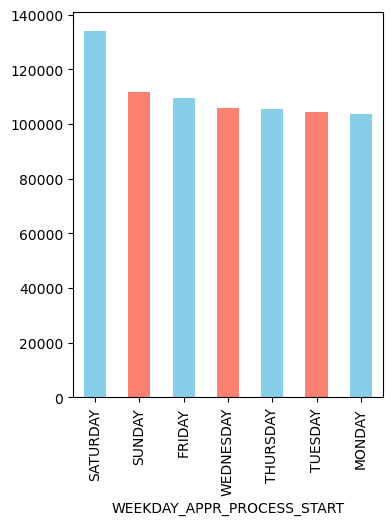

In [288]:
plt.figure(figsize=[4,5])
previous_df.WEEKDAY_APPR_PROCESS_START.value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.show()

##### the previous application was majorly applied on saturday and no significant differnce was seen in the remaining days.

In [290]:
previous_df.NAME_PAYMENT_TYPE.value_counts()

NAME_PAYMENT_TYPE
Cash through the bank                        767000
Non-cash from your account                     6562
Cashless from the account of the employer       808
Name: count, dtype: int64

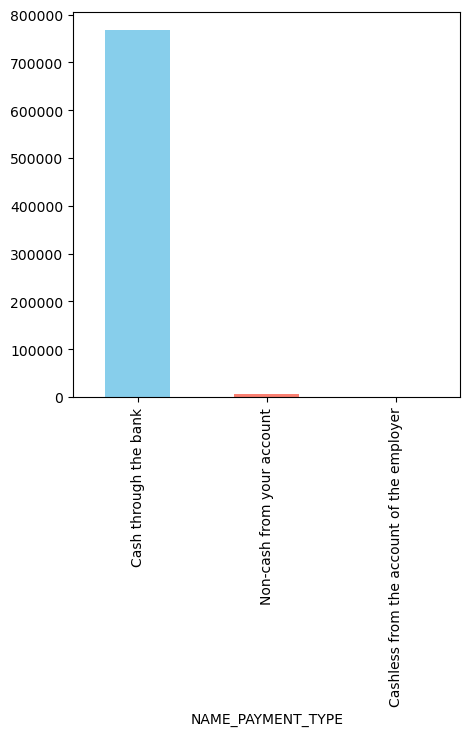

In [291]:
plt.figure(figsize=[5,5])
previous_df.NAME_PAYMENT_TYPE.value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.show()

In [292]:
# THE PAYMENT METHOD OPTED WAS CASH THROUGH THE BANK

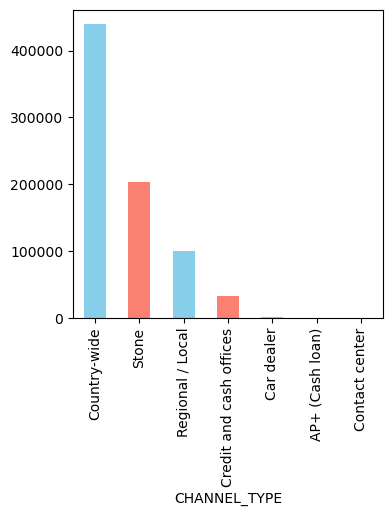

In [293]:
plt.figure(figsize=[4,4])
previous_df.CHANNEL_TYPE.value_counts().plot(kind='bar',color=['skyblue','salmon'])
plt.show()

In [294]:
previous_df.NAME_PRODUCT_TYPE.value_counts()

NAME_PRODUCT_TYPE
x-sell     760431
walk-in     13939
Name: count, dtype: int64

### Merging two datasets

In [296]:
merged_df=pd.merge(df,previous_df,how='left',on='SK_ID_CURR',suffixes=('_New', '_Previous'))
merged_df.head()

SK_ID_CURR  TARGET NAME_CONTRACT_TYPE_New CODE_GENDER FLAG_OWN_CAR  \
0      100002       1             Cash loans           M            N   
1      100003       0             Cash loans           F            N   
2      100003       0             Cash loans           F            N   
3      100004       0        Revolving loans           M            Y   
4      100006       0             Cash loans           F            N   

  FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT_New  \
0               Y           0.0          202500.0        406597.5   
1               N           0.0          270000.0       1293502.5   
2               N           0.0          270000.0       1293502.5   
3               Y           0.0           67500.0        135000.0   
4               Y           0.0          135000.0        312682.5   

   AMT_ANNUITY_New  AMT_GOODS_PRICE_New NAME_INCOME_TYPE  \
0          24700.5             351000.0          Working   
1          35698.5            1129500.0    State servant   
2          35698.5            1129500.0    State servant   
3           6750.0             135000.0          Working   
4          29686.5             297000.0          Working   

             NAME_EDUCATION_TYPE    NAME_FAMILY_STATUS  NAME_HOUSING_TYPE  \
0  Secondary / secondary special  Single / not married  House / apartment   
1               Higher education               Married  House / apartment   
2               Higher education               Married  House / apartment   
3  Secondary / secondary special  Single / not married  House / apartment   
4  Secondary / secondary special        Civil marriage  House / apartment   

   REGION_POPULATION_RELATIVE  DAYS_EMPLOYED  DAYS_ID_PUBLISH OCCUPATION_TYPE  \
0                    0.018801            637             2120        Laborers   
1                    0.003541           1188              291      Core staff   
2                    0.003541           1188              291      Core staff   
3                    0.010032            225             2531        Laborers   
4                    0.008019           3039             2437        Laborers   

   CNT_FAM_MEMBERS  REGION_RATING_CLIENT  REGION_RATING_CLIENT_W_CITY  \
0              1.0                     2                            2   
1              2.0                     1                            1   
2              2.0                     1                            1   
3              1.0                     2                            2   
4              2.0                     2                            2   

   REG_REGION_NOT_LIVE_REGION  REG_REGION_NOT_WORK_REGION  \
0                           0                           0   
1                           0                           0   
2                           0                           0   
3                           0                           0   
4                           0                           0   

        ORGANIZATION_TYPE  EXT_SOURCE_2  EXT_SOURCE_3  FLAG_DOCUMENT_2  \
0  Business Entity Type 3      0.262949      0.139376                0   
1                  School      0.622246      0.510853                0   
2                  School      0.622246      0.510853                0   
3              Government      0.555912      0.729567                0   
4  Business Entity Type 3      0.650442      0.510853                0   

   FLAG_DOCUMENT_3  FLAG_DOCUMENT_4  FLAG_DOCUMENT_5  FLAG_DOCUMENT_6  \
0                1                0                0                0   
1                1                0                0                0   
2                1                0                0                0   
3                0                0                0                0   
4                1                0                0                0   

   FLAG_DOCUMENT_7  FLAG_DOCUMENT_8  FLAG_DOCUMENT_9  FLAG_DOCUMENT_10  \
0                0                0                0                 0   


In [297]:
merged_df.shape

(698067, 88)

In [298]:
merged_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 698067 entries, 0 to 698066
Data columns (total 88 columns):
 #   Column                       Non-Null Count   Dtype  
---  ------                       --------------   -----  
 0   SK_ID_CURR                   698067 non-null  int64  
 1   TARGET                       698067 non-null  int64  
 2   NAME_CONTRACT_TYPE_New       698067 non-null  object 
 3   CODE_GENDER                  698067 non-null  object 
 4   FLAG_OWN_CAR                 698067 non-null  object 
 5   FLAG_OWN_REALTY              698067 non-null  object 
 6   CNT_CHILDREN                 698067 non-null  float64
 7   AMT_INCOME_TOTAL             698067 non-null  float64
 8   AMT_CREDIT_New               698067 non-null  float64
 9   AMT_ANNUITY_New              698036 non-null  float64
 10  AMT_GOODS_PRICE_New          697407 non-null  float64
 11  NAME_INCOME_TYPE             698067 non-null  object 
 12  NAME_EDUCATION_TYPE          698067 non-null  object 
 13 

In [299]:
column_needed=['TARGET','NAME_CONTRACT_TYPE_New','CODE_GENDER','FLAG_OWN_CAR','FLAG_OWN_REALITY','AMT_INCOME_TOTAL','AMT_CREDIT_New','AMT_ANNUITY_New',
               'AMT_GOODS_PRICE_New','NAME_INCOME_TYPE','NAME_EDUCATION_TYPE','NAME_FAMILY_STATUS','NAME_HOUSING_TYPE',
  'NAME_CONTRACT_TYPE_Previous','OCCUPATION_TYPE', 'CNT_FAM_MEMBERS', 'ORGANIZATION_TYPE','Age','AMT_REQ_CREDIT_BUREAU_HOUR',
'AMT_REQ_CREDIT_BUREAU_DAY',
'AMT_REQ_CREDIT_BUREAU_WEEK',
'AMT_REQ_CREDIT_BUREAU_MON',
'AMT_REQ_CREDIT_BUREAU_QRT',
'AMT_REQ_CREDIT_BUREAU_YEAR',
'NAME_CONTRACT_TYPE_Previous', 
'AMT_ANNUITY_Previous',
'AMT_APPLICATION',
'AMT_CREDIT_Previous',
'AMT_DOWN_PAYMENT',
'AMT_GOODS_PRICE_Previous',
'WEEKDAY_APPR_PROCESS_START',
'RATE_DOWN_PAYMENT',
'NAME_CASH_LOAN_PURPOSE',
'NAME_CONTRACT_STATUS', 
'DAYS_DECISION',
'NAME_PAYMENT_TYPE',
'CODE_REJECT_REASON',
'NAME_CLIENT_TYPE',
'NAME_GOODS_CATEGORY',
'NAME_PRODUCT_TYPE',
'CHANNEL_TYPE',
'NAME_YIELD_GROUP',
'PRODUCT_COMBINATION']

In [300]:
len(column_needed)

43

In [301]:
merged_df['NAME_CONTRACT_STATUS'].isnull().sum()


33906

In [302]:
merged_df['NAME_CONTRACT_STATUS'].describe()

count       664161
unique           4
top       Approved
freq        568197
Name: NAME_CONTRACT_STATUS, dtype: object

In [303]:
name_contract_type_mode=merged_df['NAME_CONTRACT_STATUS'].mode()

In [304]:
merged_df['NAME_CONTRACT_STATUS'].fillna(name_contract_type_mode)

0         Approved
1         Approved
2         Approved
3         Approved
4         Approved
            ...   
698062    Approved
698063    Approved
698064    Approved
698065    Approved
698066    Approved
Name: NAME_CONTRACT_STATUS, Length: 698067, dtype: object

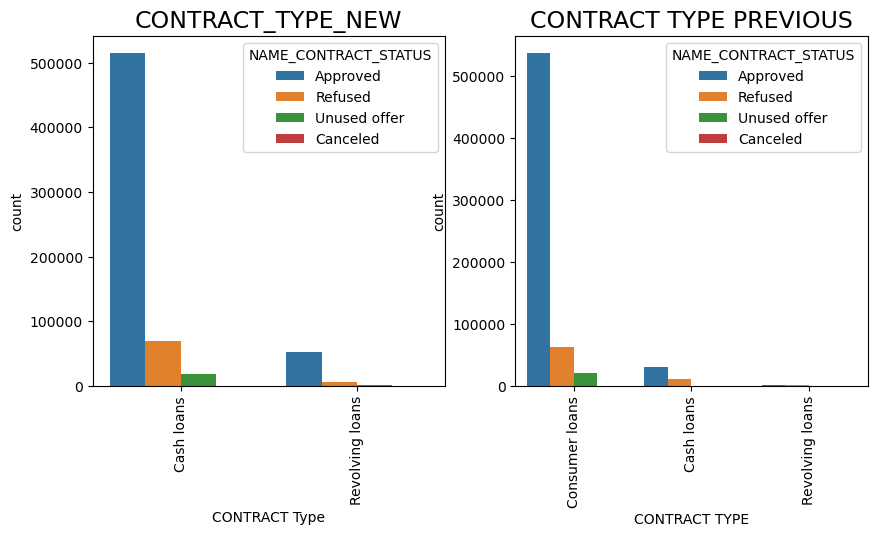

In [305]:
plt.figure(figsize=[10,10])
plt.subplot(2,2,1)
sns.countplot(x='NAME_CONTRACT_TYPE_New', data=merged_df,hue='NAME_CONTRACT_STATUS',order=merged_df['NAME_CONTRACT_TYPE_New'].value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel('CONTRACT Type', color='black', loc='center')
plt.title("CONTRACT_TYPE_NEW", color='black', fontsize=17)

plt.subplot(2,2,2)
sns.countplot(x='NAME_CONTRACT_TYPE_Previous', data=merged_df,hue='NAME_CONTRACT_STATUS',order=merged_df['NAME_CONTRACT_TYPE_Previous'].value_counts(normalize=True).index)
plt.xticks(rotation=90)
plt.xlabel('CONTRACT TYPE', color='black', loc='center')
plt.title("CONTRACT TYPE PREVIOUS", color='black', fontsize=17)

plt.show()


##### CONCLUSION
* Previously more consumer loans got approved. Intersetingly, no revolving loan was approved.
* At present, More cash loans got approved and significantly lower count than this got refused.

In [306]:
merged_df = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE=='XNA'].index)
merged_df  = merged_df.drop(merged_df[merged_df.NAME_CASH_LOAN_PURPOSE=='XAP'].index)

In [307]:
merged_df.NAME_CASH_LOAN_PURPOSE.value_counts()

NAME_CASH_LOAN_PURPOSE
Other                               2154
Repairs                             1594
Everyday expenses                    784
Education                            454
Medicine                             406
Purchase of electronic equipment     242
Journey                              227
Buying a used car                    219
Buying a new car                      47
Payments on other loans               39
Money for a third person               6
Hobby                                  2
Name: count, dtype: int64

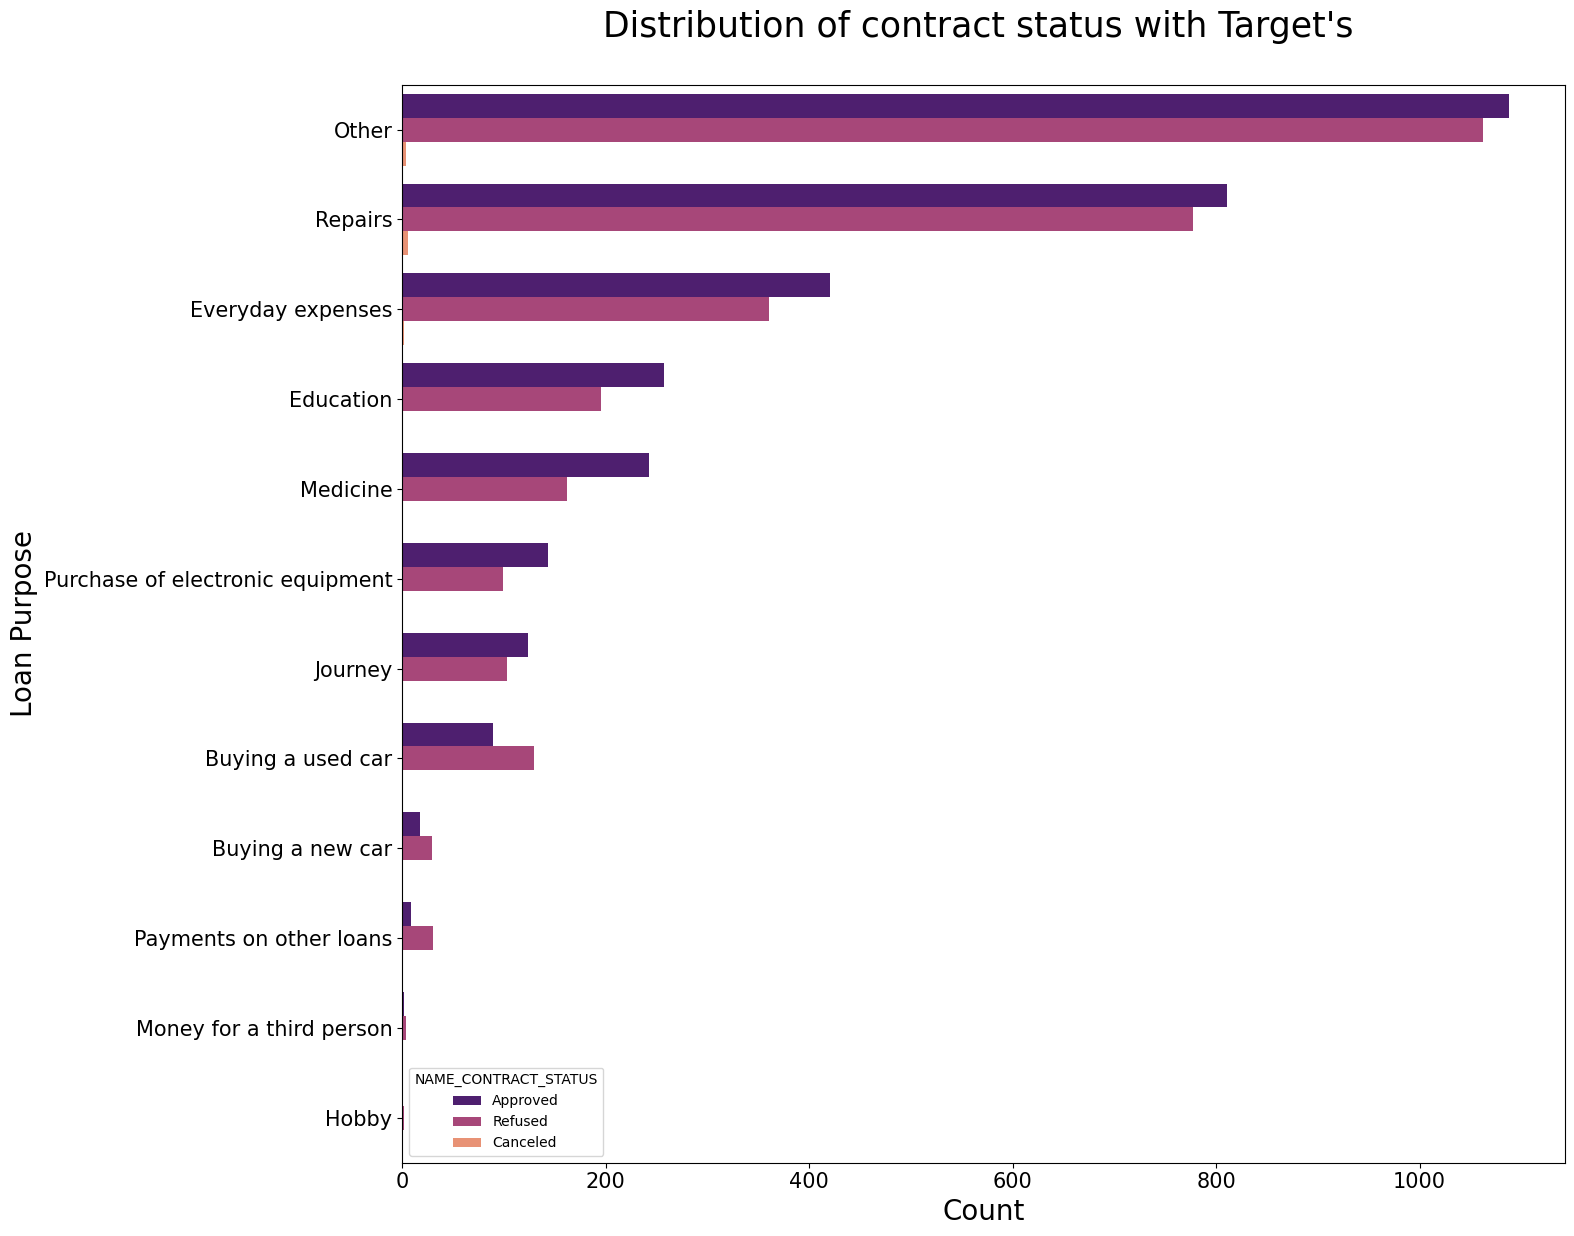

In [308]:
# Plotting for the Contract Status,
plt.figure(figsize=[15,14])
sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE',order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'NAME_CONTRACT_STATUS',palette='magma')
plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.show()

##### CONCLUSION
* Most approval and rejection of loans came from other and repairs.
* for buying a new car, the count of rejectionsis more than approvals.

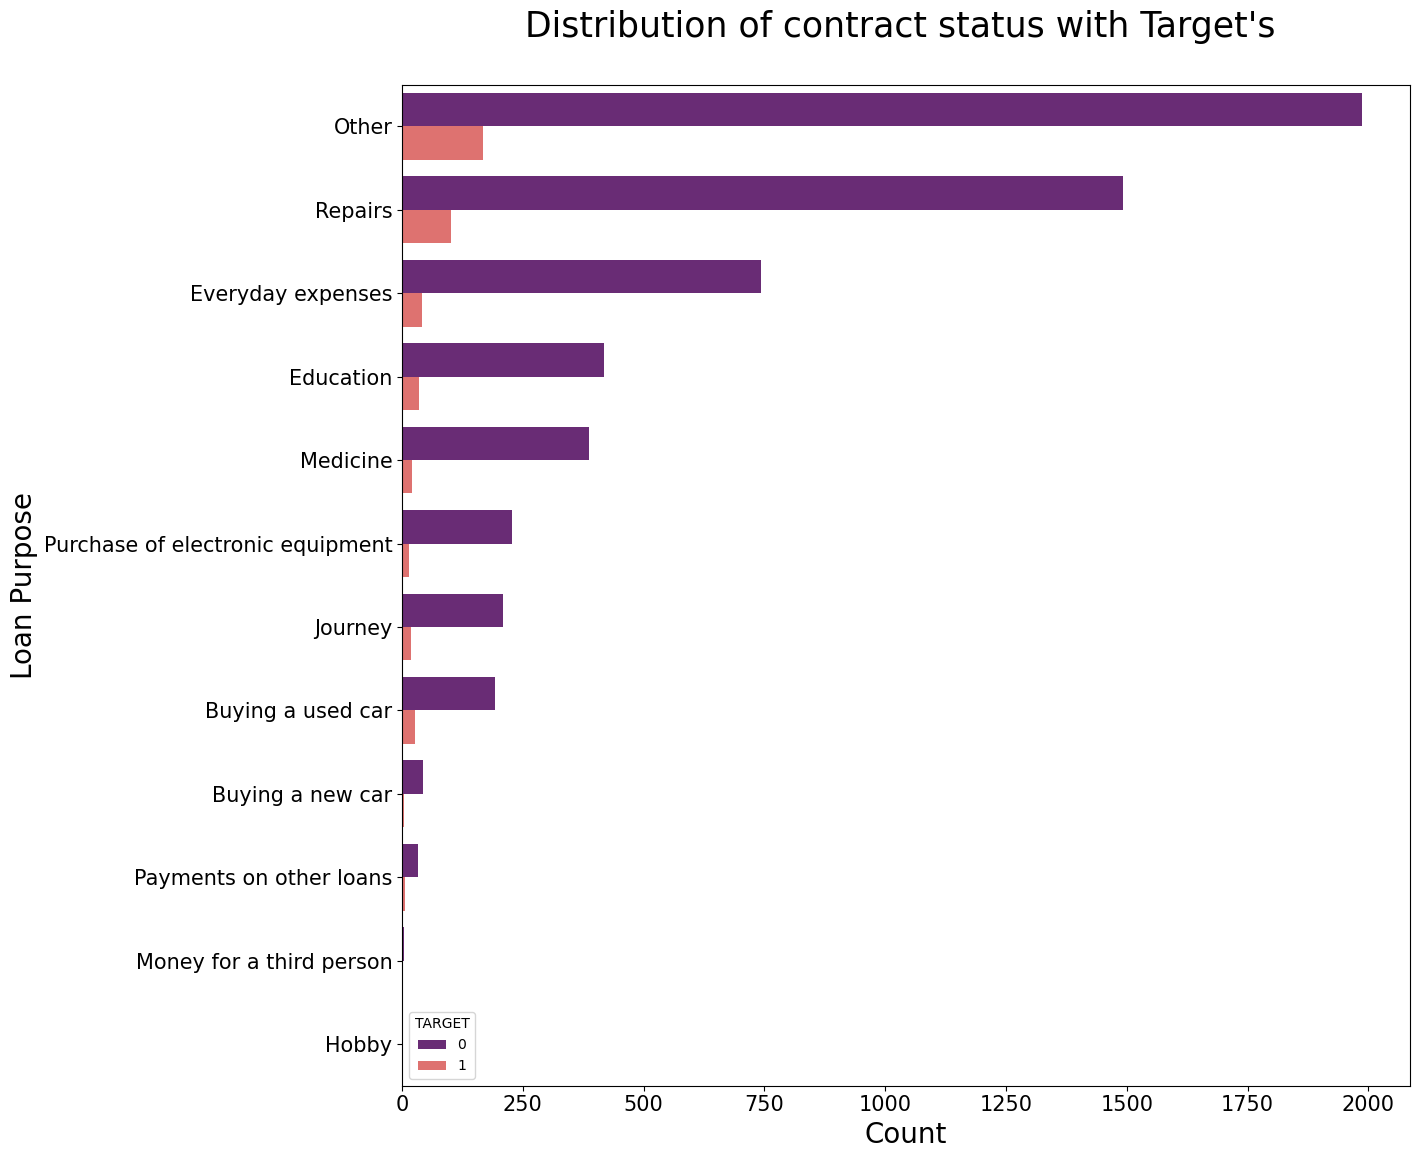

In [309]:
# Plotting for the Contract Status,
plt.figure(figsize=[13,13])
sns.countplot(data = merged_df, y= 'NAME_CASH_LOAN_PURPOSE',order=merged_df['NAME_CASH_LOAN_PURPOSE'].value_counts().index,hue = 'TARGET',palette='magma')
plt.title('Distribution of contract status with Target\'s \n', fontsize=25)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.xlabel('Count', fontsize=20)
plt.ylabel('Loan Purpose', fontsize=20)
plt.show()


#### CONCLUSION
* Loan purposes with 'Others' and 'Repairs' are facing more difficulites in payment on time.
* The difficulty to repay loan for education and medicine is almost same.

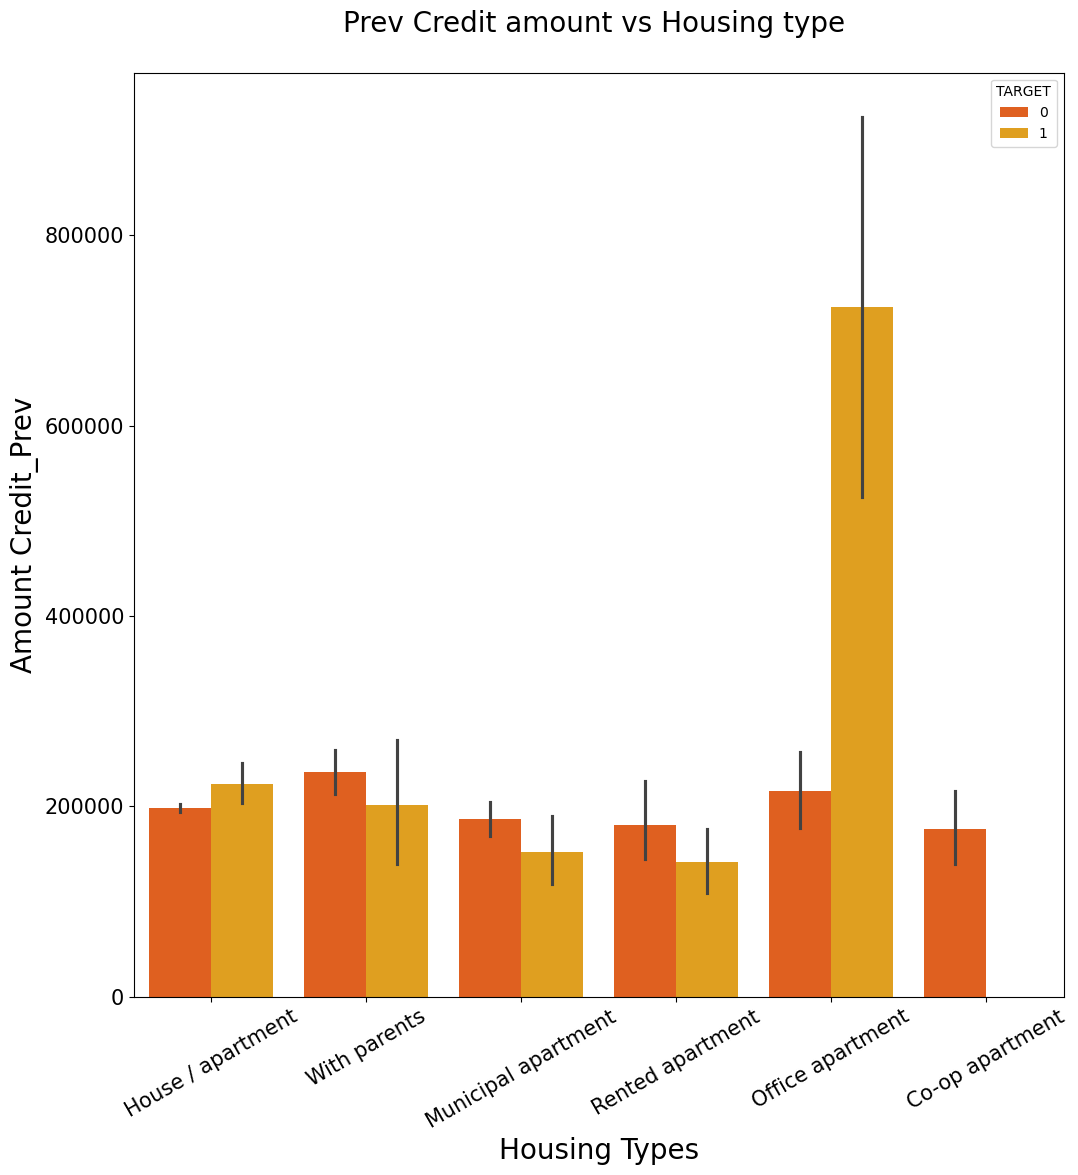

In [590]:
plt.figure(figsize=(12,12))
plt.xticks(rotation=30)
sns.barplot(data =merged_df, y='AMT_CREDIT_Previous',hue='TARGET',x='NAME_HOUSING_TYPE', palette='autumn')
plt.title('Prev Credit amount vs Housing type \n', fontsize=20)
plt.ylabel('Amount Credit_Prev', fontsize=20)
plt.xlabel('Housing Types', fontsize=20)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.show()

##### CONCLUSION
* Here for office apartment and House/apartment, the credit amount for target = 1 is high. So, bank should avoid giving loans to housing type- offic aapartment, House/apartment as they are more likely to face difficulty in repaying the loan.
* Bank can mostly focus on housing type - co-op apartment as they will not default.
* Also,housing type with parents, muniipal apartment, rented apartment can be considered for loans.                           
                                                                                             